# FYP 01

## Installing Packages

In [1]:
#@title
# Install rdkit # Enforce pytorch version 1.6.0   while True:pass  # saver  import pdb; pdb.set_trace()

import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO
 
 
logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)
 
 
def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """
 
    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )
 
    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)
 
    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return
 
        logger.info("force re-install")
 
    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)
 
    logger.info("python version: {}".format(python_version))
 
    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)
 
    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')
 
    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')
 
    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python==3.7.3",
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")
 
    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))
 
 
if __name__ == "__main__":
    install()

add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.12
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.09.1 installation finished!


In [2]:
# If something breaks in the notebook it is probably related to a mismatch between the Python version, CUDA or torch
import torch
pytorch_version = f"torch-{torch.__version__}+cu{torch.version.cuda.replace('.', '')}.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111+cu111.html
ERROR: Could not find a version that satisfies the requirement torch-scatter (from versions: none)
ERROR: No matching distribution found for torch-scatter
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111+cu111.html
ERROR: Could not find a version that satisfies the requirement torch-sparse (from versions: none)
ERROR: No matching distribution found for torch-sparse
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111+cu111.html
ERROR: Could not find a version that satisfies the requirement torch-cluster (from versions: none)
ERROR: No matching distribution found for torch-cluster
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111+cu111.html
ERROR: Could not find a version that satisfies the requirement torch-spline-conv (from versions: none)
ERROR: No matching distribution found for torch-spline-conv
     |████████████████████████████████| 370 kB

In [3]:
! pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
! pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
! pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 7.9 MB 10.1 MB/s 
Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 3.5 MB 9.3 MB/s 


In [4]:
! pip install pubchempy

  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13835 sha256=397b9f798f4a62d6f6a080bda0938f238bc55f278017000ce13c4c7d8f45af0c
  Stored in directory: /root/.cache/pip/wheels/7c/3d/8c/8192697412e9899dc55bbbb08bbc1197bef333caaa2a71c448
Successfully built pubchempy


In [5]:
! pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=82b097e673290068d4edd6717cef095d62b39485db6d28e32f9ed37e724abd69
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [6]:
pip install molvs

     |████████████████████████████████| 61 kB 431 kB/s 
  Created wheel for molvs: filename=MolVS-0.1.1-py3-none-any.whl size=32386 sha256=2e91265cd25698d97c20c776d3054e1e728057c5897e1deb5185d8f75eaf382b
  Stored in directory: /root/.cache/pip/wheels/c4/c2/92/e85190307603c2b3733d43e357abae2d1c66b609bfbba6200d
Successfully built molvs


### Imports

In [7]:
import pandas as pd
import pubchempy as pcp
from collections import Counter

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import pandasql

import numpy as np
from rdkit.Chem import AllChem
from rdkit import DataStructs
from molvs import standardize_smiles
import random 
import time

import sys

In [8]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Functions

In [10]:
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

def ctoint(_c):
  return int(str(_c)[9:-1])

def drugnameToSmiles(dn):
  return pcp.get_compounds(dn, 'name')[0].isomeric_smiles

def show_structure(sm, show_smiles = False):
  if (show_smiles):
    print(f"Smiles : {sm}")
  mol = Chem.MolFromSmiles(sm)
  return mol

def get_ecfp_sparsity(sml, fpl):       
    tmp = ECFP6(sml).compute_ECFP6(fp_length = fpl, generate_df=False) 
    return round(100*np.sum(tmp)/(tmp.shape[0]*tmp.shape[1]) , 2)

def norm_ic50(ic):
    return 1 / (1 + pow(math.exp(float(ic)), -0.1))

def denorm_ic50(ic):
    return -10*math.log((1-ic)/ic)

def predict_this(mdl, sml, cid, do_ECFP = False, fpl = None):
    cell_dict_X, cell_feature_X = save_cell_mut_matrix_XO()
    drug_dict_X, drug_smile_X, comp_smg = load_drug_smile_X(do_ECFP, fpl)

    mut_arr = cell_feature_X[cell_dict_X[str(cid)]]

    mut_arr = mut_arr.reshape(1, mut_arr.shape[0])
    sml_arr = np.array([sml])
    y_arr = np.array([0])
    smg = {sml: comp_smg[sml]}

    pr = TestbedDataset(root='', dataset="", xd=sml_arr, xt=mut_arr, y=y_arr, smile_graph=smg, testing = True).process(sml_arr, mut_arr, y_arr,smg)

    return denorm_ic50(float(mdl.forward(pr[0])[0][0][0]))

def list_difference(a, b):
    both = []
    in_a = []
    in_b = []
    if len(a) > len(b):
        for i in a:
            if i in b:
                both.append(i)
            else:
                in_a.append(i)
        for q in b:
            if q not in a:
                in_b.append(q)
    else:
        for i in b:
            if i in a:
                both.append(i)
            else:
                in_b.append(i)
        for q in a:
            if q not in b:
                in_a.append(q)
    return in_a, in_b, both

In [11]:
def atom_features_X(atom):
    return np.array(one_of_k_encoding_unk_X(atom.GetSymbol(),['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na','Ca', 'Fe', 'As', 'Al', 'I', 'B', 'V', 'K', 'Tl', 'Yb','Sb', 'Sn', 'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn', 'H','Li', 'Ge', 'Cu', 'Au', 'Ni', 'Cd', 'In', 'Mn', 'Zr','Cr', 'Pt', 'Hg', 'Pb', 'Unknown']) +
                    one_of_k_encoding_X(atom.GetDegree(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    one_of_k_encoding_unk_X(atom.GetTotalNumHs(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    one_of_k_encoding_unk_X(atom.GetImplicitValence(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    [atom.GetIsAromatic()])

def one_of_k_encoding_X(x, allowable_set):
    if x not in allowable_set:
        raise Exception("input {0} not in allowable set{1}:".format(x, allowable_set))
    return list(map(lambda s: x == s, allowable_set))

def one_of_k_encoding_unk_X(x, allowable_set):
    """Maps inputs not in the allowable set to the last element."""
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))

def smile_to_graph_X(smile, do_ECFP, fpl = None, do_edge_features = False):
    mol = Chem.MolFromSmiles(smile)
    
    c_size = mol.GetNumAtoms()
                     
    features = []
    for atom in mol.GetAtoms():
        feature = atom_features_X(atom)
        if (do_ECFP):
            ecfp6_descriptor = ECFP6([smile])        
            this_ecfp = ecfp6_descriptor.compute_ECFP6(fpl, generate_df=False)[0]
            feature = np.append(feature, this_ecfp, 0)

        # features.append( feature / sum(feature) ) ## Normalise
        features.append(sum(feature)*feature / sum(feature))

    edge_dict = {}
    edges = []
    bond_features = []
    for bond in mol.GetBonds():
        edges.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])

        
        if (do_edge_features):
            this_feat = [0 for q in range(4)]  
            q = ['SINGLE', 'DOUBLE', 'TRIPLE', 'AROMATIC'].index(str(bond.GetBondType()))
            this_feat[q] = 1
            this_feat = np.array(this_feat)

            edge_dict[(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())] = this_feat
            edge_dict[(bond.GetEndAtomIdx(), bond.GetBeginAtomIdx())] = this_feat

    g = nx.Graph(edges).to_directed()
    edge_index = []
    for e1, e2 in g.edges:
        edge_index.append([e1, e2])
        if (do_edge_features):
            bond_features.append(edge_dict[(e1, e2)])
        
    if (do_edge_features):
        return c_size, features, edge_index, bond_features, g
    else:
        return c_size, features, edge_index, g

def load_drug_smile_X(do_ECFP, fpl = None, do_edge_features = False): 
    """
      Output : 
        (dictionary) drug_dict : Keys - (str) name of drug, Values - (int) index/position of drug in drug_smile
        (list) drug_smile : List of all drug smiles 
        (dictionary) smile_graph : Keys - (str) smiles of all drugs, Values - (tup) Five outputs of function smile_to_graph(smile)
    """
    drug_dict = {}
    drug_smile = []

    
    reader = csv.reader(open(folder + "drug_smiles.csv"))     ## From csv
    next(reader, None)                                        ## From csv

    for cnt, item in enumerate(reader):                       ## From csv
                                                                ## From df3
        name = item[0]                                        
        smile = item[2]                                       ## From csv

        if (smile == "N.N.[Cl-].[Cl-].[Pt+2]"):
            print(f"name = {name}, smile = {smile}")
        # smile = item[1]                                                                           ## From df3

        if name in drug_dict:
            pos = drug_dict[name]
        else:
            pos = len(drug_dict)
            drug_dict[name] = pos
        drug_smile.append(smile)
        if (smile == "N.N.[Cl-].[Cl-].[Pt+2]"):
            print(f"indx = {len(drug_smile)} , {drug_smile[-1]}")
    
    smile_graph = {}
    for smile in drug_smile:
        # g = smile_to_graph(smile)
        if (do_edge_features):
            gr = smile_to_graph_X(smile, do_ECFP, fpl, do_edge_features)
        else:
            gr = smile_to_graph_X(smile, do_ECFP, fpl, do_edge_features)
        smile_graph[smile] = gr
    
    return drug_dict, drug_smile, smile_graph

def save_cell_mut_matrix_X(): 
    """
    PANCANCER_Genetic_feature.csv
    0                1                 2           3          4         5                6
    cell_line_name	cosmic_sample_id	gdsc_desc1	gdsc_desc2	tcga_desc	genetic_feature	is_mutated

    Output :
        cell_dict : 
        cell_feature : np array of shape (unique_cosmic_sample_id x 732)
        matrix_list
        mut_dict

    """
    f = open(folder + "PANCANCER_Genetic_feature.csv")
    reader = csv.reader(f)
    next(reader)
    features = {}
    cell_dict = {}
    mut_dict = {}
    matrix_list = []

    for item in reader:
        cell_id = item[1] ## cosmic_sample_id       1290730, 1290730, 1290730
        mut = item[5] ## genetic_feature            CDC27_mut, CDC73_mut, CDH1_mut
        is_mutated = int(item[6]) ## is_mutated     0, 0, 0

        if mut in mut_dict:
            col = mut_dict[mut]
        else:
            col = len(mut_dict)
            mut_dict[mut] = col

        if cell_id in cell_dict:
            row = cell_dict[cell_id]
        else:
            row = len(cell_dict)
            cell_dict[cell_id] = row
        if is_mutated == 1:
            matrix_list.append((row, col))
    
    cell_feature = np.zeros((len(cell_dict), len(mut_dict)))  

    for item in matrix_list:
        cell_feature[item[0], item[1]] = 1
    
    return cell_dict, cell_feature, matrix_list, mut_dict


def save_cell_mut_matrix_XO():
    """
 Output : 
        (dictionary) cell_dict : Keys - (str) cosmic_sample_id, Values - (int) index/position of the key (cosmic_sample_id) in uniquely sorted list of cosmic_sample_id values
        (np array) cell_feature : Numpy array of shape (len(cell_dict), len(mut_dict)),  
                                    1 if that (cosmic_sample_id, genetic_feature) pair has is_mutated = 1
                                    else 0
    """
    f = open(folder + "PANCANCER_Genetic_feature.csv")
    reader = csv.reader(f)
    next(reader)
    features = {}
    cell_dict = {}
    mut_dict = {}
    matrix_list = []

    for item in reader:
        cell_id = item[1]           ## cosmic_sample_id
        mut = item[5]               ## genetic_feature
        is_mutated = int(item[6])   ## is_mutated

        if mut in mut_dict:
            col = mut_dict[mut]
        else:
            col = len(mut_dict)
            mut_dict[mut] = col

        if cell_id in cell_dict:
            row = cell_dict[cell_id]
        else:
            row = len(cell_dict)
            cell_dict[cell_id] = row
        if is_mutated == 1:
            matrix_list.append((row, col))
    
    cell_feature = np.zeros((len(cell_dict), len(mut_dict)))

    for item in matrix_list:
        cell_feature[item[0], item[1]] = 1

    with open('mut_dict', 'wb') as fp:
        pickle.dump(mut_dict, fp)
    
    return cell_dict, cell_feature

def save_mix_drug_cell_matrix_X(do_ECFP, fpl = None):
    f = open(folder + "PANCANCER_IC.csv")
    reader = csv.reader(f)
    next(reader)

    cell_dict, cell_feature, qa, aq = save_cell_mut_matrix_X() 
    drug_dict, drug_smile, smile_graph = load_drug_smile_X(do_ECFP, fpl)

    temp_data = []
    bExist = np.zeros((len(drug_dict), len(cell_dict)))

    for item in reader:
        drug = item[0]    ## Drug name
        cell = item[3]    ## Cosmic sample Id
        ic50 = item[8]    ## IC50
        ic50 = 1 / (1 + pow(math.exp(float(ic50)), -0.1))
        temp_data.append((drug, cell, ic50))

    xd = []
    xc = []
    y = []
    lst_drug = []
    lst_cell = []   
    random.shuffle(temp_data)
    for data in temp_data:
        drug, cell, ic50 = data
        if drug in drug_dict and cell in cell_dict:
            xd.append(drug_smile[drug_dict[drug]])        ## appending the smile of the drug into list xd
            xc.append(cell_feature[cell_dict[cell]])      ## appending numpy array of shape (len(mut_dict),) ie. (735,) to list xc
            y.append(ic50)                                ## appending (int) ic50 value of that smile to list y
            bExist[drug_dict[drug], cell_dict[cell]] = 1  ## (drug_name, Cosmic_sample_Id) pair used to index the numpy array and set to 1 
            lst_drug.append(drug)                         ## appending (str) name of this drug to list lst_drug
            lst_cell.append(cell)                         ## appending (numeric str) this Cosmic sample Id to list lst_cell

    xd, xc, y = np.asarray(xd), np.asarray(xc), np.asarray(y)  


    size = int(xd.shape[0] * 0.8)
    size1 = int(xd.shape[0] * 0.9)
    xd_train = xd[:size]
    xd_val = xd[size:size1]
    xd_test = xd[size1:]

    xc_train = xc[:size]
    xc_val = xc[size:size1]
    xc_test = xc[size1:]

    y_train = y[:size]
    y_val = y[size:size1]
    y_test = y[size1:]

    dataset = 'GDSC'
    print('preparing ', dataset + '_train.pt in pytorch format!')                         

    return xd, xc, y

## Data Setup

In [49]:
folder = "gdrive/MyDrive/FYP/Data/DRP/"  ## aka folder
root_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/"
data_folder = "gdrive/MyDrive/FYP/Data/"
sage_folder = "gdrive/MyDrive/FYP/Data/SAGEData/"

In [50]:
# df0 = pd.read_csv('gdrive/MyDrive/FYP/Data/DRP/drug_smiles.csv') 
df0 = pd.read_csv(data_folder+'/drug_smiles.csv')
df0.rename(columns = {'name':'drug_name'}, inplace = True)
print(f"df0 Length = {len(df0)}")
print()
unique_drug_name_df0 = list(Counter(df0["drug_name"].tolist()).keys())
print(f"unique_drug_name_df0 = {len(unique_drug_name_df0)}")
unique_cid_df0 = list(Counter(df0["CID"].tolist()).keys())
print(f"unique_cid_df0 = {len(unique_cid_df0)}")
unique_CanonicalSMILES_df0 = list(Counter(df0["CanonicalSMILES"].tolist()).keys())
print(f"unique_CanonicalSMILES_df0 = {len(unique_CanonicalSMILES_df0)}")
unique_IsomericSMILES_df0 = list(Counter(df0["IsomericSMILES"].tolist()).keys())
print(f"unique_IsomericSMILES_df0 = {len(unique_IsomericSMILES_df0)}")
df0.head()

df0 Length = 223

unique_drug_name_df0 = 223
unique_cid_df0 = 223
unique_CanonicalSMILES_df0 = 223
unique_IsomericSMILES_df0 = 223


drug_name  ...                                     IsomericSMILES
0      SNX-2112  ...  CC1(CC2=C(C(=O)C1)C(=NN2C3=CC(=C(C=C3)C(=O)N)N...
1        TPCA-1  ...           C1=CC(=CC=C1C2=CC(=C(S2)NC(=O)N)C(=O)N)F
2   Quizartinib  ...  CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...
3  Tubastatin A  ...    CN1CCC2=C(C1)C3=CC=CC=C3N2CC4=CC=C(C=C4)C(=O)NO
4    Trametinib  ...  CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...

[5 rows x 4 columns]

In [51]:
# df1 = pd.read_csv(data_folder = 'PANCANCER_IC.csv') ## count = 135,242 PANCANCER_IC PANCANCER_IC.csv
df1 = pd.read_csv(data_folder + 'PANCANCER_IC.csv')  ## count = 224,510 correct
df1.rename(columns = {'Drug name':'drug_name'}, inplace = True)
df1.rename(columns = {'Drug Id':'drug_id'}, inplace = True)
print(f"df1 Length = {len(df1)}")
df1.head()

df1 Length = 224510


drug_name  drug_id Cell line name  ...      RMSE   Z score Dataset version
0  Erlotinib        1         MC-CAR  ...  0.021894 -0.013193              17
1  Erlotinib        1            ES3  ...  0.030357  0.777474              17
2  Erlotinib        1            ES5  ...  0.031807  0.977236              17
3  Erlotinib        1            ES7  ...  0.094084  0.639977              17
4  Erlotinib        1          EW-11  ...  0.087727  0.009464              17

[5 rows x 14 columns]

In [52]:
df2 = pd.read_csv(data_folder + 'drugs_smile.csv', sep="\t")
print("df2")
print()
unique_drug_id_df2 = list(Counter(df2["drug_id"].tolist()).keys())
print(f"unique_drug_id_df2 = {len(unique_drug_id_df2)}")
unique_smiles_df2 = list(Counter(df2["SMILES"].tolist()).keys())
print(f"unique_smiles_df2 = {len(unique_smiles_df2)}")
print()
print(f"df2 Length = {len(df2)}")
df2.head()

df2

unique_drug_id_df2 = 169
unique_smiles_df2 = 164

df2 Length = 169


drug_id                                             SMILES
0     1559  CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...
1     1058  CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...
2     1088  CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
3     1549  CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4...
4     1073                               C1=C(C(=O)NC(=O)N1)F

In [53]:
df3 = pd.merge(df1, df2, how ='inner', on =['drug_id'])
df3.rename(columns = {'Cosmic sample Id':'cosmic_sample_id'}, inplace = True)
df4 = pd.read_csv('gdrive/MyDrive/FYP/Data/PANCANCER_Genetic_feature.csv')
unique_genetic_feature = list(dict.fromkeys(list(df4.genetic_feature)))
df4 = pd.read_csv('gdrive/MyDrive/FYP/Data/PANCANCER_Genetic_feature.csv')

In [54]:
df4

cell_line_name  cosmic_sample_id  ... genetic_feature is_mutated
0              CAL-29           1290730  ...       CDC27_mut          0
1              CAL-29           1290730  ...       CDC73_mut          0
2              CAL-29           1290730  ...        CDH1_mut          0
3              CAL-29           1290730  ...       CDK12_mut          0
4              CAL-29           1290730  ...      CDKN1A_mut          0
...               ...               ...  ...             ...        ...
714050       UWB1.289           1480374  ...       HLA-B_mut          0
714051       UWB1.289           1480374  ...       HNF1A_mut          0
714052       UWB1.289           1480374  ...        HRAS_mut          0
714053       UWB1.289           1480374  ...       HSPA8_mut          0
714054       UWB1.289           1480374  ...        IDH1_mut          0

[714055 rows x 7 columns]

In [55]:
print("df3")
print()
unique_drug_name_df3 = list(Counter(df3["drug_name"].tolist()).keys())
print(f"unique_drug_name_df3 = {len(unique_drug_name_df3)}")
unique_drug_name_df3 = list(Counter(df3["drug_id"].tolist()).keys())
print(f"unique_drug_name_df3 = {len(unique_drug_name_df3)}")
unique_cell_line_name_df3 = list(Counter(df3["Cell line name"].tolist()).keys())
print(f"unique_cell_line_name_df3 = {len(unique_cell_line_name_df3)}")
unique_cosmic_sample_id_df3 = list(Counter(df3["cosmic_sample_id"].tolist()).keys())
print(f"unique_cosmic_sample_id_df3 = {len(unique_cosmic_sample_id_df3)}")
unique_tcga_classification_df3= list(Counter(df3["TCGA classification"].tolist()).keys())
print(f"unique_tcga_classification_df3 = {len(unique_tcga_classification_df3)}")
unique_tissue_df3= list(Counter(df3["Tissue"].tolist()).keys())
print(f"unique_tissue_df3 = {len(unique_tissue_df3)}")
unique_smiles_df3 = list(Counter(df3["SMILES"].tolist()).keys())
print(f"unique_smiles_df3 = {len(unique_smiles_df3)}")
print()
print(f"df3 Length = {len(df3)}")
df3.head()

df3

unique_drug_name_df3 = 42
unique_drug_name_df3 = 42
unique_cell_line_name_df3 = 1008
unique_cosmic_sample_id_df3 = 1008
unique_tcga_classification_df3 = 31
unique_tissue_df3 = 14
unique_smiles_df3 = 42

df3 Length = 37384


drug_name  ...                                             SMILES
0  Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
1  Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
2  Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
3  Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
4  Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...

[5 rows x 15 columns]

In [56]:
print("df4")
print()
unique_cell_line_name_df4 = list(Counter(df4["cell_line_name"].tolist()).keys())
print(f"unique_cell_line_name_df4 = {len(unique_cell_line_name_df4)}")
unique_cosmic_sample_id_df4 = list(Counter(df4["cosmic_sample_id"].tolist()).keys())
print(f"unique_cosmic_sample_id_df4 = {len(unique_cosmic_sample_id_df4)}")
unique_gdsc_desc1_df4 = list(Counter(df4["gdsc_desc1"].tolist()).keys())
print(f"unique_gdsc_desc1_df4 = {len(unique_gdsc_desc1_df4)}")
unique_gdsc_desc2_df4 = list(Counter(df4["gdsc_desc2"].tolist()).keys())
print(f"unique_gdsc_desc2_df4 = {len(unique_gdsc_desc2_df4)}")
unique_tcga_desc_df4 = list(Counter(df4["tcga_desc"].tolist()).keys())
print(f"unique_tcga_desc_df4 = {len(unique_tcga_desc_df4)}")
unique_genetic_feature_df4= list(Counter(df4["genetic_feature"].tolist()).keys())
print(f"unique_genetic_feature_df4 = {len(unique_genetic_feature_df4)}")
unique_is_mutated_df4= list(Counter(df4["is_mutated"].tolist()).keys())
print(f"unique_is_mutated_df4 = {len(unique_is_mutated_df4)}")
print()
print(f"df4 Length = {len(df4)}")
df4.head()

df4

unique_cell_line_name_df4 = 990
unique_cosmic_sample_id_df4 = 990
unique_gdsc_desc1_df4 = 13
unique_gdsc_desc2_df4 = 55
unique_tcga_desc_df4 = 31
unique_genetic_feature_df4 = 735
unique_is_mutated_df4 = 2

df4 Length = 714055


cell_line_name  cosmic_sample_id  ... genetic_feature is_mutated
0         CAL-29           1290730  ...       CDC27_mut          0
1         CAL-29           1290730  ...       CDC73_mut          0
2         CAL-29           1290730  ...        CDH1_mut          0
3         CAL-29           1290730  ...       CDK12_mut          0
4         CAL-29           1290730  ...      CDKN1A_mut          0

[5 rows x 7 columns]

In [57]:
df5 = pd.merge(df1, df0, how ='inner', on =['drug_name'])
df5 = df5.drop(['IsomericSMILES'], axis = 1)
df5.rename(columns = {'Cosmic sample Id':'cosmic_sample_id'}, inplace = True)
df5.rename(columns = {'CanonicalSMILES':'SMILES'}, inplace = True)

unique_cosmic_sample_id_df5 = list(Counter(df5["cosmic_sample_id"].tolist()).keys())
unique_name_diff = list(set(unique_cosmic_sample_id_df4) - set(unique_cosmic_sample_id_df5)) + list(set(unique_cosmic_sample_id_df5) - set(unique_cosmic_sample_id_df4))  
in_both = []
for cd in unique_cosmic_sample_id_df5:
    if (cd in unique_cosmic_sample_id_df4):
        in_both.append(cd)
all_csi = df5["cosmic_sample_id"].tolist()
all_i = [i for i in range(len(all_csi))]
remove_these_i = []
for i, c in zip(all_i, all_csi):
    if (c not in in_both):
        remove_these_i.append(i)
df5 = df5.drop(remove_these_i)
df5.reset_index(inplace = True)
df5 = df5.drop(['index'], axis = 1)

In [58]:
print("df5")
print()
unique_drug_name = list(Counter(df5["drug_name"].tolist()).keys())
print(f"unique_drug_name = {len(unique_drug_name)}")

unique_drug_id = list(Counter(df5["drug_id"].tolist()).keys())
print(f"unique_drug_id = {len(unique_drug_id)}")

unique_cell_line_name = list(Counter(df5["Cell line name"].tolist()).keys())
print(f"unique_cell_line_name = {len(unique_cell_line_name)}")

unique_cosmic_sample_id = list(Counter(df5["cosmic_sample_id"].tolist()).keys())
print(f"unique_cosmic_sample_id = {len(unique_cosmic_sample_id)}")

unique_tcga_classification= list(Counter(df5["TCGA classification"].tolist()).keys())
print(f"unique_tcga_classification = {len(unique_tcga_classification)}")

unique_tissue= list(Counter(df5["Tissue"].tolist()).keys())
print(f"unique_tissue = {len(unique_tissue)}")

unique_tissue_sub_type= list(Counter(df5["Tissue sub-type"].tolist()).keys())
print(f"unique_tissue_sub_type = {len(unique_tissue_sub_type)}")

unique_CID= list(Counter(df5["CID"].tolist()).keys())
print(f"unique_CID = {len(unique_CID)}")

unique_smiles = list(Counter(df5["SMILES"].tolist()).keys())
print(f"unique_smiles = {len(unique_smiles)}")

print()
print(f"df5 Length = {len(df5)}")

df5.head()

df5

unique_drug_name = 223
unique_drug_id = 238
unique_cell_line_name = 990
unique_cosmic_sample_id = 990
unique_tcga_classification = 31
unique_tissue = 13
unique_tissue_sub_type = 55
unique_CID = 223
unique_smiles = 223

df5 Length = 191049


drug_name  ...                                             SMILES
0  Erlotinib  ...  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
1  Erlotinib  ...  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
2  Erlotinib  ...  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
3  Erlotinib  ...  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
4  Erlotinib  ...  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...

[5 rows x 16 columns]

Smiles : CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3=C2)O


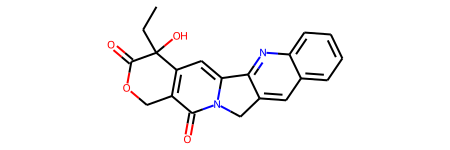

In [59]:
this_smiles = list(df3.iloc[[23]].SMILES)[0]
show_structure(this_smiles, show_smiles =True)

Smiles : CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9C7C(C=CC9)(C(C(C8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O


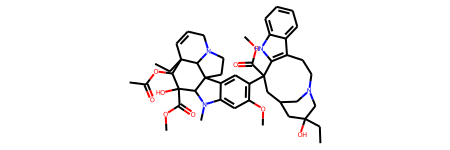

In [60]:
this_smiles = list(df3.iloc[[1213]].SMILES)[0]
show_structure(this_smiles, show_smiles =True)  ## ewq

In [61]:
class ECFP6:
    def __init__(self, smiles):
        self.mols = [Chem.MolFromSmiles(i) for i in smiles]
        self.smiles = smiles

    def mol2fp(self, mol, fp_length, radius = 3):
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius = radius, nBits = fp_length)
        array = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, array)
        return array

    def compute_ECFP6(self, fp_length, name = None, generate_df = True):
        bit_headers = ['bit' + str(i) for i in range(fp_length)]
        arr = np.empty((0,fp_length), int).astype(int)
        for i in self.mols:
            fp = self.mol2fp(i, fp_length)
            arr = np.vstack((arr, fp))
        if (not generate_df):
            return np.asarray(arr).astype(int)
        df_ecfp6 = pd.DataFrame(np.asarray(arr).astype(int),columns=bit_headers)
        df_ecfp6.insert(loc=0, column='smiles', value=self.smiles)
        if name != None:
            df_ecfp6.to_csv(name[:-4]+'_ECFP6.csv', index=False)
        
        return df_ecfp6
smiles = [standardize_smiles(i) for i in unique_smiles] 
convert_to_nonstd = dict(zip(smiles, unique_smiles)) 


ecfp6_descriptor = ECFP6(smiles)        
df6 = ecfp6_descriptor.compute_ECFP6(fp_length = 1024)

In [62]:
smiles = [standardize_smiles(i) for i in [unique_smiles[0]]] 
convert_to_nonstd = dict(zip(smiles, [unique_smiles[0]])) 

ecfp6_descriptor = ECFP6(smiles)        
df_X = ecfp6_descriptor.compute_ECFP6(fp_length = 1024) 
df_X

smiles  bit0  ...  bit1022  bit1023
0  C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1     0  ...        0        0

[1 rows x 1025 columns]

In [63]:
print("df6")
print()
unique_smiles_df6 = list(Counter(df6["smiles"].tolist()).keys())
print(f"unique_smiles_df6 = {len(unique_smiles_df6)}")
print()
print(f"df6 Length = {len(df6)}")
df5.head()

df6

unique_smiles_df6 = 223

df6 Length = 223


drug_name  ...                                             SMILES
0  Erlotinib  ...  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
1  Erlotinib  ...  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
2  Erlotinib  ...  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
3  Erlotinib  ...  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
4  Erlotinib  ...  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...

[5 rows x 16 columns]

In [64]:
smiles = [standardize_smiles(i) for i in unique_smiles] 
convert_to_nonstd = dict(zip(smiles, unique_smiles)) 

ecfp6_descriptor = ECFP6(smiles)     
df7 = ecfp6_descriptor.compute_ECFP6(fp_length = 2048//2)

In [65]:
print("df7")
print()
unique_smiles_df7 = list(Counter(df7["smiles"].tolist()).keys())
print(f"unique_smiles = {len(unique_smiles)}")
print()
print(f"df7 Length = {len(df7)}")
df6.head()

df7

unique_smiles = 223

df7 Length = 223


smiles  bit0  ...  bit1022  bit1023
0         C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1     0  ...        0        0
1  COC1CC2CCC(C)C(O)(O2)C(=O)C(=O)N2CCCCC2C(=O)OC...     0  ...        0        0
2  CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)c...     1  ...        0        0
3  Cc1[nH]c(C=C2C(=O)Nc3ccc(S(=O)(=O)Cc4c(Cl)cccc...     0  ...        0        0
4  CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=...     0  ...        0        0

[5 rows x 1025 columns]

## utils.py

In [35]:
import os
import numpy as np
from math import sqrt
from scipy import stats

from torch_geometric.data import InMemoryDataset, DataLoader
from torch_geometric import data as DATA

import torch
import matplotlib.pyplot as plt  

    # train_data = TestbedDataset(root='data', dataset=dataset+'_train_mix', xd=xd_train, xt=xc_train, y=y_train, smile_graph=smile_graph)
    # val_data = TestbedDataset(root='data', dataset=dataset+'_val_mix', xd=xd_val, xt=xc_val, y=y_val, smile_graph=smile_graph)
    # test_data = TestbedDataset(root='data', dataset=dataset+'_test_mix', xd=xd_test, xt=xc_test, y=y_test, smile_graph=smile_graph)

class TestbedDataset(InMemoryDataset):
    def __init__(self, root='gdrive/MyDrive/FYP/Data/DRP/root_folder', dataset='davis', 
                 xd=None, xt=None, y=None, transform=None,
                 pre_transform=None,smile_graph=None,saliency_map=False, testing = False):

        #root is required for save preprocessed data, default is '/tmp'
        super(TestbedDataset, self).__init__(root, transform, pre_transform)
        # benchmark dataset, default = 'davis'
        self.dataset = dataset
        self.saliency_map = saliency_map
        self.testing  = testing 

        if (self.testing):
            self.process(xd, xt, y,smile_graph)
        elif os.path.isfile(self.processed_paths[0]):
            print('Pre-processed data found: {}, loading ...'.format(self.processed_paths[0]))
            self.data, self.slices = torch.load(self.processed_paths[0])
        else:
            print('Pre-processed data {} not found, doing pre-processing...'.format(self.processed_paths[0]))
            self.process(xd, xt, y,smile_graph)
            self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        pass
        #return ['some_file_1', 'some_file_2', ...]

    @property
    def processed_file_names(self):
        return [self.dataset + '.pt']

    def download(self):
        # Download to `self.raw_dir`.
        pass

    def _download(self):
        pass

    def _process(self):
        if not os.path.exists(self.processed_dir):
            os.makedirs(self.processed_dir)

    def process(self, xd, xt, y, smile_graph):    
        ## xd : smile, 
        ## cx : np array of 735 mutation values, 
        ## y : IC50 value
        ## smile_graph : dictionary keys : smile, and values : 4_drug_outputs (num of mols, 72 features, edges, graph)


        assert (len(xd) == len(xt) and len(xt) == len(y)), "The three lists must be the same length!"
        data_list = []
        data_len = len(xd)
        for i in range(data_len):
            
            if ((i%2000 == 0 or i+1 == data_len) and (not self.testing)):
                print('Converting SMILES to graph: {}/{}'.format(i+1, data_len))
            smiles = xd[i]
            target = xt[i]
            labels = y[i]

            c_size, features, edge_index, edge_features, this_graph = smile_graph[smiles]
            # make the graph ready for PyTorch Geometrics GCN algorithms: 
            
            if (self.testing):  
                ptr_F =torch.tensor([0, int(c_size)])
                batch_F = torch.zeros((int(c_size)), dtype = int)                             
                GCNData = DATA.Data(x=torch.Tensor(features),                                       
                                    edge_index=torch.LongTensor(edge_index).transpose(1, 0),        
                                    y=torch.FloatTensor([labels]), batch = batch_F, ptr = ptr_F)                                   
            else:
                GCNData = DATA.Data(x=torch.Tensor(features),                                       ## rid_00
                                    edge_index=torch.LongTensor(edge_index).transpose(1, 0),        ## rid_01
                                    edge_features=torch.Tensor(edge_features), 
                                    y=torch.FloatTensor([labels]))                                  ## rid_02   tensor([0.6563]) 

            
            # require_grad of cell-line for saliency map
            if self.saliency_map == True:
                GCNData.target = torch.tensor([target], dtype=torch.float, requires_grad=True)
            else:
                GCNData.target = torch.FloatTensor([target])                                     ## rid_03

            GCNData.__setitem__('c_size', torch.LongTensor([c_size]))
            # append graph, label and target sequence to data list
            data_list.append(GCNData)

        if (self.testing):
            ptr_F =torch.tensor([0, int(c_size)])
            batch_F = torch.zeros((int(c_size)), dtype = int)

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        if (self.testing):
            return data_list  ## nico utils

        print('Graph construction done. Saving to file.')
        bts = sys.getsizeof(data_list)
        print(f"data_list: {bts} bytes")
        print(f"data_list: {bts/1000000} mb")
        print(f"data_list: {bts/1000000000} gb")
        print(f"len(data_list): {len(data_list)}")
        print(f"type(data_list[0]): {type(data_list[0])}")
        data, slices = self.collate(data_list)

        if (self.testing):
            return (data, slices)  ## nico utils

        print(" Saved to file.")
        # save preprocessed data:
        torch.save((data, slices), self.processed_paths[0])
        print(" Complete.")

    def getXD(self):
        return self.xd

def rmse(y,f):
    rmse = sqrt(((y - f)**2).mean(axis=0))
    return rmse
def mse(y,f):
    mse = ((y - f)**2).mean(axis=0)
    return mse
def pearson(y,f):
    rp = np.corrcoef(y, f)[0,1]
    return rp
def spearman(y,f):
    rs = stats.spearmanr(y, f)[0]
    return rs
def ci(y,f):
    ind = np.argsort(y)
    y = y[ind]
    f = f[ind]
    i = len(y)-1
    j = i-1
    z = 0.0
    S = 0.0
    while i > 0:
        while j >= 0:
            if y[i] > y[j]:
                z = z+1
                u = f[i] - f[j]
                if u > 0:
                    S = S + 1
                elif u == 0:
                    S = S + 0.5
            j = j - 1
        i = i - 1
        j = i-1
    ci = S/z
    return ci

def draw_loss(train_losses, test_losses, title):
    plt.figure()
    plt.plot(train_losses, label='train loss')
    plt.plot(test_losses, label='test loss')

    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # save image
    plt.savefig(title+".png")

def draw_pearson(pearsons, title):
    plt.figure()
    plt.plot(pearsons, label='test pearson')

    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Pearson')
    plt.legend()
    # save image
    plt.savefig(title+".png")

## Models

### GCN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_max_pool as gmp


# GCN based model
class GCNNet(torch.nn.Module):
    def __init__(self, n_output=1, n_filters=32, embed_dim=128,num_features_xd=78, num_features_xt=25, output_dim=128, dropout=0.5):  ## qwe

        super(GCNNet, self).__init__()

        # SMILES graph branch
        self.n_output = n_output
        self.conv1 = GCNConv(num_features_xd, num_features_xd)
        self.conv2 = GCNConv(num_features_xd, num_features_xd*2)
        self.conv3 = GCNConv(num_features_xd*2, num_features_xd * 4)
        self.fc_g1 = torch.nn.Linear(num_features_xd*4, 1024)
        self.fc_g2 = torch.nn.Linear(1024, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

        # cell line feature
        self.conv_xt_1 = nn.Conv1d(in_channels=1, out_channels=n_filters, kernel_size=8)
        self.pool_xt_1 = nn.MaxPool1d(3)
        self.conv_xt_2 = nn.Conv1d(in_channels=n_filters, out_channels=n_filters*2, kernel_size=8)
        self.pool_xt_2 = nn.MaxPool1d(3)
        self.conv_xt_3 = nn.Conv1d(in_channels=n_filters*2, out_channels=n_filters*4, kernel_size=8)
        self.pool_xt_3 = nn.MaxPool1d(3)
        self.fc1_xt = nn.Linear(2944, output_dim)

        # combined layers
        self.fc1 = nn.Linear(2*output_dim, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.out = nn.Linear(128, self.n_output)

    def forward(self, data):
        # get graph input
        x, edge_index, batch = data.x, data.edge_index, data.batch
        # get protein input
        target = data.target
        target = target[:,None,:]

        x = self.conv1(x, edge_index)
        x = self.relu(x)

        x = self.conv2(x, edge_index)
        x = self.relu(x)

        x = self.conv3(x, edge_index)
        x = self.relu(x)
        x = gmp(x, batch)       # global max pooling

        # flatten
        x = self.relu(self.fc_g1(x))
        x = self.dropout(x)
        x = self.fc_g2(x)
        x = self.dropout(x)

        # 1d conv layers
        conv_xt = self.conv_xt_1(target)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_1(conv_xt)
        conv_xt = self.conv_xt_2(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_2(conv_xt)
        conv_xt = self.conv_xt_3(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_3(conv_xt)

        # print('conv_xt', conv_xt.size())

        # flatten
        xt = conv_xt.view(-1, conv_xt.shape[1] * conv_xt.shape[2])
        xt = self.fc1_xt(xt)

        # concat
        xc = torch.cat((x, xt), 1)
        # add some dense layers
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        out = nn.Sigmoid()(out)
        return out, x

### GAT

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Sequential, Linear, ReLU
from torch_geometric.nn import GATConv
from torch_geometric.nn import global_max_pool as gmp

# GAT  model    
## Data(x=[27, 78], edge_index=[2, 58], y=[1], edge_features=[58, 4], target=[1, 735], c_size=[1])
class GATNet(torch.nn.Module):
    def __init__(self, num_features_xd=78, n_output=1, num_features_xt=25,
                     n_filters=32, embed_dim=128, output_dim=128, dropout=0.2):
        super(GATNet, self).__init__()

        # graph layers
        self.gcn1 = GATConv(num_features_xd, num_features_xd, heads=10, dropout=dropout)
        self.gcn2 = GATConv(num_features_xd * 10, output_dim, dropout=dropout)
        self.fc_g1 = nn.Linear(output_dim, output_dim)

        # cell line feature
        self.conv_xt_1 = nn.Conv1d(in_channels=1, out_channels=n_filters, kernel_size=8)
        self.pool_xt_1 = nn.MaxPool1d(3)
        self.conv_xt_2 = nn.Conv1d(in_channels=n_filters, out_channels=n_filters*2, kernel_size=8)
        self.pool_xt_2 = nn.MaxPool1d(3)
        self.conv_xt_3 = nn.Conv1d(in_channels=n_filters*2, out_channels=n_filters*4, kernel_size=8)
        self.pool_xt_3 = nn.MaxPool1d(3)
        self.fc1_xt = nn.Linear(2944, output_dim)

        # combined layers
        self.fc1 = nn.Linear(2*output_dim, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.out = nn.Linear(128, n_output)

        # activation and regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, data):
        # graph input feed-forward
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = F.dropout(x, p=0.2, training=self.training)
        x = F.elu(self.gcn1(x, edge_index))
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.gcn2(x, edge_index)
        x = self.relu(x)
        x = gmp(x, batch)          # global max pooling
        x = self.fc_g1(x)
        x = self.relu(x)

        # protein input feed-forward:
        target = data.target
        target = target[:,None,:]
        # 1d conv layers
        conv_xt = self.conv_xt_1(target)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_1(conv_xt)
        conv_xt = self.conv_xt_2(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_2(conv_xt)
        conv_xt = self.conv_xt_3(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_3(conv_xt)

        # flatten
        xt = conv_xt.view(-1, conv_xt.shape[1] * conv_xt.shape[2])
        xt = self.fc1_xt(xt)
        
        # concat                                                                
        xc = torch.cat((x, xt), 1)
        # add some dense layers
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        out = nn.Sigmoid()(out)
        return out, x

### GAT Edge

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Sequential, Linear, ReLU
from torch_geometric.nn import GATConv
from torch_geometric.nn import global_max_pool as gmp

# GAT  model    
## Data(x=[27, 78], edge_index=[2, 58], y=[1], edge_features=[58, 4], target=[1, 735], c_size=[1])
class GATNet_E(torch.nn.Module):
    def __init__(self, num_features_xd=378, n_output=1, num_features_xt=25,
                     n_filters=32, embed_dim=128, output_dim=128, dropout=0.2):
        super(GATNet_E, self).__init__()

        # graph layers
        self.gcn1 = GATConv(num_features_xd, num_features_xd, heads=10, dropout=dropout, edge_dim = 4)
        self.gcn2 = GATConv(num_features_xd * 10, output_dim, dropout=dropout, edge_dim = 4)
        self.fc_g1 = nn.Linear(output_dim, output_dim)

        # cell line feature
        self.conv_xt_1 = nn.Conv1d(in_channels=1, out_channels=n_filters, kernel_size=8)
        self.pool_xt_1 = nn.MaxPool1d(3)
        self.conv_xt_2 = nn.Conv1d(in_channels=n_filters, out_channels=n_filters*2, kernel_size=8)
        self.pool_xt_2 = nn.MaxPool1d(3)
        self.conv_xt_3 = nn.Conv1d(in_channels=n_filters*2, out_channels=n_filters*4, kernel_size=8)
        self.pool_xt_3 = nn.MaxPool1d(3)
        self.fc1_xt = nn.Linear(2944, output_dim)

        # combined layers
        self.fc1 = nn.Linear(2*output_dim, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.out = nn.Linear(128, n_output)

        # activation and regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, data):
        # graph input feed-forward
        x, edge_index, batch, edge_feat = data.x, data.edge_index, data.batch, data.edge_features
        # print(data.x.shape)

        x = F.dropout(x, p=0.2, training=self.training)
        x = F.elu(self.gcn1(x, edge_index, edge_attr = edge_feat))
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.gcn2(x, edge_index, edge_attr = edge_feat)
        x = self.relu(x)
        x = gmp(x, batch)          # global max pooling
        x = self.fc_g1(x)
        x = self.relu(x)

        # protein input feed-forward:
        target = data.target
        target = target[:,None,:]
        # 1d conv layers
        conv_xt = self.conv_xt_1(target)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_1(conv_xt)
        conv_xt = self.conv_xt_2(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_2(conv_xt)
        conv_xt = self.conv_xt_3(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_3(conv_xt)

        # flatten
        xt = conv_xt.view(-1, conv_xt.shape[1] * conv_xt.shape[2])
        xt = self.fc1_xt(xt)
        
        # concat
        xc = torch.cat((x, xt), 1)
        # add some dense layers
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        out = nn.Sigmoid()(out)
        return out, x

### GSG

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# from torch_geometric.nn import GCNConv, global_max_pool as gmp
from torch_geometric.nn import SAGEConv, global_max_pool as gmp

## CLASSGCNConv(in_channels: int, out_channels: int, improved: bool = False, cached: bool = False, add_self_loops: bool = True, normalize: bool = True, bias: bool = True, **kwargs)
## CLASSSAGEConv(in_channels: Union[int, Tuple[int, int]], out_channels: int, normalize: bool = False, root_weight: bool = True, bias: bool = True, **kwargs)


# GraphSAGE based model
class SAGENet(torch.nn.Module):
    def __init__(self, n_output=1, n_filters=32, embed_dim=128,num_features_xd=378, num_features_xt=25, output_dim=128, dropout=0.5):  ## qwe

        super(SAGENet, self).__init__()

        # SMILES graph branch
        self.n_output = n_output
        self.conv1 = SAGEConv(num_features_xd, num_features_xd)
        self.conv2 = SAGEConv(num_features_xd, num_features_xd*2)
        self.conv3 = SAGEConv(num_features_xd*2, num_features_xd * 4)
        self.fc_g1 = torch.nn.Linear(num_features_xd*4, 1024)
        self.fc_g2 = torch.nn.Linear(1024, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

        # cell line feature
        self.conv_xt_1 = nn.Conv1d(in_channels=1, out_channels=n_filters, kernel_size=8)
        self.pool_xt_1 = nn.MaxPool1d(3)
        self.conv_xt_2 = nn.Conv1d(in_channels=n_filters, out_channels=n_filters*2, kernel_size=8)
        self.pool_xt_2 = nn.MaxPool1d(3)
        self.conv_xt_3 = nn.Conv1d(in_channels=n_filters*2, out_channels=n_filters*4, kernel_size=8)
        self.pool_xt_3 = nn.MaxPool1d(3)
        self.fc1_xt = nn.Linear(2944, output_dim)

        # combined layers
        self.fc1 = nn.Linear(2*output_dim, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.out = nn.Linear(128, self.n_output)

    def forward(self, data):
        # get graph input
        x, edge_index, batch = data.x, data.edge_index, data.batch
        # get protein input
        target = data.target
        target = target[:,None,:]

        x = self.conv1(x, edge_index)
        x = self.relu(x)

        x = self.conv2(x, edge_index)
        x = self.relu(x)

        x = self.conv3(x, edge_index)
        x = self.relu(x)
        x = gmp(x, batch)       # global max pooling

        # flatten
        x = self.relu(self.fc_g1(x))
        x = self.dropout(x)
        x = self.fc_g2(x)
        x = self.dropout(x)

        # 1d conv layers
        conv_xt = self.conv_xt_1(target)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_1(conv_xt)
        conv_xt = self.conv_xt_2(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_2(conv_xt)
        conv_xt = self.conv_xt_3(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_3(conv_xt)

        # print('conv_xt', conv_xt.size())

        # flatten
        xt = conv_xt.view(-1, conv_xt.shape[1] * conv_xt.shape[2])
        xt = self.fc1_xt(xt)

        # concat
        xc = torch.cat((x, xt), 1)
        # add some dense layers
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        out = nn.Sigmoid()(out)
        return out, x

## Initialsing 

Run all cells in this section to initialise the data in a root folder

root_folder Location : gdrive/MyDrive/FYP/Data/DRP/root_folder/

root_folder contains branches names for example : "root_005"

Last three character is the index of the root.


A new branch name might have to be created. The below code will suggest an index.

The final data will be stored in branch_folder. For example

branch_folder : gdrive/MyDrive/FYP/Data/DRP/root_folder/root_005 

In [ ]:
print(os.listdir(root_folder))

# 15 = 100
# 16 = 300
# 17 = 0
# 18 = 
# 19 = ECFP6-0, EdgeFeatures
# 20 = ECFP6-300, EdgeFeatures  
# 21 = ECFP6-0, EdgeFeatures=None Only used node features included

['root_001', 'root_002', 'root_003', 'root_004', 'root_005', 'root_006', 'root_007', 'root_008', 'root_009', 'root_010', 'root_011', 'root_012', 'root_013', 'root_014', 'root_015', 'root_016', 'root_017', 'root_018', 'processed', 'root_019']


In [ ]:
dataset_X = "GDSC"  
smile_X = "CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9C7C(C=CC9)(C(C(C8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O"
branch_name = "root_022"

# check_duplicate = False
check_duplicate = True

if (check_duplicate):
  if (branch_name in os.listdir(root_folder)):
    new_fol_str = str(max([int(fol[-3:]) for fol in os.listdir(root_folder)]) + 1)
    print(f"new_fol_str = {new_fol_str}")
    while (len(new_fol_str) < 3):
      new_fol_str = "0" + new_fol_str 
    new_fol_str = "root_" + new_fol_str
    print(f"root_folder = {root_folder}")
    raise ValueError(f'{branch_name} already exists in the folder {root_folder}. Try naming the folder : {new_fol_str}')

branch_folder = root_folder + branch_name
branch_folder

'gdrive/MyDrive/FYP/Data/DRP/root_folder/root_022'

In [ ]:
do_ECFP = False
drug_dict_X, drug_smile_X, smile_graph_X = load_drug_smile_X(do_ECFP, fpl = None)
xd_X, xc_X, y_X = save_mix_drug_cell_matrix_X(do_ECFP, fpl = None)    

preparing  GDSC_train.pt in pytorch format!


In [ ]:
print(len(smile_graph_X))

print(f"c_size : {smile_graph_X[unique_smiles[32]][0]}")
print(f"len(features) : {len(smile_graph_X[unique_smiles[32]][1])}")
print(f"len(edge) : {len(smile_graph_X[unique_smiles[32]][2])}")
print(f"len(edge_features) : {len(smile_graph_X[unique_smiles[32]][3])}")

223
c_size : 27
len(features) : 27
len(edge) : 60
len(edge_features) : 30


In [ ]:
print(len(smile_graph_X))

print(f"c_size : {smile_graph_X[unique_smiles[32]][0]}")
print(f"len(features) : {len(smile_graph_X[unique_smiles[32]][1])}")
print(f"len(edge) : {len(smile_graph_X[unique_smiles[32]][2])}")
print(f"len(edge_features) : {len(smile_graph_X[unique_smiles[32]][3])}")

223
c_size : 27
len(features) : 27
len(edge) : 60
len(edge_features) : 30


In [ ]:
print(smile_graph_X["CC1(CC2=C(C(=O)C1)C(=NN2C3=CC(=C(C=C3)C(=O)N)NC4CCC(CC4)O)C(F)(F)F)C"][1][0].shape)
smile_graph_X["CC1(CC2=C(C(=O)C1)C(=NN2C3=CC(=C(C=C3)C(=O)N)NC4CCC(CC4)O)C(F)(F)F)C"][1][0]

(78,)


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
size_X = int(xd_X.shape[0] * 0.8)
size1_X = int(xd_X.shape[0] * 0.9)

xd_train_X = xd_X[:size_X]
xd_val_X = xd_X[size_X:size1_X]
xd_test_X = xd_X[size1_X:]

xc_train_X = xc_X[:size_X]
xc_val_X = xc_X[size_X:size1_X]
xc_test_X = xc_X[size1_X:]

y_train_X = y_X[:size_X]
y_val_X = y_X[size_X:size1_X]
y_test_X = y_X[size1_X:]

print(f"xd_X.shape[0] = {xd_X.shape[0]}")
print(f"size_X = {size_X}")
print(f"size1_X = {size1_X}")
print()
print(f"xd_train_X = {xd_train_X.shape}")
print(f"xd_val_X = {xd_val_X.shape}")
print(f"xd_test_X = {xd_test_X.shape}")
print()
print(f"xc_train_X = {xc_train_X.shape}")
print(f"xc_val_X = {xc_val_X.shape}")
print(f"xc_test_X = {xc_test_X.shape}")
print()
print(f"y_train_X = {y_train_X.shape}")
print(f"y_val_X = {y_val_X.shape}")
print(f"y_test_X = {y_test_X.shape}")


dataset_X = 'GDSC'
print('preparing ', dataset_X + '_train.pt in pytorch format!')                         ## 

xd_X.shape[0] = 191049
size_X = 152839
size1_X = 171944

xd_train_X = (152839,)
xd_val_X = (19105,)
xd_test_X = (19105,)

xc_train_X = (152839, 735)
xc_val_X = (19105, 735)
xc_test_X = (19105, 735)

y_train_X = (152839,)
y_val_X = (19105,)
y_test_X = (19105,)
preparing  GDSC_train.pt in pytorch format!


In [ ]:
print(f"root_folder = {root_folder}")  
print(f"branch_name = {branch_name}")
print(f"branch_folder = {branch_folder}")

root_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/
branch_name = root_021
branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_021


In [ ]:
this_branch = branch_name
train_data = TestbedDataset(root='gdrive/MyDrive/FYP/Data/DRP/root_folder/'+ this_branch, dataset=dataset_X+'_train_mix', xd=xd_train_X, xt=xc_train_X, y=y_train_X, smile_graph=smile_graph_X)
val_data = TestbedDataset(root='gdrive/MyDrive/FYP/Data/DRP/root_folder/' + this_branch, dataset=dataset_X+'_val_mix', xd=xd_val_X, xt=xc_val_X, y=y_val_X, smile_graph=smile_graph_X)
test_data = TestbedDataset(root='gdrive/MyDrive/FYP/Data/DRP/root_folder/'+ this_branch, dataset=dataset_X+'_test_mix', xd=xd_test_X, xt=xc_test_X, y=y_test_X, smile_graph=smile_graph_X)

Pre-processed data gdrive/MyDrive/FYP/Data/DRP/root_folder/root_021/processed/GDSC_train_mix.pt not found, doing pre-processing...
Converting SMILES to graph: 1/152839


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


Converting SMILES to graph: 2001/152839
Converting SMILES to graph: 4001/152839
Converting SMILES to graph: 6001/152839
Converting SMILES to graph: 8001/152839
Converting SMILES to graph: 10001/152839
Converting SMILES to graph: 12001/152839
Converting SMILES to graph: 14001/152839
Converting SMILES to graph: 16001/152839
Converting SMILES to graph: 18001/152839
Converting SMILES to graph: 20001/152839
Converting SMILES to graph: 22001/152839
Converting SMILES to graph: 24001/152839
Converting SMILES to graph: 26001/152839
Converting SMILES to graph: 28001/152839
Converting SMILES to graph: 30001/152839
Converting SMILES to graph: 32001/152839
Converting SMILES to graph: 34001/152839
Converting SMILES to graph: 36001/152839
Converting SMILES to graph: 38001/152839
Converting SMILES to graph: 40001/152839
Converting SMILES to graph: 42001/152839
Converting SMILES to graph: 44001/152839
Converting SMILES to graph: 46001/152839
Converting SMILES to graph: 48001/152839
Converting SMILES to

## Training

### train.py original

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0
        for epoch in range(num_epoch):
            start_time = time.time()
            
            print(f"epoch : {epoch}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), model_file_name)
                with open(result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1)
            print(f"End of Epoch {epoch}. {remaining_time//60} minutes and {remaining_time%60} Seconds remaining") 

        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    # parser = argparse.ArgumentParser(description='train model')
    # parser.add_argument('--model', type=int, required=False, default=0,     help='0: GINConvNet, 1: GATNet, 2: GAT_GCN, 3: GCNNet')
    # parser.add_argument('--train_batch', type=int, required=False, default=1024,  help='Batch size training set')
    # parser.add_argument('--val_batch', type=int, required=False, default=1024, help='Batch size validation set')
    # parser.add_argument('--test_batch', type=int, required=False, default=1024, help='Batch size test set')
    # parser.add_argument('--lr', type=float, required=False, default=1e-4, help='Learning rate')
    # parser.add_argument('--num_epoch', type=int, required=False, default=300, help='Number of epoch')
    # parser.add_argument('--log_interval', type=int, required=False, default=20, help='Log interval')
    # parser.add_argument('--cuda_name', type=str, required=False, default="cuda:0", help='Cuda')

    # args = parser.parse_args()

    # modeling = [GINConvNet, GATNet, GAT_GCN, GCNNet][args.model]
    

    # train_batch = args.train_batch
    # val_batch = args.val_batch
    # test_batch = args.test_batch
    # lr = args.lr
    # num_epoch = args.num_epoch
    # log_interval = args.log_interval
    # cuda_name = args.cuda_name

    # modeling = [GINConvNet, GATNet, GAT_GCN, GCNNet][args.model]
    # train_batch = args.train_batch
    # val_batch = args.val_batch
    # test_batch = args.test_batch
    # lr = args.lr
    # num_epoch = args.num_epoch
    # log_interval = args.log_interval
    # cuda_name = args.cuda_name

    modeling = GCNNet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4
    num_epoch = 10
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_015
Learning rate:  0.0001
Epochs:  10

running on  GCNNet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_015/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_015/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_015/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 0/10 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.008186


KeyboardInterrupt: ignored

### GAT Epoch = 300, fpl = 300

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016"

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016
Learning rate:  0.0001
Epochs:  300

running on  GATNet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/300 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.007900
Train epoch: 1 [655100/152839 (13%)]	Loss: 0.004186
Train epoch: 1 [1322640/152839 (27%)]	Loss: 0.002843
Train epoch: 1 [1944780/152839 (40%)]	Loss: 0.001980
Train epoch: 1 [2618160/152839 (53%)]	Loss: 0.001547
Train epoch: 1 [3232600/152839 (67%)]	Loss: 0.001416
Train epoch: 1 [3898320/152839 (80%)]	Loss: 0.001507
Train epoch: 1 [4551540/152839 (93%)]	Loss: 0.001575
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.0017194353 GATNet GDSC
End of Epoch 1; 6 hours, 55 minutes, and 17 seconds remaining
epoch : 2/300 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.001356
Train epoch: 2 [665180/152839 (13%)]	Loss: 0.001556
Train epoch: 2 [1315880/152839 (27%)]	Loss: 0.001357
Train epoch: 2 [1950480/152839 (40%)]	Loss: 0.001403
Train epoch: 2 [2639760/152839 (53%)]	Loss: 0.001179
Train epoch: 2 

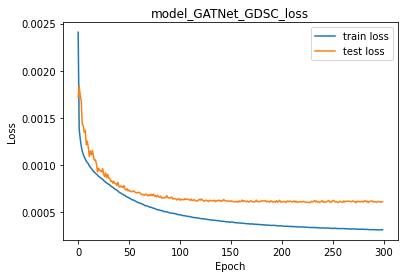

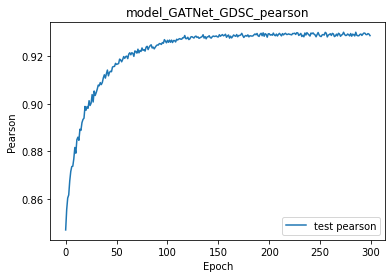

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), model_file_name)
                with open(result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    # parser = argparse.ArgumentParser(description='train model')
    # parser.add_argument('--model', type=int, required=False, default=0,     help='0: GINConvNet, 1: GATNet, 2: GAT_GCN, 3: GCNNet')
    # parser.add_argument('--train_batch', type=int, required=False, default=1024,  help='Batch size training set')
    # parser.add_argument('--val_batch', type=int, required=False, default=1024, help='Batch size validation set')
    # parser.add_argument('--test_batch', type=int, required=False, default=1024, help='Batch size test set')
    # parser.add_argument('--lr', type=float, required=False, default=1e-4, help='Learning rate')
    # parser.add_argument('--num_epoch', type=int, required=False, default=300, help='Number of epoch')
    # parser.add_argument('--log_interval', type=int, required=False, default=20, help='Log interval')
    # parser.add_argument('--cuda_name', type=str, required=False, default="cuda:0", help='Cuda')

    # args = parser.parse_args()

    # modeling = [GINConvNet, GATNet, GAT_GCN, GCNNet][args.model]
    

    # train_batch = args.train_batch
    # val_batch = args.val_batch
    # test_batch = args.test_batch
    # lr = args.lr
    # num_epoch = args.num_epoch
    # log_interval = args.log_interval
    # cuda_name = args.cuda_name

    # modeling = [GINConvNet, GATNet, GAT_GCN, GCNNet][args.model]
    # train_batch = args.train_batch
    # val_batch = args.val_batch
    # test_batch = args.test_batch
    # lr = args.lr
    # num_epoch = args.num_epoch
    # log_interval = args.log_interval
    # cuda_name = args.cuda_name

    modeling = GATNet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4
    num_epoch = 300
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

### GCN Epoch = 300, fpl = 300

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016"
# branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_008"

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016
Learning rate:  0.0001
Epochs:  300

running on  GCNNet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/300 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.007648
Train epoch: 1 [655100/152839 (13%)]	Loss: 0.004414
Train epoch: 1 [1282160/152839 (27%)]	Loss: 0.003826
Train epoch: 1 [1947780/152839 (40%)]	Loss: 0.002623
Train epoch: 1 [2631840/152839 (53%)]	Loss: 0.001760
Train epoch: 1 [3287400/152839 (67%)]	Loss: 0.001476
Train epoch: 1 [3909960/152839 (80%)]	Loss: 0.001566
Train epoch: 1 [4531660/152839 (93%)]	Loss: 0.001394
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.0013174632 GCNNet GDSC
End of Epoch 1; 7 hours, 15 minutes, and 5 seconds remaining
epoch : 2/300 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.001483
Train epoch: 2 [650640/152839 (13%)]	Loss: 0.001416
Train epoch: 2 [1313400/152839 (27%)]	Loss: 0.001363
Train epoch: 2 [1972860/152839 (40%)]	Loss: 0.001341
Train epoch: 2 [2603600/152839 (53%)]	Loss: 0.001583
Train epoch: 2 [

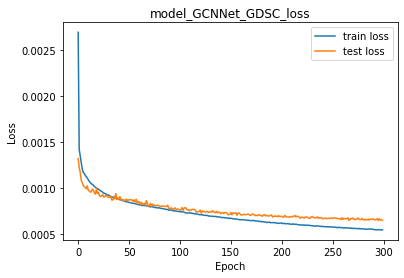

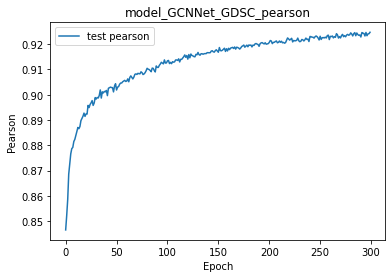

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), model_file_name)
                with open(result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = GCNNet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4
    num_epoch = 300
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

### GCN Epoch = 300, fpl = 0,

In [ ]:
save_folder = "gdrive/MyDrive/FYP/Saves/"

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017"

In [ ]:
train_data = TestbedDataset(root=branch_folder, dataset='GDSC'+'_train_mix')
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
next(iter(train_loader))

Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017/processed/GDSC_train_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


DataBatch(x=[28, 78], edge_index=[2, 64], y=[1], target=[1, 735], c_size=[1], batch=[28], ptr=[2])

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017
Learning rate:  0.0001
Epochs:  300

running on  GCNNet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/300 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.009178
Train epoch: 1 [658060/152839 (13%)]	Loss: 0.004988
Train epoch: 1 [1299720/152839 (27%)]	Loss: 0.004324
Train epoch: 1 [1970700/152839 (40%)]	Loss: 0.004304
Train epoch: 1 [2578160/152839 (53%)]	Loss: 0.004646
Train epoch: 1 [3261900/152839 (67%)]	Loss: 0.004492
Train epoch: 1 [3828000/152839 (80%)]	Loss: 0.004125
Train epoch: 1 [4591860/152839 (93%)]	Loss: 0.003627
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.0034571572 GCNNet GDSC
End of Epoch 1; 2 hours, 54 minutes, and 15 seconds remaining
epoch : 2/300 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.003757
Train epoch: 2 [648940/152839 (13%)]	Loss: 0.003628
Train epoch: 2 [1286920/152839 (27%)]	Loss: 0.003059
Train epoch: 2 [1962720/152839 (40%)]	Loss: 0.002816
Train epoch: 2 [2608960/152839 (53%)]	Loss: 0.002521
Train epoch: 2 

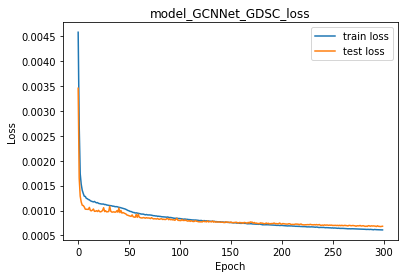

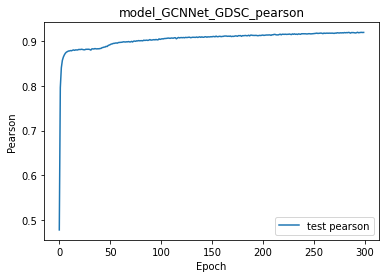

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), save_folder + model_file_name)
                with open(save_folder + result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = GCNNet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4
    num_epoch = 300
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

### GCN Epoch = 300, fpl = 0, Used Features

In [ ]:
save_folder = "gdrive/MyDrive/FYP/Saves/"

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_021"
# branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_008"

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_021
Learning rate:  0.0001
Epochs:  300

running on  GCNNet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_021/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_021/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_021/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/300 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.005480
Train epoch: 1 [640420/152839 (13%)]	Loss: 0.004995
Train epoch: 1 [1290920/152839 (27%)]	Loss: 0.004783
Train epoch: 1 [1929600/152839 (40%)]	Loss: 0.004343
Train epoch: 1 [2621680/152839 (53%)]	Loss: 0.004376
Train epoch: 1 [3235500/152839 (67%)]	Loss: 0.004434
Train epoch: 1 [3933600/152839 (80%)]	Loss: 0.004108
Train epoch: 1 [4594520/152839 (93%)]	Loss: 0.003706
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.003689146 GCNNet GDSC
End of Epoch 1; 2 hours, 51 minutes, and 52 seconds remaining
epoch : 2/300 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.003668
Train epoch: 2 [646600/152839 (13%)]	Loss: 0.003892
Train epoch: 2 [1329320/152839 (27%)]	Loss: 0.003392
Train epoch: 2 [1965780/152839 (40%)]	Loss: 0.003375
Train epoch: 2 [2632880/152839 (53%)]	Loss: 0.003404
Train epoch: 2 [

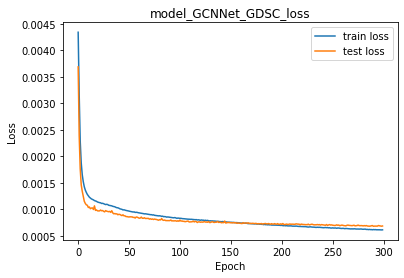

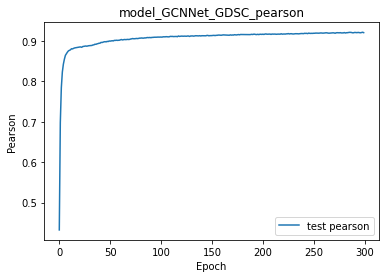

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), save_folder + model_file_name)
                with open(save_folder + result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = GCNNet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4
    num_epoch = 300
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

### GAT Epoch = 300, fpl = None

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017"  

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017
Learning rate:  0.0001
Epochs:  300

running on  GATNet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/300 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.005587
Train epoch: 1 [655000/152839 (13%)]	Loss: 0.004326
Train epoch: 1 [1316840/152839 (27%)]	Loss: 0.004532
Train epoch: 1 [1951320/152839 (40%)]	Loss: 0.004186
Train epoch: 1 [2631120/152839 (53%)]	Loss: 0.003906
Train epoch: 1 [3204500/152839 (67%)]	Loss: 0.003553
Train epoch: 1 [3830520/152839 (80%)]	Loss: 0.003670
Train epoch: 1 [4564420/152839 (93%)]	Loss: 0.003825
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.0034723629 GATNet GDSC
End of Epoch 1; 4 hours, 45 minutes, and 22 seconds remaining
epoch : 2/300 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.003529
Train epoch: 2 [650780/152839 (13%)]	Loss: 0.003258
Train epoch: 2 [1301920/152839 (27%)]	Loss: 0.003369
Train epoch: 2 [1905300/152839 (40%)]	Loss: 0.003296
Train epoch: 2 [2610000/152839 (53%)]	Loss: 0.003459
Train epoch: 2 

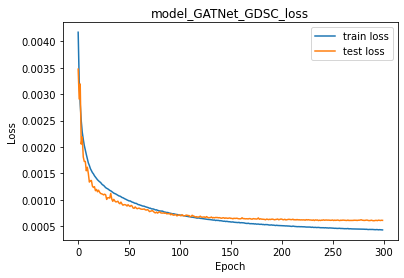

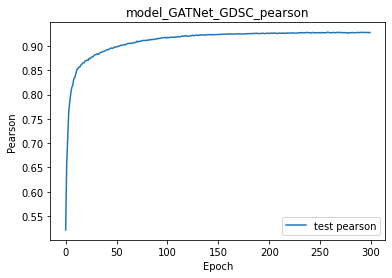

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), model_file_name)
                with open(result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = GATNet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4
    num_epoch = 300
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

### GAT_E Epoch = 300, fpl = None

In [ ]:
vald = TestbedDataset(root="gdrive/MyDrive/FYP/Data/DRP/root_folder/root_019", dataset="GDSC"+'_val_mix')
data = next(iter(vald))
print(data)

Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_019/processed/GDSC_val_mix.pt, loading ...
Data(x=[27, 78], edge_index=[2, 58], y=[1], edge_features=[58, 4], target=[1, 735], c_size=[1])


In [ ]:
save_folder = "gdrive/MyDrive/FYP/Saves/"

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_019"

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_019
Learning rate:  0.0001
Epochs:  300

running on  GATNet_E_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_019/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_019/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_019/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/300 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.005596
Train epoch: 1 [641820/152839 (13%)]	Loss: 0.004653
Train epoch: 1 [1311480/152839 (27%)]	Loss: 0.004536
Train epoch: 1 [1927260/152839 (40%)]	Loss: 0.004477
Train epoch: 1 [2637040/152839 (53%)]	Loss: 0.004325
Train epoch: 1 [3287300/152839 (67%)]	Loss: 0.003646
Train epoch: 1 [3906600/152839 (80%)]	Loss: 0.003985
Train epoch: 1 [4565120/152839 (93%)]	Loss: 0.003743
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.0037809347 GATNet_E GDSC
End of Epoch 1; 4 hours, 17 minutes, and 10 seconds remaining
epoch : 2/300 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.003875
Train epoch: 2 [647420/152839 (13%)]	Loss: 0.003346
Train epoch: 2 [1285040/152839 (27%)]	Loss: 0.003675
Train epoch: 2 [1945080/152839 (40%)]	Loss: 0.003352
Train epoch: 2 [2597760/152839 (53%)]	Loss: 0.002943
Train epoch: 

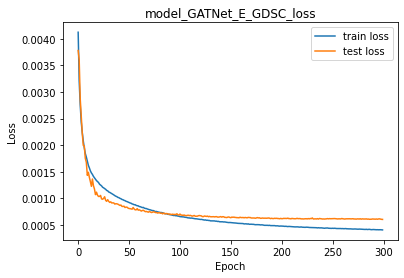

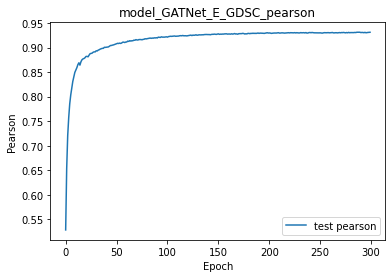

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), save_folder + model_file_name)
                with open(save_folder + result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = GATNet_E
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4
    num_epoch = 300
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

### GAT_E Epoch = 300, fpl = 300

In [ ]:
vald = TestbedDataset(root="gdrive/MyDrive/FYP/Data/DRP/root_folder/root_020", dataset="GDSC"+'_val_mix')
data = next(iter(vald))
print(data)

Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_020/processed/GDSC_val_mix.pt, loading ...
Data(x=[23, 378], edge_index=[2, 48], y=[1], edge_features=[48, 4], target=[1, 735], c_size=[1])


In [ ]:
save_folder = "gdrive/MyDrive/FYP/Saves/"

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_020"

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_020
Learning rate:  0.0001
Epochs:  300

running on  GATNet_E_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_020/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_020/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_020/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/300 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.005563
Train epoch: 1 [645060/152839 (13%)]	Loss: 0.003575
Train epoch: 1 [1307800/152839 (27%)]	Loss: 0.002311
Train epoch: 1 [1967100/152839 (40%)]	Loss: 0.001561
Train epoch: 1 [2579120/152839 (53%)]	Loss: 0.001532
Train epoch: 1 [3288100/152839 (67%)]	Loss: 0.001397
Train epoch: 1 [3888360/152839 (80%)]	Loss: 0.001536
Train epoch: 1 [4589480/152839 (93%)]	Loss: 0.001471
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.0017354321 GATNet_E GDSC
End of Epoch 1; 7 hours, 39 minutes, and 44 seconds remaining
epoch : 2/300 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.001331
Train epoch: 2 [644440/152839 (13%)]	Loss: 0.001445
Train epoch: 2 [1311560/152839 (27%)]	Loss: 0.001546
Train epoch: 2 [1954500/152839 (40%)]	Loss: 0.001369
Train epoch: 2 [2622960/152839 (53%)]	Loss: 0.001340
Train epoch: 

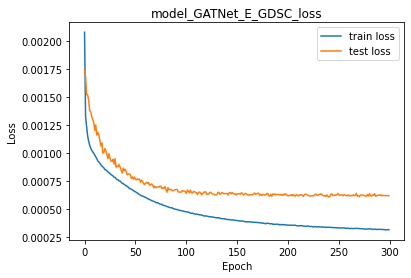

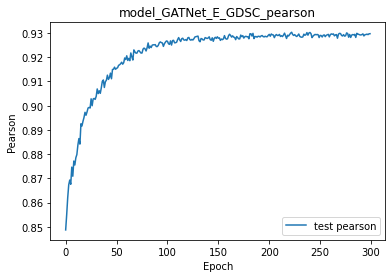

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), save_folder + model_file_name)
                with open(save_folder + result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = GATNet_E
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4
    num_epoch = 300
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

### GAT Epoch = 300, fpl = None

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017"

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017
Learning rate:  0.0001
Epochs:  300

running on  GATNet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_017/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/300 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.006618
Train epoch: 1 [654000/152839 (13%)]	Loss: 0.004949
Train epoch: 1 [1318040/152839 (27%)]	Loss: 0.004353
Train epoch: 1 [1959960/152839 (40%)]	Loss: 0.004339
Train epoch: 1 [2606800/152839 (53%)]	Loss: 0.004308
Train epoch: 1 [3181300/152839 (67%)]	Loss: 0.004338
Train epoch: 1 [3876720/152839 (80%)]	Loss: 0.003965
Train epoch: 1 [4533760/152839 (93%)]	Loss: 0.003644
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.0035179644 GATNet GDSC
End of Epoch 1; 4 hours, 45 minutes, and 9 seconds remaining
epoch : 2/300 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.003582
Train epoch: 2 [641380/152839 (13%)]	Loss: 0.003634
Train epoch: 2 [1286760/152839 (27%)]	Loss: 0.003703
Train epoch: 2 [1983300/152839 (40%)]	Loss: 0.003205
Train epoch: 2 [2604080/152839 (53%)]	Loss: 0.003359
Train epoch: 2 [

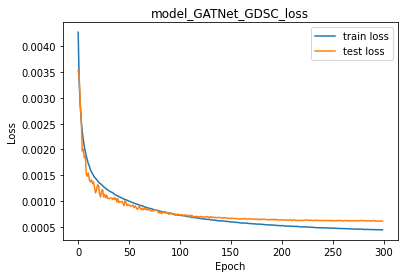

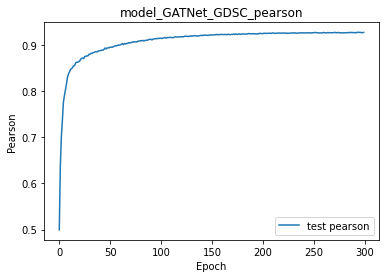

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), model_file_name)
                with open(result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = GATNet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4
    num_epoch = 300
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

### GSG Epoch = 300, fpl = None

In [ ]:
save_folder = "gdrive/MyDrive/FYP/Saves/"

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018" root_016

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018
Learning rate:  0.0001
Epochs:  300

running on  SAGENet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/300 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.005220
Train epoch: 1 [650320/152839 (13%)]	Loss: 0.004720
Train epoch: 1 [1322840/152839 (27%)]	Loss: 0.004530
Train epoch: 1 [1941420/152839 (40%)]	Loss: 0.004435
Train epoch: 1 [2631040/152839 (53%)]	Loss: 0.004688
Train epoch: 1 [3251700/152839 (67%)]	Loss: 0.003951
Train epoch: 1 [4014000/152839 (80%)]	Loss: 0.003218
Train epoch: 1 [4529420/152839 (93%)]	Loss: 0.002576
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.0021615282 SAGENet GDSC
End of Epoch 1; 3 hours, 54 minutes, and 18 seconds remaining
epoch : 2/300 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.002507
Train epoch: 2 [651900/152839 (13%)]	Loss: 0.002044
Train epoch: 2 [1317280/152839 (27%)]	Loss: 0.001911
Train epoch: 2 [1949520/152839 (40%)]	Loss: 0.001613
Train epoch: 2 [2623280/152839 (53%)]	Loss: 0.001757
Train epoch: 2

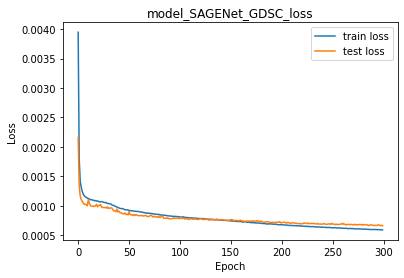

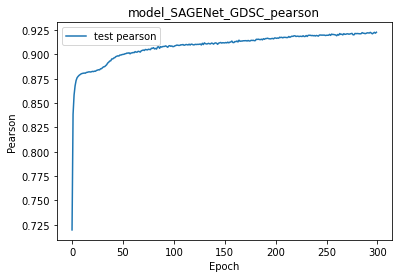

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), save_folder + model_file_name)
                with open(save_folder + result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = SAGENet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4
    num_epoch = 300
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

### GSG Epoch = 300, fpl = 300

In [ ]:
save_folder = "gdrive/MyDrive/FYP/Saves/"

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016" 

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016
Learning rate:  0.0001
Epochs:  300

running on  SAGENet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_016/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/300 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.006179
Train epoch: 1 [662180/152839 (13%)]	Loss: 0.004127
Train epoch: 1 [1313760/152839 (27%)]	Loss: 0.003039
Train epoch: 1 [1944600/152839 (40%)]	Loss: 0.002232
Train epoch: 1 [2602320/152839 (53%)]	Loss: 0.001861
Train epoch: 1 [3240800/152839 (67%)]	Loss: 0.001631
Train epoch: 1 [3946680/152839 (80%)]	Loss: 0.001522
Train epoch: 1 [4551680/152839 (93%)]	Loss: 0.001505
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.0014236211 SAGENet GDSC
End of Epoch 1; 5 hours, 10 minutes, and 22 seconds remaining
epoch : 2/300 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.001439
Train epoch: 2 [637220/152839 (13%)]	Loss: 0.001671
Train epoch: 2 [1284200/152839 (27%)]	Loss: 0.001375
Train epoch: 2 [1949280/152839 (40%)]	Loss: 0.001434
Train epoch: 2 [2617040/152839 (53%)]	Loss: 0.001396
Train epoch: 2

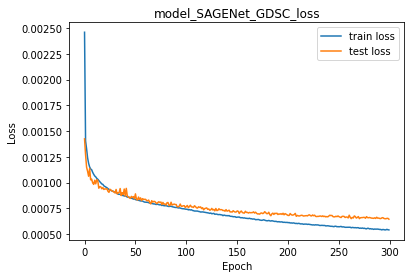

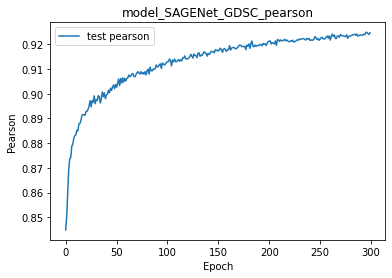

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), save_folder + model_file_name)
                with open(save_folder + result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = SAGENet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4
    num_epoch = 300
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

### GCN Epoch = 0, fpl = None

In [ ]:
save_folder = "gdrive/MyDrive/FYP/Saves/"

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018"

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), model_file_name)
                with open(result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = GATNet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4  
    num_epoch = 1
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018
Learning rate:  0.0001
Epochs:  1

running on  GATNet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/1 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.005594
Train epoch: 1 [633780/152839 (13%)]	Loss: 0.004385
Train epoch: 1 [1308920/152839 (27%)]	Loss: 0.004375
Train epoch: 1 [1942380/152839 (40%)]	Loss: 0.004247
Train epoch: 1 [2581440/152839 (53%)]	Loss: 0.004030
Train epoch: 1 [3306300/152839 (67%)]	Loss: 0.003853
Train epoch: 1 [3977160/152839 (80%)]	Loss: 0.003795
Train epoch: 1 [4643100/152839 (93%)]	Loss: 0.003648
Make prediction for 19105 samples...


KeyboardInterrupt: ignored

### GCN Epoch = 10, fpl = None

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018"

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018
Learning rate:  0.0001
Epochs:  10

running on  GCNNet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/10 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.006214
Train epoch: 1 [650280/152839 (13%)]	Loss: 0.004275
Train epoch: 1 [1295160/152839 (27%)]	Loss: 0.004493
Train epoch: 1 [1977540/152839 (40%)]	Loss: 0.004285
Train epoch: 1 [2573760/152839 (53%)]	Loss: 0.004347
Train epoch: 1 [3278900/152839 (67%)]	Loss: 0.003848
Train epoch: 1 [3888840/152839 (80%)]	Loss: 0.003799
Train epoch: 1 [4618740/152839 (93%)]	Loss: 0.003356
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.0031298446 GCNNet GDSC
End of Epoch 1; 0 hours, 6 minutes, and 25 seconds remaining
epoch : 2/10 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.003213
Train epoch: 2 [658380/152839 (13%)]	Loss: 0.002924
Train epoch: 2 [1290040/152839 (27%)]	Loss: 0.002661
Train epoch: 2 [1939860/152839 (40%)]	Loss: 0.002469
Train epoch: 2 [2610800/152839 (53%)]	Loss: 0.002421
Train epoch: 2 [32

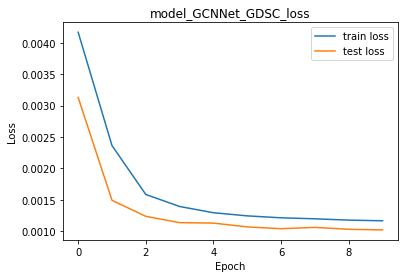

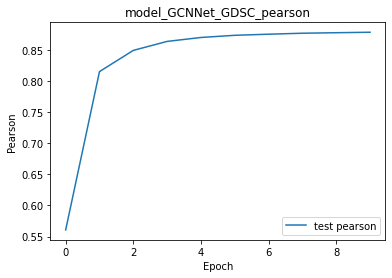

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')
        

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), model_file_name)
                with open(result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = GCNNet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4  
    num_epoch = 10
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

### GAT Epoch = 10, fpl = None

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018"

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018
Learning rate:  0.0001
Epochs:  10

running on  GATNet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/10 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.006393
Train epoch: 1 [647580/152839 (13%)]	Loss: 0.004384
Train epoch: 1 [1308080/152839 (27%)]	Loss: 0.004416
Train epoch: 1 [1970520/152839 (40%)]	Loss: 0.004220
Train epoch: 1 [2592240/152839 (53%)]	Loss: 0.004157
Train epoch: 1 [3288900/152839 (67%)]	Loss: 0.003835
Train epoch: 1 [3874800/152839 (80%)]	Loss: 0.003916
Train epoch: 1 [4572960/152839 (93%)]	Loss: 0.003950
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.0035762663 GATNet GDSC
End of Epoch 1; 0 hours, 10 minutes, and 47 seconds remaining
epoch : 2/10 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.003746
Train epoch: 2 [647300/152839 (13%)]	Loss: 0.003569
Train epoch: 2 [1301440/152839 (27%)]	Loss: 0.003466
Train epoch: 2 [1960680/152839 (40%)]	Loss: 0.003699
Train epoch: 2 [2578160/152839 (53%)]	Loss: 0.003172
Train epoch: 2 [3

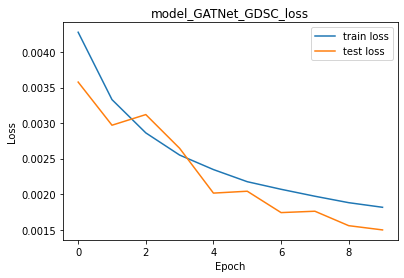

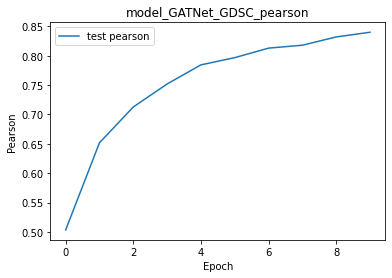

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), model_file_name)
                with open(result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = GATNet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4  
    num_epoch = 10
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

### GSG Epoch = 10, fpl = None

In [ ]:
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018"

branch_folder = gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018
Learning rate:  0.0001
Epochs:  10

running on  SAGENet_GDSC
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_train_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_val_mix.pt, loading ...
Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_018/processed/GDSC_test_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CPU/GPU:  True
cuda:0
epoch : 1/10 
Training on 152839 samples...
Train epoch: 1 [0/152839 (0%)]	Loss: 0.007683
Train epoch: 1 [649040/152839 (13%)]	Loss: 0.004590
Train epoch: 1 [1278840/152839 (27%)]	Loss: 0.004241
Train epoch: 1 [1922340/152839 (40%)]	Loss: 0.003910
Train epoch: 1 [2671760/152839 (53%)]	Loss: 0.004273
Train epoch: 1 [3276900/152839 (67%)]	Loss: 0.004079
Train epoch: 1 [3913560/152839 (80%)]	Loss: 0.003675
Train epoch: 1 [4543560/152839 (93%)]	Loss: 0.003171
Make prediction for 19105 samples...
Make prediction for 19105 samples...
 rmse improved at epoch  1 ; best_mse: 0.002598341 SAGENet GDSC
End of Epoch 1; 0 hours, 6 minutes, and 17 seconds remaining
epoch : 2/10 
Training on 152839 samples...
Train epoch: 2 [0/152839 (0%)]	Loss: 0.003283
Train epoch: 2 [647820/152839 (13%)]	Loss: 0.002315
Train epoch: 2 [1309760/152839 (27%)]	Loss: 0.002014
Train epoch: 2 [1943880/152839 (40%)]	Loss: 0.001970
Train epoch: 2 [2601920/152839 (53%)]	Loss: 0.001785
Train epoch: 2 [32

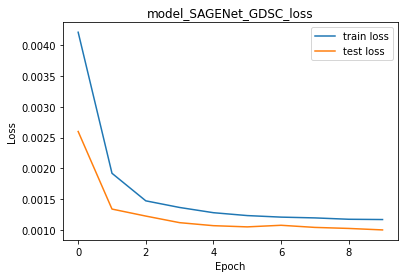

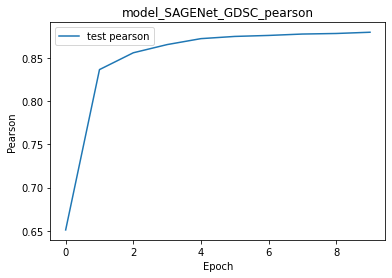

In [ ]:
import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse

# training function at each epoch
def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + model_st + '_' + dataset +  '.model'
        result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + model_st + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + model_st + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                torch.save(model.state_dict(), model_file_name)
                with open(result_file_name,'w') as f:
                    f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

if __name__ == "__main__":
    modeling = SAGENet
    train_batch = 1024 
    val_batch = 1024
    test_batch = 1024
    lr = 1e-4  
    num_epoch = 10
    log_interval = 20
    cuda_name = 0
    print(f"branch_folder = {branch_folder}")
    main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder)

## Testing

In [ ]:
save_folder = "gdrive/MyDrive/FYP/Saves/"

In [ ]:
os.listdir(save_folder)

['GSG-EP300-ECFP6_0', 'GSG-EP300-ECFP6_300']

In [ ]:
# model = SAGENet(n_output=1, n_filters=32, embed_dim=128,num_features_xd=78, num_features_xt=25, output_dim=128, dropout=0.5)
model = SAGENet()
model.load_state_dict(torch.load(save_folder+"GSG-EP300-ECFP6_300/"+"model_SAGENet_GDSC.model"))
# model.eval()

<All keys matched successfully>

In [ ]:
i = 24873 ## 24872
test_smiles = df5.loc[i].SMILES
test_cid = df5.loc[i].cosmic_sample_id
test_ic50 = df5.loc[i].IC50
print(f"test_smiles = {test_smiles}")
print(f"test_cid = {test_cid}")
print(f"test_ic50 = {test_ic50} <> {norm_ic50(test_ic50)}")
pred = predict_this(mdl = model, sml = test_smiles, cid = test_cid, do_ECFP = True, fpl = 300)
print(f"predicted ic50 = {pred} <> {norm_ic50(pred)}")

test_smiles = C1CC2=C(C1)C=C(C=C2)OC3=NC4=C(C(=N3)NC(CC5=CC=CC=C5)CO)N=CN4CC6=CC=C(C=C6)C7=CC=CC=C7
test_cid = 908158
test_ic50 = 1.27659564 <> 0.5318716185330629
predicted ic50 = 1.8946497345477578 <> 0.5472250580787659


In [ ]:
df5.iloc[[24871, 24872, 24873]]

drug_name  ...                                             SMILES
24871      QS11  ...  C1CC2=C(C1)C=C(C=C2)OC3=NC4=C(C(=N3)NC(CC5=CC=...
24872      QS11  ...  C1CC2=C(C1)C=C(C=C2)OC3=NC4=C(C(=N3)NC(CC5=CC=...
24873      QS11  ...  C1CC2=C(C1)C=C(C=C2)OC3=NC4=C(C(=N3)NC(CC5=CC=...

[3 rows x 16 columns]

# Rough

## Edge Features 

In [ ]:
from torch import nn
import torch


class E_GCL(nn.Module):
    """
    E(n) Equivariant Convolutional Layer
    re
    """

    def __init__(self, input_nf, output_nf, hidden_nf, edges_in_d=0, act_fn=nn.SiLU(), residual=True, attention=False, normalize=False, coords_agg='mean', tanh=False):
        super(E_GCL, self).__init__()
        input_edge = input_nf * 2
        self.residual = residual
        self.attention = attention
        self.normalize = normalize
        self.coords_agg = coords_agg
        self.tanh = tanh
        self.epsilon = 1e-8
        edge_coords_nf = 1

        # print(f"input_edge: {input_edge}")   
        # print(f"edge_coords_nf: {edge_coords_nf}")
        # print(f"edges_in_d: {edges_in_d}")
        # print(f"hidden_nf: {hidden_nf}")
        # print()

        self.edge_mlp = nn.Sequential(
            nn.Linear(input_edge + edge_coords_nf + edges_in_d, hidden_nf),
            act_fn,
            nn.Linear(hidden_nf, hidden_nf),
            act_fn)

        self.node_mlp = nn.Sequential(
            nn.Linear(hidden_nf + input_nf, hidden_nf),
            act_fn,
            nn.Linear(hidden_nf, output_nf))

        layer = nn.Linear(hidden_nf, 1, bias=False)
        torch.nn.init.xavier_uniform_(layer.weight, gain=0.001)

        coord_mlp = []
        coord_mlp.append(nn.Linear(hidden_nf, hidden_nf))
        coord_mlp.append(act_fn)
        coord_mlp.append(layer)
        if self.tanh:
            coord_mlp.append(nn.Tanh())
        self.coord_mlp = nn.Sequential(*coord_mlp)

        if self.attention:
            self.att_mlp = nn.Sequential(
                nn.Linear(hidden_nf, 1),
                nn.Sigmoid())

    def edge_model(self, source, target, radial, edge_attr):
        if edge_attr is None:  # Unused.
            out = torch.cat([source, target, radial], dim=1)
        else:
            # print(f"source.shape : {source.shape}")
            # print(f"target.shape : {target.shape}")
            # print(f"radial.shape : {radial.shape}")
            # print(f"edge_attr.shape : {edge_attr.shape}")
            out = torch.cat([source, target, radial, edge_attr], dim=1)
            # print(f"out.shape : {out.shape}")        
        out = self.edge_mlp(out)
        # print(f"after edge_mlp out.shape : {out.shape}")
        if self.attention:
            att_val = self.att_mlp(out)
            out = out * att_val
        # print(f"Exiting edge_model out.shape : {out.shape}")
        # print()
        return out

    def node_model(self, x, edge_index, edge_attr, node_attr):
        row, col = edge_index
        agg = unsorted_segment_sum(edge_attr, row, num_segments=x.size(0))
        if node_attr is not None:
            agg = torch.cat([x, agg, node_attr], dim=1)
        else:
            agg = torch.cat([x, agg], dim=1)
        out = self.node_mlp(agg)
        if self.residual:
            out = x + out
        return out, agg

    def coord_model(self, coord, edge_index, coord_diff, edge_feat):
        row, col = edge_index
        trans = coord_diff * self.coord_mlp(edge_feat)
        if self.coords_agg == 'sum':
            agg = unsorted_segment_sum(trans, row, num_segments=coord.size(0))
        elif self.coords_agg == 'mean':
            agg = unsorted_segment_mean(trans, row, num_segments=coord.size(0))
        else:
            raise Exception('Wrong coords_agg parameter' % self.coords_agg)
        coord += agg
        return coord

    def coord2radial(self, edge_index, coord):
        # print("inside coord2radial")
        row, col = edge_index
        coord_diff = coord[row] - coord[col]
        # print(f"coord_diff = {coord_diff}")
        radial = torch.sum(coord_diff**2, 1).unsqueeze(1)
        # print(f"radial = {radial}")

        if self.normalize:
            norm = torch.sqrt(radial).detach() + self.epsilon
            coord_diff = coord_diff / norm
        # print("exit coord2radial")
        return radial, coord_diff

    def forward(self, h, edge_index, coord, edge_attr=None, node_attr=None):
        row, col = edge_index
        # print(f"row = {row}")
        # print(f"col = {col}")
        radial, coord_diff = self.coord2radial(edge_index, coord)
        # print(f"coord_diff = {coord_diff}")
        # print(f"radial = {radial}")

        edge_feat = self.edge_model(h[row], h[col], radial, edge_attr)
        coord = self.coord_model(coord, edge_index, coord_diff, edge_feat)
        h, agg = self.node_model(h, edge_index, edge_feat, node_attr)

        return h, coord, edge_attr


class EGNN(nn.Module):  ## egnn = EGNN(in_node_nf=n_feat, hidden_nf=32, out_node_nf=1, in_edge_nf=1)  ## n_feat = 1
    def __init__(self, in_node_nf, hidden_nf, out_node_nf, in_edge_nf=0, device='cpu', act_fn=nn.SiLU(), n_layers=4, residual=True, attention=False, normalize=False, tanh=False):
        '''
        :param in_node_nf: Number of features for 'h' at the input
        :param hidden_nf: Number of hidden features
        :param out_node_nf: Number of features for 'h' at the output
        :param in_edge_nf: Number of features for the edge features
        :param device: Device (e.g. 'cpu', 'cuda:0',...)
        :param act_fn: Non-linearity
        :param n_layers: Number of layer for the EGNN
        :param residual: Use residual connections, we recommend not changing this one
        :param attention: Whether using attention or not
        :param normalize: Normalizes the coordinates messages such that:
                    instead of: x^{l+1}_i = x^{l}_i + Σ(x_i - x_j)phi_x(m_ij)
                    we get:     x^{l+1}_i = x^{l}_i + Σ(x_i - x_j)phi_x(m_ij)/||x_i - x_j||
                    We noticed it may help in the stability or generalization in some future works.
                    We didn't use it in our paper.
        :param tanh: Sets a tanh activation function at the output of phi_x(m_ij). I.e. it bounds the output of
                        phi_x(m_ij) which definitely improves in stability but it may decrease in accuracy.
                        We didn't use it in our paper.
        '''

        super(EGNN, self).__init__()
        self.hidden_nf = hidden_nf
        self.device = device
        self.n_layers = n_layers
        self.embedding_in = nn.Linear(in_node_nf, self.hidden_nf)
        self.embedding_out = nn.Linear(self.hidden_nf, out_node_nf)
        for i in range(0, n_layers):
            self.add_module("gcl_%d" % i, E_GCL(self.hidden_nf, self.hidden_nf, self.hidden_nf, edges_in_d=in_edge_nf,
                                                act_fn=act_fn, residual=residual, attention=attention,
                                                normalize=normalize, tanh=tanh))
        self.to(self.device)

    def forward(self, h, x, edges, edge_attr):  # torres
        # print("forward")
        h = self.embedding_in(h)
        # print(f"h = {h}")
        for i in range(0, self.n_layers):
            # print(f"i = {i}  self.n_layers = {self.n_layers}")
            h, x, _ = self._modules["gcl_%d" % i](h, edges, x, edge_attr=edge_attr)
            # print(f'now xxx{x}')
        # print("here")
        h = self.embedding_out(h)
        return h, x


def unsorted_segment_sum(data, segment_ids, num_segments):
    result_shape = (num_segments, data.size(1))
    result = data.new_full(result_shape, 0)  # Init empty result tensor.
    segment_ids = segment_ids.unsqueeze(-1).expand(-1, data.size(1))
    result.scatter_add_(0, segment_ids, data)
    return result


def unsorted_segment_mean(data, segment_ids, num_segments):
    result_shape = (num_segments, data.size(1))
    segment_ids = segment_ids.unsqueeze(-1).expand(-1, data.size(1))
    result = data.new_full(result_shape, 0)  # Init empty result tensor.
    count = data.new_full(result_shape, 0)
    result.scatter_add_(0, segment_ids, data)
    count.scatter_add_(0, segment_ids, torch.ones_like(data))
    return result / count.clamp(min=1)


def get_edges(n_nodes):
    rows, cols = [], []
    for i in range(n_nodes):
        for j in range(n_nodes):
            if i != j:
                rows.append(i)
                cols.append(j)

    edges = [rows, cols]
    return edges


def get_edges_batch(n_nodes, batch_size):
    edges = get_edges(n_nodes)
    edge_attr = torch.ones(len(edges[0]) * batch_size, 1)
    edges = [torch.LongTensor(edges[0]), torch.LongTensor(edges[1])]
    if batch_size == 1:
        return edges, edge_attr
    elif batch_size > 1:
        rows, cols = [], []
        for i in range(batch_size):
            rows.append(edges[0] + n_nodes * i)
            cols.append(edges[1] + n_nodes * i)
            # import pdb; pdb.set_trace()
        edges = [torch.cat(rows), torch.cat(cols)]
    return edges, edge_attr


if __name__ == "__main__":
    # Dummy parameters
    batch_size = 1 ## 8
    n_nodes = 7
    n_feat = 4 ## 1
    x_dim = 3

    # Dummy variables h, x and fully connected edges
    h = torch.ones(batch_size *  n_nodes, n_feat)
    x = torch.ones(batch_size * n_nodes, x_dim)
    edges, edge_attr = get_edges_batch(n_nodes, batch_size)

    # Initialize EGNN
    # egnn = EGNN(in_node_nf=n_feat, hidden_nf=32, out_node_nf=1, in_edge_nf=1)  ## n_feat = 1
    egnn = EGNN(in_node_nf=n_feat, hidden_nf=32, out_node_nf=1, in_edge_nf=1)  ## n_feat = 1

    # Run EGNN
    h, x = egnn(h, x, edges, edge_attr)

In [ ]:
batch_size_g = 1
n_nodes_g = 58
n_feat_g = 4
x_dim_g = 3

# Dummy variables h, x and fully connected edges
h_g = torch.ones(batch_size_g *  n_nodes_g, n_feat_g)
x_g = torch.ones(batch_size_g * n_nodes_g, x_dim_g)

egnn_g = EGNN(in_node_nf=n_feat_g, hidden_nf=32, out_node_nf=1, in_edge_nf=4)  ## n_feat = 1

# row, col = data.edge_index
# coord_diff = x_g[row] - x_g[col]
# coord_diff.shape
# h_g, x_g = egnn_g(h_g, x_g, data.edge_index, one_ef)


h_g, x_g = egnn_g(h_g, x_g, data.edge_index, data.edge_features)

# RuntimeError: mat1 and mat2 shapes cannot be multiplied (58x69 and 66x32)

In [ ]:
h_g.shape, x_g.shape

(torch.Size([58, 1]), torch.Size([58, 3]))

In [ ]:
h_g, x_g

(tensor([[0.1789],
         [0.1634],
         [0.1638],
         [0.1238],
         [0.1752],
         [0.1752],
         [0.1639],
         [0.1440],
         [0.1440],
         [0.1442],
         [0.1439],
         [0.1597],
         [0.1597],
         [0.1790],
         [0.1440],
         [0.1751],
         [0.1441],
         [0.1597],
         [0.1597],
         [0.1419],
         [0.1597],
         [0.1597],
         [0.1438],
         [0.1598],
         [0.1420],
         [0.1790],
         [0.1790],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.1942],
         [0.

In [ ]:
batch_size_g = 1
n_nodes_g = 58
n_feat_g = 4
x_dim_g = 3

# Dummy variables h, x and fully connected edges
h_g = torch.ones(batch_size_g *  n_nodes_g, n_feat_g)
x_g = torch.ones(batch_size_g * n_nodes_g, x_dim_g)

egnn_g = EGNN(in_node_nf=n_feat_g, hidden_nf=32, out_node_nf=1, in_edge_nf=4)  ## n_feat = 1

# row, col = data.edge_index
# coord_diff = x_g[row] - x_g[col]
# coord_diff.shape
# h_g, x_g = egnn_g(h_g, x_g, data.edge_index, one_ef)
h_g, x_g = egnn_g(h_g, x_g, data.edge_index, data.edge_features)

# RuntimeError: mat1 and mat2 shapes cannot be multiplied (58x69 and 66x32)

input_edge: 64
edge_coords_nf: 1
edges_in_d: 4
hidden_nf: 32

input_edge: 64
edge_coords_nf: 1
edges_in_d: 4
hidden_nf: 32

input_edge: 64
edge_coords_nf: 1
edges_in_d: 4
hidden_nf: 32

input_edge: 64
edge_coords_nf: 1
edges_in_d: 4
hidden_nf: 32

source.shape : torch.Size([58, 32])
target.shape : torch.Size([58, 32])
radial.shape : torch.Size([58, 1])
edge_attr.shape : torch.Size([58, 4])
out.shape : torch.Size([58, 69])
after edge_mlp out.shape : torch.Size([58, 32])
Exiting edge_model out.shape : torch.Size([58, 32])

source.shape : torch.Size([58, 32])
target.shape : torch.Size([58, 32])
radial.shape : torch.Size([58, 1])
edge_attr.shape : torch.Size([58, 4])
out.shape : torch.Size([58, 69])
after edge_mlp out.shape : torch.Size([58, 32])
Exiting edge_model out.shape : torch.Size([58, 32])

source.shape : torch.Size([58, 32])
target.shape : torch.Size([58, 32])
radial.shape : torch.Size([58, 1])
edge_attr.shape : torch.Size([58, 4])
out.shape : torch.Size([58, 69])
after edge_mlp o

In [ ]:
h_g

tensor([[-0.0310],
        [-0.0197],
        [-0.0200],
        [ 0.0063],
        [-0.0304],
        [-0.0304],
        [-0.0201],
        [-0.0122],
        [-0.0122],
        [-0.0124],
        [-0.0121],
        [-0.0239],
        [-0.0239],
        [-0.0311],
        [-0.0072],
        [-0.0303],
        [-0.0123],
        [-0.0239],
        [-0.0239],
        [-0.0143],
        [-0.0239],
        [-0.0239],
        [-0.0120],
        [-0.0240],
        [-0.0144],
        [-0.0311],
        [-0.0311],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.0417],
        [-0.

In [ ]:
# while True: pass

In [ ]:
print(f"edges[0].shape = {edges[0].shape}")
print(f"edges= {edges}")
print()
print(f"edge_attr.shape = {edge_attr.shape}")
# print(f"edge_attr = {edge_attr}")

edges[0].shape = torch.Size([20])
edges= [tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]), tensor([1, 2, 3, 4, 0, 2, 3, 4, 0, 1, 3, 4, 0, 1, 2, 4, 0, 1, 2, 3])]

edge_attr.shape = torch.Size([20, 1])


In [ ]:
one_ef = ef[:,:1] 

source.shape : torch.Size([58, 32])
target.shape : torch.Size([58, 32])
radial.shape : torch.Size([58, 1])
edge_attr.shape : torch.Size([58, 4])
out.shape : torch.Size([58, 69])



RuntimeError: ignored

In [ ]:
vald = TestbedDataset(root="gdrive/MyDrive/FYP/Data/DRP/root_folder/root_020", dataset="GDSC"+'_val_mix')
data = next(iter(vald))
print(data)

Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_020/processed/GDSC_val_mix.pt, loading ...
Data(x=[23, 378], edge_index=[2, 48], y=[1], edge_features=[48, 4], target=[1, 735], c_size=[1])


In [ ]:

vald = TestbedDataset(root="gdrive/MyDrive/FYP/Data/DRP/root_folder/root_019", dataset="GDSC"+'_val_mix')
data = next(iter(vald))
print(data)

Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_019/processed/GDSC_val_mix.pt, loading ...
Data(x=[27, 78], edge_index=[2, 58], y=[1], edge_features=[58, 4], target=[1, 735], c_size=[1])


In [ ]:

vald = TestbedDataset(root="gdrive/MyDrive/FYP/Data/DRP/root_folder/root_019", dataset="GDSC"+'_val_mix')

Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_019/processed/GDSC_val_mix.pt, loading ...


In [ ]:
data = next(iter(vald))
print(data)
ef =data.edge_features

Data(x=[27, 78], edge_index=[2, 58], y=[1], edge_features=[58, 4], target=[1, 735], c_size=[1])


In [ ]:
data.edge_index

tensor([[ 0,  1,  1,  2,  2,  3,  3,  3,  3,  4,  5,  6,  6,  7,  7,  7,  8,  8,
          8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 13, 14, 14, 14, 15, 16, 16,
         16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24,
         24, 24, 25, 26],
        [ 1,  0,  2,  1,  3,  2,  4,  5,  6,  3,  3,  3,  7,  6,  8, 12,  7,  9,
         26,  8, 10, 14,  9, 11, 13, 10, 12, 11,  7, 10,  9, 15, 16, 14, 14, 17,
         24, 16, 18, 17, 19, 18, 20, 24, 19, 21, 20, 22, 21, 23, 25, 22, 24, 23,
         16, 19, 22,  8]])

In [ ]:
data.edge_features.shape

torch.Size([58, 4])

In [ ]:
batch_size_g = 2
n_nodes_g = 58
n_feat_g = 4
x_dim_g = 57

# Dummy variables h, x and fully connected edges
h_g = torch.ones(batch_size_g *  n_nodes_g, n_feat_g)
x_g = torch.ones(batch_size_g * n_nodes_g, x_dim_g)

egnn_g = EGNN(in_node_nf=n_feat_g, hidden_nf=32, out_node_nf=1, in_edge_nf=1)  ## n_feat = 1

row, col = data.edge_index
coord_diff = x_g[row] - x_g[col]
coord_diff.shape

In [ ]:
egnn_g = EGNN(in_node_nf=n_feat_g, hidden_nf=32, out_node_nf=1, in_edge_nf=1)  ## n_feat = 1

In [ ]:
row, col = data.edge_index
coord_diff = x_g[row] - x_g[col]
coord_diff.shape

torch.Size([58, 3])

In [ ]:
row

tensor([ 0,  1,  1,  2,  2,  3,  3,  3,  3,  4,  5,  6,  6,  7,  7,  7,  8,  8,
         8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 13, 14, 14, 14, 15, 16, 16,
        16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24,
        24, 24, 25, 26])

In [ ]:
x_g[row].shape

torch.Size([58, 3])

In [ ]:
h_g, x_g = egnn_g(h_g, x_g, data.edge_index, data.edge_features)

forward
h = tensor([[ 0.3090, -0.2109, -0.7483,  ..., -0.2364, -0.7686,  0.2449],
        [ 0.3090, -0.2109, -0.7483,  ..., -0.2364, -0.7686,  0.2449],
        [ 0.3090, -0.2109, -0.7483,  ..., -0.2364, -0.7686,  0.2449],
        ...,
        [ 0.3090, -0.2109, -0.7483,  ..., -0.2364, -0.7686,  0.2449],
        [ 0.3090, -0.2109, -0.7483,  ..., -0.2364, -0.7686,  0.2449],
        [ 0.3090, -0.2109, -0.7483,  ..., -0.2364, -0.7686,  0.2449]],
       grad_fn=<AddmmBackward0>)
i = 0  self.n_layers = 4
row = tensor([ 0,  1,  1,  2,  2,  3,  3,  3,  3,  4,  5,  6,  6,  7,  7,  7,  8,  8,
         8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 13, 14, 14, 14, 15, 16, 16,
        16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24,
        24, 24, 25, 26])
col = tensor([ 1,  0,  2,  1,  3,  2,  4,  5,  6,  3,  3,  3,  7,  6,  8, 12,  7,  9,
        26,  8, 10, 14,  9, 11, 13, 10, 12, 11,  7, 10,  9, 15, 16, 14, 14, 17,
        24, 16, 18, 17, 19, 18, 20, 24, 19, 21, 20, 22, 21,

RuntimeError: ignored

In [ ]:
h

tensor([[0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983],
        [0.2983]], grad_fn=<AddmmBackward0>)

In [ ]:
edges, edge_attr = get_edges_batch(n_nodes, batch_size)

In [ ]:
print(len(edges))
print(len(edge_attr))

2
96


In [ ]:
edges

[tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,
          6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 11,
         12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17,
         18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23,
         24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29,
         30, 30, 30, 31, 31, 31]),
 tensor([ 1,  2,  3,  0,  2,  3,  0,  1,  3,  0,  1,  2,  5,  6,  7,  4,  6,  7,
          4,  5,  7,  4,  5,  6,  9, 10, 11,  8, 10, 11,  8,  9, 11,  8,  9, 10,
         13, 14, 15, 12, 14, 15, 12, 13, 15, 12, 13, 14, 17, 18, 19, 16, 18, 19,
         16, 17, 19, 16, 17, 18, 21, 22, 23, 20, 22, 23, 20, 21, 23, 20, 21, 22,
         25, 26, 27, 24, 26, 27, 24, 25, 27, 24, 25, 26, 29, 30, 31, 28, 30, 31,
         28, 29, 31, 28, 29, 30])]

In [ ]:
edges[0].shape, edge_attr.shape

(torch.Size([96]), torch.Size([96, 1]))

In [ ]:
print(edges, edge_attr)

[tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,
         6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 11,
        12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17,
        18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23,
        24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29,
        30, 30, 30, 31, 31, 31]), tensor([ 1,  2,  3,  0,  2,  3,  0,  1,  3,  0,  1,  2,  5,  6,  7,  4,  6,  7,
         4,  5,  7,  4,  5,  6,  9, 10, 11,  8, 10, 11,  8,  9, 11,  8,  9, 10,
        13, 14, 15, 12, 14, 15, 12, 13, 15, 12, 13, 14, 17, 18, 19, 16, 18, 19,
        16, 17, 19, 16, 17, 18, 21, 22, 23, 20, 22, 23, 20, 21, 23, 20, 21, 22,
        25, 26, 27, 24, 26, 27, 24, 25, 27, 24, 25, 26, 29, 30, 31, 28, 30, 31,
        28, 29, 31, 28, 29, 30])] tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
     

In [ ]:
df3.iloc[[23, 24, 25, 2311]]

Drug name  ...                                             SMILES
23    Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
24    Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
25    Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
2311     Cisplatin  ...                             N.N.[Cl-].[Cl-].[Pt+2]

[4 rows x 14 columns]

Smiles : COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC


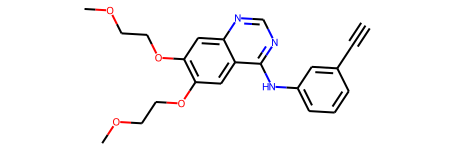

In [ ]:
this_smiles = unique_smiles[0] ## list(df3.iloc[[24]].SMILES)[0]
show_structure(this_smiles, show_smiles =True)

In [ ]:
def atom_features_X2(atom):
    return np.array(one_of_k_encoding_unk_X2(atom.GetSymbol(),['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na','Ca', 'Fe', 'As', 'Al', 'I', 'B', 'V', 'K', 'Tl', 'Yb','Sb', 'Sn', 'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn', 'H','Li', 'Ge', 'Cu', 'Au', 'Ni', 'Cd', 'In', 'Mn', 'Zr','Cr', 'Pt', 'Hg', 'Pb', 'Unknown']) +
                    one_of_k_encoding_X2(atom.GetDegree(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    one_of_k_encoding_unk_X2(atom.GetTotalNumHs(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    one_of_k_encoding_unk_X2(atom.GetImplicitValence(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    [atom.GetIsAromatic()])

def one_of_k_encoding_X2(x, allowable_set):
    if x not in allowable_set:
        raise Exception("input {0} not in allowable set{1}:".format(x, allowable_set))
    return list(map(lambda s: x == s, allowable_set))

def one_of_k_encoding_unk_X2(x, allowable_set):
    """Maps inputs not in the allowable set to the last element."""
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))

def smile_to_graph_X2(smile, do_ECFP, fpl = None):
    mol = Chem.MolFromSmiles(smile)
    
    c_size = mol.GetNumAtoms()
                     
    features = []
    for atom in mol.GetAtoms():
        feature = atom_features_X2(atom)
        if (do_ECFP):
            # print(smile)  # messi
            # this_ecfp = np.array(df5.loc[df5["smiles"] == standardize_smiles(smile)].values.tolist()[0][1:])    

            ecfp6_descriptor = ECFP6([smile])        
            this_ecfp = ecfp6_descriptor.compute_ECFP6(fpl, generate_df=False)[0]
            feature = np.append(feature, this_ecfp, 0)

        # features.append( feature / sum(feature) ) ## Normalise
        features.append(sum(feature)*feature / sum(feature) )
    
    bond_features= []
    edges = []
    for bond in mol.GetBonds():
        edges.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])
        
        this_feat = [0 for q in range(4)]  
        q = ['SINGLE', 'DOUBLE', 'TRIPLE', 'AROMATIC'].index(str(bond.GetBondType()))
        this_feat[q] = 1
        bond_features.append(this_feat)


    g = nx.Graph(edges).to_directed()
    edge_index = []
    for e1, e2 in g.edges:
        edge_index.append([e1, e2])  
    return c_size, features, edge_index, bond_features, g

In [ ]:
csize, feats, edge_i, edge_f, g = smile_to_graph_X2(this_smiles_2, do_ECFP = False, fpl = None)

In [ ]:
edge_f

[[1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1]]

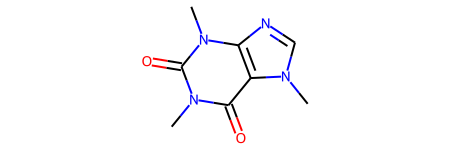

In [ ]:
this_smiles_2 = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
show_structure(this_smiles_2)

```BondDir```

https://www.rdkit.org/docs/cppapi/classRDKit_1_1Bond.html#a9279eea9c460523e13f0f4a9f5fc2dfe

NONE, BEGINWEDGE, BEGINDASH, ENDDOWNRIGHT, ENDUPRIGHT, EITHERDOUBLE, UNKNOWN

```BondStereo```

https://www.rdkit.org/docs/cppapi/classRDKit_1_1Bond.html#ae91dd8e72b495a48f46775c874882165

STEREONONE, STEREOANY, STEREOZ, STEREOE, STEREOCIS, STEREOTRANS

```BondType```

https://www.rdkit.org/docs/cppapi/classRDKit_1_1Bond.html#a2c93af0aeb3297ee77b6afdc27b68d6fad881ede45d3a0957f2fd0613f889c3aa

UNSPECIFIED, SINGLE, DOUBLE, TRIPLE, QUADRUPLE, QUINTUPLE, HEXTUPLE, ONEANDAHALF, TWOANDAHALF, THREEANDAHALF, FOURANDAHALF, FIVEANDAHALF, AROMATIC, IONIC, HYDROGEN, THREECENTER, DATIVEONE, DATIVE, DATIVEL, DATIVER, OTHER, ZERO 

In [ ]:
bond_type_list = "UNSPECIFIED, SINGLE, DOUBLE, TRIPLE, QUADRUPLE, QUINTUPLE, HEXTUPLE, ONEANDAHALF, TWOANDAHALF, THREEANDAHALF, FOURANDAHALF, FIVEANDAHALF, AROMATIC, IONIC, HYDROGEN, THREECENTER, DATIVEONE, DATIVE, DATIVEL, DATIVER, OTHER, ZERO"
bond_type_list = bond_type_list.split(", ")
print(bond_type_list)

['UNSPECIFIED', 'SINGLE', 'DOUBLE', 'TRIPLE', 'QUADRUPLE', 'QUINTUPLE', 'HEXTUPLE', 'ONEANDAHALF', 'TWOANDAHALF', 'THREEANDAHALF', 'FOURANDAHALF', 'FIVEANDAHALF', 'AROMATIC', 'IONIC', 'HYDROGEN', 'THREECENTER', 'DATIVEONE', 'DATIVE', 'DATIVEL', 'DATIVER', 'OTHER', 'ZERO']


In [ ]:
bond_types_used = dict(zip(bond_type_list, [0 for n in range(len(bond_type_list))]))
for sm in unique_smiles:
    mol = Chem.MolFromSmiles(sm)
    for i, b in enumerate(mol.GetBonds()):
        bond_types_used[str(b.GetBondType())] += 1

In [ ]:
all_bdir_list = "NONE, BEGINWEDGE, BEGINDASH, ENDDOWNRIGHT, ENDUPRIGHT, EITHERDOUBLE, UNKNOWN".split(", ")  
all_bstereo_list = "STEREONONE, STEREOANY, STEREOZ, STEREOE, STEREOCIS, STEREOTRANS".split(", ")  
all_btype_list = "UNSPECIFIED, SINGLE, DOUBLE, TRIPLE, QUADRUPLE, QUINTUPLE, HEXTUPLE, ONEANDAHALF, TWOANDAHALF, THREEANDAHALF, FOURANDAHALF, FIVEANDAHALF, AROMATIC, IONIC, HYDROGEN, THREECENTER, DATIVEONE, DATIVE, DATIVEL, DATIVER, OTHER, ZERO".split(", ")

all_bdir_used_dict = dict(zip(all_bdir_list, [0 for n in range(len(all_bdir_list))]))
all_bstereo_used_dict = dict(zip(all_bstereo_list, [0 for n in range(len(all_bstereo_list))]))
all_btype_used_dict = dict(zip(all_btype_list, [0 for n in range(len(all_btype_list))]))
for sm in unique_smiles:
    mol = Chem.MolFromSmiles(sm)
    for i, b in enumerate(mol.GetBonds()):
        all_bdir_used_dict[str(b.GetBondDir())] += 1
        all_bstereo_used_dict[str(b.GetStereo())] += 1
        all_btype_used_dict[str(b.GetBondType())] += 1

In [ ]:
print(all_bdir_used_dict)
print(all_bstereo_used_dict)
print(all_btype_used_dict)

{'NONE': 7802, 'BEGINWEDGE': 0, 'BEGINDASH': 0, 'ENDDOWNRIGHT': 0, 'ENDUPRIGHT': 0, 'EITHERDOUBLE': 0, 'UNKNOWN': 0}
{'STEREONONE': 7802, 'STEREOANY': 0, 'STEREOZ': 0, 'STEREOE': 0, 'STEREOCIS': 0, 'STEREOTRANS': 0}
{'UNSPECIFIED': 0, 'SINGLE': 3616, 'DOUBLE': 480, 'TRIPLE': 18, 'QUADRUPLE': 0, 'QUINTUPLE': 0, 'HEXTUPLE': 0, 'ONEANDAHALF': 0, 'TWOANDAHALF': 0, 'THREEANDAHALF': 0, 'FOURANDAHALF': 0, 'FIVEANDAHALF': 0, 'AROMATIC': 3688, 'IONIC': 0, 'HYDROGEN': 0, 'THREECENTER': 0, 'DATIVEONE': 0, 'DATIVE': 0, 'DATIVEL': 0, 'DATIVER': 0, 'OTHER': 0, 'ZERO': 0}


In [ ]:
[k for k, v in all_btype_used_dict.items() if v>0]

['SINGLE', 'DOUBLE', 'TRIPLE', 'AROMATIC']

In [ ]:
mol = Chem.MolFromSmiles(this_smiles)
for i, b in enumerate(mol.GetBonds()):
    print(b.GetBeginAtomIdx(),b.GetEndAtomIdx(), [b.GetBeginAtomIdx(), b.GetEndAtomIdx()],
          b.GetBondType(),b.GetStereo(), b.GetBondDir()  )

0 1 [0, 1] SINGLE STEREONONE NONE
1 2 [1, 2] SINGLE STEREONONE NONE
2 3 [2, 3] SINGLE STEREONONE NONE
3 4 [3, 4] SINGLE STEREONONE NONE
4 5 [4, 5] SINGLE STEREONONE NONE
5 6 [5, 6] AROMATIC STEREONONE NONE
6 7 [6, 7] AROMATIC STEREONONE NONE
7 8 [7, 8] AROMATIC STEREONONE NONE
8 9 [8, 9] AROMATIC STEREONONE NONE
9 10 [9, 10] AROMATIC STEREONONE NONE
9 11 [9, 11] AROMATIC STEREONONE NONE
11 12 [11, 12] AROMATIC STEREONONE NONE
12 13 [12, 13] AROMATIC STEREONONE NONE
13 14 [13, 14] AROMATIC STEREONONE NONE
11 15 [11, 15] SINGLE STEREONONE NONE
15 16 [15, 16] SINGLE STEREONONE NONE
16 17 [16, 17] AROMATIC STEREONONE NONE
17 18 [17, 18] AROMATIC STEREONONE NONE
18 19 [18, 19] AROMATIC STEREONONE NONE
19 20 [19, 20] AROMATIC STEREONONE NONE
20 21 [20, 21] AROMATIC STEREONONE NONE
20 22 [20, 22] SINGLE STEREONONE NONE
22 23 [22, 23] TRIPLE STEREONONE NONE
6 24 [6, 24] SINGLE STEREONONE NONE
24 25 [24, 25] SINGLE STEREONONE NONE
25 26 [25, 26] SINGLE STEREONONE NONE
26 27 [26, 27] SINGLE STER

In [ ]:
mol = Chem.MolFromSmiles(this_smiles)
for i, b in enumerate(mol.GetBonds()):
    print(b.GetBeginAtomIdx(),b.GetEndAtomIdx(), [b.GetBeginAtomIdx(), b.GetEndAtomIdx()],
          b.GetBondType(),b.GetStereo())

0 1 [0, 1] SINGLE STEREONONE
1 2 [1, 2] SINGLE STEREONONE
2 3 [2, 3] SINGLE STEREONONE
3 4 [3, 4] SINGLE STEREONONE
4 5 [4, 5] SINGLE STEREONONE
5 6 [5, 6] AROMATIC STEREONONE
6 7 [6, 7] AROMATIC STEREONONE
7 8 [7, 8] AROMATIC STEREONONE
8 9 [8, 9] AROMATIC STEREONONE
9 10 [9, 10] AROMATIC STEREONONE
9 11 [9, 11] AROMATIC STEREONONE
11 12 [11, 12] AROMATIC STEREONONE
12 13 [12, 13] AROMATIC STEREONONE
13 14 [13, 14] AROMATIC STEREONONE
11 15 [11, 15] SINGLE STEREONONE
15 16 [15, 16] SINGLE STEREONONE
16 17 [16, 17] AROMATIC STEREONONE
17 18 [17, 18] AROMATIC STEREONONE
18 19 [18, 19] AROMATIC STEREONONE
19 20 [19, 20] AROMATIC STEREONONE
20 21 [20, 21] AROMATIC STEREONONE
20 22 [20, 22] SINGLE STEREONONE
22 23 [22, 23] TRIPLE STEREONONE
6 24 [6, 24] SINGLE STEREONONE
24 25 [24, 25] SINGLE STEREONONE
25 26 [25, 26] SINGLE STEREONONE
26 27 [26, 27] SINGLE STEREONONE
27 28 [27, 28] SINGLE STEREONONE
10 5 [10, 5] AROMATIC STEREONONE
14 8 [14, 8] AROMATIC STEREONONE
21 16 [21, 16] AROMATIC 

In [ ]:
si = Chem.FindPotentialStereo(mol)
for element in si:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor} ')

In [ ]:
m = Chem.MolFromSmiles(sample_smiles)
for x in m.GetAtoms():
    print(x.GetIdx(), x.GetHybridization())

0 SP3
1 SP2
2 SP2
3 SP2
4 SP2
5 SP2
6 SP2
7 SP2
8 SP2
9 SP2
10 SP2
11 SP2
12 SP3
13 SP3


In [ ]:
mol = Chem.MolFromSmiles(this_smiles)
    
c_size = mol.GetNumAtoms()
                     
features = []
for atom in mol.GetAtoms():
    print(atom.GetIdx(), atom.GetHybridization())
    # print(atom.GetBonds())
    # break

0 SP3
1 SP3
2 SP3
3 SP3
4 SP2
5 SP2
6 SP2
7 SP2
8 SP2
9 SP2
10 SP2
11 SP2
12 SP2
13 SP2
14 SP2
15 SP2
16 SP2
17 SP2
18 SP2
19 SP2
20 SP2
21 SP2
22 SP
23 SP
24 SP2
25 SP3
26 SP3
27 SP3
28 SP3


In [ ]:
mol.GetBonds(atom)

ArgumentError: ignored

In [ ]:
csize, feats, edge_i, g = smile_to_graph_X2(this_smiles_2, do_ECFP = False, fpl = None)

In [ ]:
edge_i

[[0, 1],
 [1, 0],
 [1, 2],
 [2, 1],
 [2, 3],
 [3, 2],
 [3, 4],
 [4, 3],
 [4, 5],
 [5, 4],
 [5, 6],
 [5, 10],
 [6, 5],
 [6, 7],
 [6, 24],
 [7, 6],
 [7, 8],
 [8, 7],
 [8, 9],
 [8, 14],
 [9, 8],
 [9, 10],
 [9, 11],
 [10, 9],
 [10, 5],
 [11, 9],
 [11, 12],
 [11, 15],
 [12, 11],
 [12, 13],
 [13, 12],
 [13, 14],
 [14, 13],
 [14, 8],
 [15, 11],
 [15, 16],
 [16, 15],
 [16, 17],
 [16, 21],
 [17, 16],
 [17, 18],
 [18, 17],
 [18, 19],
 [19, 18],
 [19, 20],
 [20, 19],
 [20, 21],
 [20, 22],
 [21, 20],
 [21, 16],
 [22, 20],
 [22, 23],
 [23, 22],
 [24, 6],
 [24, 25],
 [25, 24],
 [25, 26],
 [26, 25],
 [26, 27],
 [27, 26],
 [27, 28],
 [28, 27]]

In [ ]:
csize

29

In [ ]:
len(feats)

29

## Rand Rough 01

In [ ]:
from typing import Callable, Union, Optional
from torch_geometric.typing import OptPairTensor, Adj, OptTensor, Size

import torch
from torch import Tensor
from torch_sparse import SparseTensor, matmul
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.nn.dense.linear import Linear

# from ..inits import reset

class GINEConv(MessagePassing):
    """The modified :class:`GINConv` operator from the `"Strategies for
    Pre-training Graph Neural Networks" <https://arxiv.org/abs/1905.12265>`_
    paper

    .. math::
        \mathbf{x}^{\prime}_i = h_{\mathbf{\Theta}} \left( (1 + \epsilon) \cdot
        \mathbf{x}_i + \sum_{j \in \mathcal{N}(i)} \mathrm{ReLU}
        ( \mathbf{x}_j + \mathbf{e}_{j,i} ) \right)

    that is able to incorporate edge features :math:`\mathbf{e}_{j,i}` into
    the aggregation procedure.

    Args:
        nn (torch.nn.Module): A neural network :math:`h_{\mathbf{\Theta}}` that
            maps node features :obj:`x` of shape :obj:`[-1, in_channels]` to
            shape :obj:`[-1, out_channels]`, *e.g.*, defined by
            :class:`torch.nn.Sequential`.
        eps (float, optional): (Initial) :math:`\epsilon`-value.
            (default: :obj:`0.`)
        train_eps (bool, optional): If set to :obj:`True`, :math:`\epsilon`
            will be a trainable parameter. (default: :obj:`False`)
        edge_dim (int, optional): Edge feature dimensionality. If set to
            :obj:`None`, node and edge feature dimensionality is expected to
            match. Other-wise, edge features are linearly transformed to match
            node feature dimensionality. (default: :obj:`None`)
        **kwargs (optional): Additional arguments of
            :class:`torch_geometric.nn.conv.MessagePassing`.
    """
    def __init__(self, nn: Callable, eps: float = 0., train_eps: bool = False,
                 edge_dim: Optional[int] = None, **kwargs):
        kwargs.setdefault('aggr', 'add')
        super().__init__(**kwargs)
        self.nn = nn
        self.initial_eps = eps
        if train_eps:
            self.eps = torch.nn.Parameter(torch.Tensor([eps]))
        else:
            self.register_buffer('eps', torch.Tensor([eps]))
        if edge_dim is not None:
            if hasattr(self.nn[0], 'in_features'):
                in_channels = self.nn[0].in_features
            else:
                in_channels = self.nn[0].in_channels
            self.lin = Linear(edge_dim, in_channels)
        else:
            self.lin = None
        self.reset_parameters()
    def reset_parameters(self):
        reset(self.nn)
        self.eps.data.fill_(self.initial_eps)
        if self.lin is not None:
            self.lin.reset_parameters()


    def forward(self, x: Union[Tensor, OptPairTensor], edge_index: Adj,
                edge_attr: OptTensor = None, size: Size = None) -> Tensor:
        """"""
        if isinstance(x, Tensor):
            x: OptPairTensor = (x, x)

        # propagate_type: (x: OptPairTensor, edge_attr: OptTensor)
        out = self.propagate(edge_index, x=x, edge_attr=edge_attr, size=size)

        x_r = x[1]
        if x_r is not None:
            out += (1 + self.eps) * x_r

        return self.nn(out)


    def message(self, x_j: Tensor, edge_attr: Tensor) -> Tensor:
        if self.lin is None and x_j.size(-1) != edge_attr.size(-1):
            raise ValueError("Node and edge feature dimensionalities do not "
                             "match. Consider setting the 'edge_dim' "
                             "attribute of 'GINEConv'")

        if self.lin is not None:
            edge_attr = self.lin(edge_attr)

        return (x_j + edge_attr).relu()

    def __repr__(self) -> str:
        return f'{self.__class__.__name__}(nn={self.nn})'


In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

class CustomTextDataset(Dataset):
    def __init__(self, text, labels):
        self.labels = labels
        self.text = text

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        label = self.labels[idx]
        data = self.text[idx]
        sample = {"Text": data, "Class": label}
        return sample

# define data and class labels
text = ['Happy', 'Amazing', 'Sad', 'Unhapy', 'Glum']
labels = ['Positive', 'Positive', 'Negative', 'Negative', 'Negative']

In [ ]:
# create Pandas DataFrame
text_labels_df = pd.DataFrame({'Text': text, 'Labels': labels})
text_labels_df 

Text    Labels
0    Happy  Positive
1  Amazing  Positive
2      Sad  Negative
3   Unhapy  Negative
4     Glum  Negative

In [ ]:
text_labels_df['Text']

0      Happy
1    Amazing
2        Sad
3     Unhapy
4       Glum
Name: Text, dtype: object

In [ ]:
# define data set object
TD = CustomTextDataset(text_labels_df['Text'], text_labels_df['Labels'])
TD

In [ ]:
# Display image and label.
print('\nFirst iteration of data set: ', next(iter(TD)), '\n')


First iteration of data set:  {'Text': 'Happy', 'Class': 'Positive'} 



In [ ]:
# Print how many items are in the data set
print('Length of data set: ', len(TD), '\n')

Length of data set:  5 



In [ ]:
# Print entire data set
print('Entire data set: ', list(DataLoader(TD)), '\n')

Entire data set:  [{'Text': ['Happy'], 'Class': ['Positive']}, {'Text': ['Amazing'], 'Class': ['Positive']}, {'Text': ['Sad'], 'Class': ['Negative']}, {'Text': ['Unhapy'], 'Class': ['Negative']}, {'Text': ['Glum'], 'Class': ['Negative']}] 



In [ ]:
# collate_fn
def collate_batch(batch):
    word_tensor = torch.tensor([[1.], [0.], [45.]])
    label_tensor = torch.tensor([[1.]])                                                  
    text_list, classes = [], []
    for (_text, _class) in batch:
        text_list.append(word_tensor)
        classes.append(label_tensor)
    text = torch.cat(text_list)
    classes = torch.tensor(classes)

    return text, classes

In [ ]:
# create DataLoader object of DataSet object
bat_size = 1
DL_DS = DataLoader(TD, batch_size=bat_size, shuffle=True)

In [ ]:
DL_DS

In [ ]:
# loop through each batch in the DataLoader object
for (idx, batch) in enumerate(DL_DS):

    # Print the 'text' data of the batch
    print(idx, 'Text data: ', batch, '\n')

    # Print the 'class' data of batch
    print(idx, 'Class data: ', batch, '\n')

0 Text data:  {'Text': ['Sad'], 'Class': ['Negative']} 

0 Class data:  {'Text': ['Sad'], 'Class': ['Negative']} 

1 Text data:  {'Text': ['Unhapy'], 'Class': ['Negative']} 

1 Class data:  {'Text': ['Unhapy'], 'Class': ['Negative']} 

2 Text data:  {'Text': ['Amazing'], 'Class': ['Positive']} 

2 Class data:  {'Text': ['Amazing'], 'Class': ['Positive']} 

3 Text data:  {'Text': ['Happy'], 'Class': ['Positive']} 

3 Class data:  {'Text': ['Happy'], 'Class': ['Positive']} 

4 Text data:  {'Text': ['Glum'], 'Class': ['Negative']} 

4 Class data:  {'Text': ['Glum'], 'Class': ['Negative']} 



In [ ]:
DL_DS

In [ ]:
<torch_geometric.loader.dataloader.DataLoader at 0x7ff72ce7a090>


In [ ]:
 next(iter(DL_DS)) 

{'Class': ['Negative'], 'Text': ['Sad']}

In [ ]:
get_ecfp_sparsity(unique_smiles_union, 100)

53.01

In [ ]:
br_fol_X = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_015"
dataset_X = 'GDSC'
train_data_X = TestbedDataset(root=br_fol_X, dataset=dataset_X+'_train_mix')
train_loader_X = DataLoader(train_data_X, batch_size=train_batch, shuffle=True)

device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
print(device)

GCNNet_X = GCNNet

model_X = GCNNet_X().to(device)
optimizer_X = torch.optim.Adam(model_X.parameters(), lr=lr)
epoch_X = 0
log_interval_X = 20


train_loss = train(model_X, device, train_loader_X, optimizer_X, epoch_X+1, log_interval = log_interval_X)

Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_015/processed/GDSC_train_mix.pt, loading ...


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


cuda:0
Training on 152839 samples...
type(data) = <class 'torch_geometric.data.batch.DataBatch'>
len(data) = 7
Train epoch: 1 [0/152839 (0%)]	Loss: 0.008591
type(data) = <class 'torch_geometric.data.batch.DataBatch'>
len(data) = 7
type(data) = <class 'torch_geometric.data.batch.DataBatch'>
len(data) = 7
type(data) = <class 'torch_geometric.data.batch.DataBatch'>
len(data) = 7
type(data) = <class 'torch_geometric.data.batch.DataBatch'>
len(data) = 7
type(data) = <class 'torch_geometric.data.batch.DataBatch'>
len(data) = 7
type(data) = <class 'torch_geometric.data.batch.DataBatch'>
len(data) = 7
type(data) = <class 'torch_geometric.data.batch.DataBatch'>
len(data) = 7
type(data) = <class 'torch_geometric.data.batch.DataBatch'>
len(data) = 7
type(data) = <class 'torch_geometric.data.batch.DataBatch'>
len(data) = 7
type(data) = <class 'torch_geometric.data.batch.DataBatch'>
len(data) = 7
type(data) = <class 'torch_geometric.data.batch.DataBatch'>
len(data) = 7
type(data) = <class 'torch_ge

KeyboardInterrupt: ignored

In [ ]:
print(this_smiles)
print()
# Test in a kinase inhibitor
mol = Chem.MolFromSmiles(this_smiles)
# mol.GetNumAtoms()
unique_atoms = [atom.GetSymbol() for atom in mol.GetAtoms()]

unique_smiles = list(dict.fromkeys(unique_atoms))
unique_smiles

CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9C7C(C=CC9)(C(C(C8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O



['C', 'N', 'O']

In [ ]:
unique_smiles = list(dict.fromkeys(list(df3.SMILES)))

unique_atoms = []
for sm in unique_smiles:
  mol = Chem.MolFromSmiles(sm)
  all_atoms = [atom.GetSymbol() for atom in mol.GetAtoms()]
  this_unique_atoms = list(dict.fromkeys(all_atoms))
  unique_atoms.extend(this_unique_atoms)
  unique_atoms = list(dict.fromkeys(unique_atoms))

In [ ]:
print(len(unique_atoms))
print(unique_atoms) # fact2

11
['C', 'O', 'N', 'Cl', 'Pt', 'F', 'S', 'I', 'B', 'P', 'Br']


In [ ]:
print(len(unique_drug_id))
print(len(unique_drug_name))
print(len(unique_smiles))

169
164
164


In [ ]:
ele_list = ['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na','Ca', 'Fe', 'As', 'Al', 'I', 'B', 'V', 'K', 'Tl', 'Yb','Sb', 'Sn', 'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn', 'H','Li', 'Ge', 'Cu', 'Au', 'Ni', 'Cd', 'In', 'Mn', 'Zr','Cr', 'Pt', 'Hg', 'Pb', 'Unknown']

In [ ]:
unique_smiles = list(dict.fromkeys(list(df3.SMILES)))

unique_degree = []
for sm in unique_smiles:
  mol = Chem.MolFromSmiles(sm)
  all_degree= [atom.GetDegree() for atom in mol.GetAtoms()]
  this_unique_degree = list(dict.fromkeys(all_degree))
  unique_degree.extend(this_unique_degree)
  unique_degree = list(dict.fromkeys(unique_degree))

In [ ]:
unique_degree

[1, 2, 4, 3, 0]

In [ ]:
unique_smiles = list(dict.fromkeys(list(df3.SMILES)))

unique_hydrogens = []
for sm in unique_smiles:
  mol = Chem.MolFromSmiles(sm)
  all_feat= [atom.GetTotalNumHs() for atom in mol.GetAtoms()]
  this_unique_feat = list(dict.fromkeys(all_feat))
  unique_hydrogens.extend(this_unique_feat)
  unique_hydrogens = list(dict.fromkeys(unique_hydrogens))
print(unique_hydrogens)

[3, 2, 0, 1]


In [ ]:
unique_smiles = list(dict.fromkeys(list(df3.SMILES))) 

unique_valence = []
for sm in unique_smiles:
  mol = Chem.MolFromSmiles(sm)
  all_feat= [atom.GetImplicitValence() for atom in mol.GetAtoms()]
  this_unique_feat = list(dict.fromkeys(all_feat))
  unique_valence.extend(this_unique_feat)
  unique_valence = list(dict.fromkeys(unique_valence))
print(unique_valence)

[3, 2, 0, 1]


In [ ]:
unique_smiles = list(dict.fromkeys(list(df3.SMILES))) 

unique_Aromatic = []
for sm in unique_smiles:
  mol = Chem.MolFromSmiles(sm)
  all_feat= [atom.GetIsAromatic() for atom in mol.GetAtoms()]
  this_unique_feat = list(dict.fromkeys(all_feat))
  unique_Aromatic.extend(this_unique_feat)
  unique_Aromatic = list(dict.fromkeys(unique_Aromatic))
print(unique_Aromatic)

[False, True]


In [ ]:
eq = 0
nq = 0 
nq_smiles = {}
for sm in unique_smiles:
  mol = Chem.MolFromSmiles(sm)
  for atom in mol.GetAtoms():
    if (atom.GetTotalNumHs() == atom.GetImplicitValence()):
      eq += 1
    else:
      if (sm not in nq_smiles):
        nq_smiles[sm] = []
        nq_smiles[sm].append((atom.GetSymbol(), atom.GetTotalNumHs(), atom.GetImplicitValence()))
      else:
        nq_smiles[sm].append((atom.GetSymbol(), atom.GetTotalNumHs(), atom.GetImplicitValence()))
      nq += 1
    # print()
    # print(f"atom.atom.GetTotalNumHs() = {atom.GetTotalNumHs()}")
    # print(f"atom.GetImplicitValence() = {atom.GetImplicitValence()}")

In [ ]:
print(f"nq = {nq}")
print(f"eq = {eq}")
print(f"nq% = {round(100*nq/(nq+eq),2)}")
print(f"len(nq_smiles) = {len(nq_smiles)}")
print(f"nq_smiles = {nq_smiles}")

nq = 35
eq = 5164
nq% = 0.67
len(nq_smiles) = 33
nq_smiles = {'CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9C7C(C=CC9)(C(C(C8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O': [('N', 1, 0)], 'C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC(=O)C5=CC=CC=C54)F': [('N', 1, 0)], 'CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=CC=CC=N4': [('N', 1, 0)], 'CCCS(=O)(=O)NC1=C(C(=C(C=C1)F)C(=O)C2=CNC3=C2C=C(C=N3)Cl)F': [('N', 1, 0)], 'C1=CC=C(C(=C1)C2=CC3=C(C4=C(N3)C=CC(=C4)O)C5=C2C(=O)NC5=O)Cl': [('N', 1, 0)], 'C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=NNC5=O)C6=CC=CC=C6)N.Cl.Cl': [('N', 1, 0)], 'CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=C5C=NNC5=CC=C4)N6CCOCC6': [('N', 1, 0)], 'CC1=CC(=C(N1)C=C2C(=CC(=C3C=C4C=CC=CC4=N3)N2)OC)C': [('N', 1, 0), ('N', 1, 0)], 'C1=C(C(=O)NC(=O)N1)F': [('N', 1, 0), ('N', 1, 0)], 'CC1=CC(=NN1)NC2=CC(=NC(=N2)SC3=CC=C(C=C3)NC(=O)C4CC4)N5CCN(CC5)C': [('N', 1, 0)], 'CCC1=CN=CN=C1N2CCN(CC2)CC3=NC4=C(N3)C=C(C=C4)C(F)(F)F': [('N', 1, 0)], 'CC1=NC(=CC=C1)C2=C(N=C

In [ ]:
round(100*len(nq_smiles)/len(unique_smiles), 2)

20.12

In [ ]:
100 - 20.12

79.88

Smiles : C1=CC=C(C(=C1)C2=CC3=C(C4=C(N3)C=CC(=C4)O)C5=C2C(=O)NC5=O)Cl


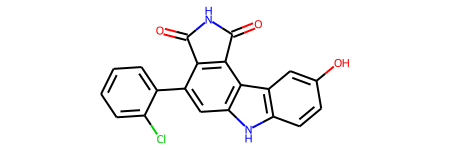

In [ ]:
show_structure("C1=CC=C(C(=C1)C2=CC3=C(C4=C(N3)C=CC(=C4)O)C5=C2C(=O)NC5=O)Cl", True)

[('N', 1, 0)]
Smiles : CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9C7C(C=CC9)(C(C(C8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O


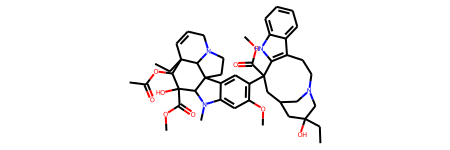

In [ ]:
this_sm = list(nq_smiles.keys())[0]
print(nq_smiles[this_sm])
show_structure(this_sm, True)

[('N', 1, 0)]
Smiles : C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC(=O)C5=CC=CC=C54)F


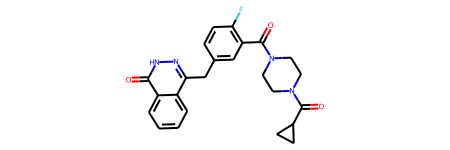

In [ ]:
this_sm = list(nq_smiles.keys())[1]
print(nq_smiles[this_sm])
show_structure(this_sm, True)

[('N', 1, 0)]
Smiles : CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=CC=CC=N4


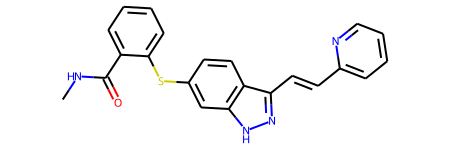

In [ ]:
this_sm = list(nq_smiles.keys())[2]
print(nq_smiles[this_sm])
show_structure(this_sm, True)

[('N', 1, 0), ('N', 1, 0)]
Smiles : C1=C(C(=O)NC(=O)N1)F


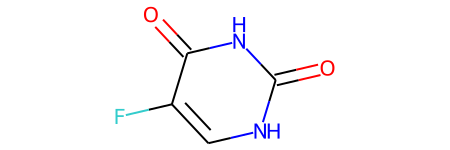

In [ ]:
this_sm = "C1=C(C(=O)NC(=O)N1)F"
print(nq_smiles[this_sm])
show_structure(this_sm, True)

In [ ]:
# for sm in unique_smiles:
this_sm = "C1=C(C(=O)NC(=O)N1)F"
print(this_sm)
mol = Chem.MolFromSmiles(this_sm)
all_feat= [(atom.GetSymbol(), atom.GetDegree(), atom.GetTotalNumHs(), atom.GetImplicitValence()) for atom in mol.GetAtoms()]
for tup in all_feat:
  print(tup)

this_sm = "CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=CC=CC=N4"
print(this_sm)
mol = Chem.MolFromSmiles(this_sm)
all_feat= [(atom.GetSymbol(), atom.GetDegree(), atom.GetTotalNumHs(), atom.GetImplicitValence()) for atom in mol.GetAtoms()]
for tup in all_feat:
  print(tup)

C1=C(C(=O)NC(=O)N1)F
('C', 2, 1, 1)
('C', 3, 0, 0)
('C', 3, 0, 0)
('O', 1, 0, 0)
('N', 2, 1, 0)
('C', 3, 0, 0)
('O', 1, 0, 0)
('N', 2, 1, 0)
('F', 1, 0, 0)
CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=CC=CC=N4
('C', 1, 3, 3)
('N', 2, 1, 1)
('C', 3, 0, 0)
('O', 1, 0, 0)
('C', 3, 0, 0)
('C', 2, 1, 1)
('C', 2, 1, 1)
('C', 2, 1, 1)
('C', 2, 1, 1)
('C', 3, 0, 0)
('S', 2, 0, 0)
('C', 3, 0, 0)
('C', 2, 1, 1)
('C', 3, 0, 0)
('C', 3, 0, 0)
('C', 2, 1, 1)
('C', 2, 1, 1)
('C', 3, 0, 0)
('N', 2, 0, 0)
('N', 2, 1, 0)
('C', 2, 1, 1)
('C', 2, 1, 1)
('C', 3, 0, 0)
('C', 2, 1, 1)
('C', 2, 1, 1)
('C', 2, 1, 1)
('C', 2, 1, 1)
('N', 2, 0, 0)


In [ ]:
nq_smiles

{'C1=C(C(=O)NC(=O)N1)F': [('N', 1, 0), ('N', 1, 0)],
 'C1=CC=C(C(=C1)C2=CC3=C(C4=C(N3)C=CC(=C4)O)C5=C2C(=O)NC5=O)Cl': [('N', 1, 0)],
 'C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=NNC5=O)C6=CC=CC=C6)N.Cl.Cl': [('N',
   1,
   0)],
 'C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC(=O)C5=CC=CC=C54)F': [('N',
   1,
   0)],
 'C1CCC(C1)C(CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3': [('N', 1, 0)],
 'C1CN(CC1C(=O)NC2=CC3=C(C=C2)NN=C3C4=CC=NC=C4)CC(=O)N5CCN(CC5)C6=CC=C(C=C6)C7=NC=CC=N7': [('N',
   1,
   0)],
 'C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=NC4=C3C=CN4': [('N', 1, 0)],
 'C1COCCN1C2=CC=C(C=C2)NC3=NC(=CN4C3=NC=C4)C5=CC6=C(C=C5)C=NN6': [('N', 1, 0)],
 'C1CSCC2=C1NC(=NC2=O)C3=CC=C(C=C3)C(F)(F)F': [('N', 1, 0)],
 'CC(C)N(CC1C(C(C(O1)N2C=NC3=C(N=CN=C32)N)O)O)C4CC(C4)CCC5=NC6=C(N5)C=C(C=C6)C(C)(C)C': [('N',
   1,
   0)],
 'CC(C)NC1=NC=C(C(=C1)C2=CNC(=C2)C(=O)NC(CO)C3=CC(=CC=C3)Cl)Cl': [('N', 1, 0)],
 'CC(C1=C(N=C2C=C(C=CC2=C1)F)C3=CC=CC=N3)NC4=NC=NC5=C4NC=N5': [('N', 1, 0)],
 'CC1(CCC(=C(C1)C2=CC

In [ ]:
len(ele_list)

44

In [ ]:
unique_smiles = list(dict.fromkeys(list(df3.SMILES)))

In [ ]:
print(unique_smiles)

['CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3=C2)O', 'CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9C7C(C=CC9)(C(C(C8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O', 'N.N.[Cl-].[Cl-].[Pt+2]', 'C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O', 'CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)C(C(C5=CC=CC=C5)NC(=O)OC(C)(C)C)O)O)OC(=O)C6=CC=CC=C6)(CO4)OC(=O)C)O)C)O', 'COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4', 'CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(=O)(=O)C4=CC(=C(C=C4)NC(CCN5CCOCC5)CSC6=CC=CC=C6)S(=O)(=O)C(F)(F)F)C7=CC=C(C=C7)Cl)C', 'C1=CC=C(C=C1)NC(=O)CCCCCCC(=O)NO', 'CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3C=C(N=C3)C)NC4=NC=CC(=N4)C5=CN=CC=C5', 'C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC(=O)C5=CC=CC=C54)F', 'CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=CC=CC=N4', 'C1CC(CNC1)NC(=O)C2=C(C=C(S2)C3=CC(=CC=C3)F)NC(=O)N', 'CN1C=C(C2=CC=CC=C21)C3=C(C(=O)NC3=O)C4=C(C=C(C=C4)Cl)Cl', 'C1COCCN1C2=CC(=O)C=C(O2)C3=C4C(=CC=C3)SC5=CC=CC=C5S4', 'CN(C)CC=CC(=O)NC1=C(C=C2

In [ ]:
train_data_X = TestbedDataset(root=branch_folder, dataset=dataset_X+'_train_mix')               # zxc

Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_004/processed/GDSC_train_mix.pt, loading ...


In [ ]:
train_batch_X = 1024
train_loader_X = DataLoader(train_data_X, batch_size=train_batch_X, shuffle=True)

In [ ]:
for batch_idx_X, data_X in enumerate(train_loader_X):
  first_batch = data_X
  break

In [ ]:
first_batch

Batch(batch=[32467], c_size=[1024], edge_index=[2, 71154], ptr=[1025], target=[1024, 735], x=[32467, 78], y=[1024])

In [ ]:
x_X, edge_index_X, batch_X = first_batch.x, first_batch.edge_index, first_batch.batch
# get protein input
target_XX = first_batch.target

In [ ]:
print(f"x_X.shape = {x_X.shape}")
print(f"edge_index_X.shape = {edge_index_X.shape}")
print(f"batch_X.shape = {batch_X.shape}")

x_X.shape = torch.Size([32467, 78])
edge_index_X.shape = torch.Size([2, 71154])
batch_X.shape = torch.Size([32467])


In [ ]:
x_X

tensor([[0.2500, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.2000],
        [0.0000, 0.2000, 0.0000,  ..., 0.0000, 0.0000, 0.2000],
        ...,
        [0.2000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.2000],
        [0.2000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.2000],
        [0.0000, 0.2500, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [ ]:
edge_index_X

tensor([[    0,     1,     1,  ..., 32465, 32465, 32466],
        [    1,     0,     2,  ..., 32457, 32460, 32455]])

In [ ]:
target_XX = target_XX[:,None,:]


In [ ]:
target_XX.shape

torch.Size([1024, 735])

In [ ]:
first_batch.y.view(-1, 1).float().shape

torch.Size([1024, 1])

In [ ]:


for batch_idx, data in enumerate(train_loader):
    data = data.to(device)
    optimizer.zero_grad()
    output, _ = model(data)
    loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
    loss.backward()
    optimizer.step()
    avg_loss.append(loss.item())
    if batch_idx % log_interval == 0:
        print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                        batch_idx * len(data.x),
                                                                        len(train_loader.dataset),
                                                                        100. * batch_idx / len(train_loader),
                                                                        loss.item()))

In [ ]:
dataset_X = "GDSC"  

In [ ]:
train_data_X = TestbedDataset(root=root_folder+"root_001", dataset=dataset_X+'_train_mix')

Pre-processed data found: gdrive/MyDrive/FYP/Data/DRP/root_folder/root_001/processed/GDSC_train_mix.pt, loading ...


In [ ]:
ls gdrive/MyDrive/FYP/Data/DRP/root_folder/root_001/processed/GDSC_train_mix.pt

GDSC_train_mix.pt


In [ ]:
# os. getcwd()
root_folder

'gdrive/MyDrive/FYP/Data/DRP/root_folder/'

In [ ]:
os.path.isfile(root_folder+"root_001/processed/GDSC_train_mix.pt")

True

In [ ]:
import argparse
parser = argparse.ArgumentParser(description='train model')
# parser.add_argument('--model', type=int, required=False, default=0,     help='0: GINConvNet, 1: GATNet, 2: GAT_GCN, 3: GCNNet')
# parser.add_argument('--train_batch', type=int, required=False, default=1024,  help='Batch size training set')
# parser.add_argument('--val_batch', type=int, required=False, default=1024, help='Batch size validation set')
# parser.add_argument('--test_batch', type=int, required=False, default=1024, help='Batch size test set')
# parser.add_argument('--lr', type=float, required=False, default=1e-4, help='Learning rate')
# parser.add_argument('--num_epoch', type=int, required=False, default=300, help='Number of epoch')
# parser.add_argument('--log_interval', type=int, required=False, default=20, help='Log interval')
# parser.add_argument('--cuda_name', type=str, required=False, default="cuda:0", help='Cuda')

args = parser.parse_args()

usage: ipykernel_launcher.py [-h]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-b4fc9f7a-8d3b-40c8-b49f-11c0fc7accc9.json


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Smiles : CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9C7C(C=CC9)(C(C(C8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O


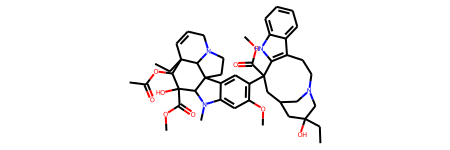

In [ ]:
this_smiles = "CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9C7C(C=CC9)(C(C(C8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O" 
show_structure(this_smiles, show_smiles =True)

In [ ]:
df3.loc[df3["SMILES"] == this_smiles].head()

Drug name  ...                                             SMILES
808  Vinblastine  ...  CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...
809  Vinblastine  ...  CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...
810  Vinblastine  ...  CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...
811  Vinblastine  ...  CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...
812  Vinblastine  ...  CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...

[5 rows x 14 columns]

In [ ]:
c_size_X, features_X, edge_index_X, g_X = smile_to_graph(smile = "CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9C7C(C=CC9)(C(C(C8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O")

In [ ]:
# print(features_X)
c_size_X  ## rid_00

59

In [ ]:
features_X2 = torch.Tensor(features_X)
print(features_X2.shape)
features_X2   

torch.Size([59, 78])


tensor([[0.2500, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.2500, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.2500, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
        [0.2500, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2500,  ..., 0.0000, 0.0000, 0.0000]])

In [ ]:
features_X2[:,44:55]

tensor([[0.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.2500, 0.00

In [ ]:
print(len(edge_index_X))

134


In [ ]:
print(edge_index_X)

[[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [2, 58], [2, 13], [3, 2], [3, 4], [4, 3], [4, 5], [4, 12], [5, 4], [5, 6], [6, 5], [6, 7], [6, 21], [6, 54], [7, 6], [7, 8], [7, 20], [8, 7], [8, 9], [8, 14], [9, 8], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [11, 13], [12, 11], [12, 4], [13, 11], [13, 2], [14, 8], [14, 15], [14, 19], [15, 14], [15, 16], [16, 15], [16, 17], [17, 16], [17, 18], [18, 17], [18, 19], [19, 18], [19, 20], [19, 14], [20, 19], [20, 7], [21, 6], [21, 22], [21, 26], [22, 21], [22, 23], [22, 52], [23, 22], [23, 24], [24, 23], [24, 25], [24, 39], [25, 24], [25, 26], [25, 27], [26, 25], [26, 21], [27, 25], [27, 28], [27, 31], [27, 38], [28, 27], [28, 29], [29, 28], [29, 30], [30, 29], [30, 31], [30, 35], [31, 30], [31, 32], [31, 27], [32, 31], [32, 33], [32, 36], [32, 50], [33, 32], [33, 34], [34, 33], [34, 35], [35, 34], [35, 30], [36, 32], [36, 37], [36, 46], [37, 36], [37, 38], [37, 41], [37, 45], [38, 37], [38, 39], [38, 27], [39, 38], [39, 40], [39, 24], [40, 39],

In [ ]:
edge_index_X2 = torch.LongTensor(edge_index_X).transpose(1, 0)
edge_index_X2

tensor([[ 0,  1,  1,  2,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,  6,  6,
          7,  7,  7,  8,  8,  8,  9,  9, 10, 10, 11, 11, 11, 12, 12, 13, 13, 14,
         14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21, 21, 21,
         22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27, 27, 27, 28,
         28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 32, 33, 33, 34, 34, 35,
         35, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 41, 41, 41,
         42, 43, 43, 44, 45, 46, 46, 47, 47, 47, 48, 49, 50, 50, 51, 52, 52, 53,
         54, 54, 54, 55, 56, 56, 57, 58],
        [ 1,  0,  2,  1,  3, 58, 13,  2,  4,  3,  5, 12,  4,  6,  5,  7, 21, 54,
          6,  8, 20,  7,  9, 14,  8, 10,  9, 11, 10, 12, 13, 11,  4, 11,  2,  8,
         15, 19, 14, 16, 15, 17, 16, 18, 17, 19, 18, 20, 14, 19,  7,  6, 22, 26,
         21, 23, 52, 22, 24, 23, 25, 39, 24, 26, 27, 25, 21, 25, 28, 31, 38, 27,
         29, 28, 30, 29, 31, 35, 30, 32, 27, 31, 33, 36, 50, 32, 34

In [ ]:
edge_index_X2 = torch.LongTensor(edge_index_X).transpose(1, 0)
edge_index_X2

tensor([[ 0,  1,  1,  2,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,  6,  6,
          7,  7,  7,  8,  8,  8,  9,  9, 10, 10, 11, 11, 11, 12, 12, 13, 13, 14,
         14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21, 21, 21,
         22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27, 27, 27, 28,
         28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 32, 33, 33, 34, 34, 35,
         35, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 41, 41, 41,
         42, 43, 43, 44, 45, 46, 46, 47, 47, 47, 48, 49, 50, 50, 51, 52, 52, 53,
         54, 54, 54, 55, 56, 56, 57, 58],
        [ 1,  0,  2,  1,  3, 58, 13,  2,  4,  3,  5, 12,  4,  6,  5,  7, 21, 54,
          6,  8, 20,  7,  9, 14,  8, 10,  9, 11, 10, 12, 13, 11,  4, 11,  2,  8,
         15, 19, 14, 16, 15, 17, 16, 18, 17, 19, 18, 20, 14, 19,  7,  6, 22, 26,
         21, 23, 52, 22, 24, 23, 25, 39, 24, 26, 27, 25, 21, 25, 28, 31, 38, 27,
         29, 28, 30, 29, 31, 35, 30, 32, 27, 31, 33, 36, 50, 32, 34

In [ ]:
edge_index_X_tensor = torch.tensor(edge_index_X, dtype=torch.long)

edge_index_X3 = edge_index_X_tensor.t().contiguous()
edge_index_X3     ## rid_01

tensor([[ 0,  1,  1,  2,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,  6,  6,
          7,  7,  7,  8,  8,  8,  9,  9, 10, 10, 11, 11, 11, 12, 12, 13, 13, 14,
         14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21, 21, 21,
         22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27, 27, 27, 28,
         28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 32, 33, 33, 34, 34, 35,
         35, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 41, 41, 41,
         42, 43, 43, 44, 45, 46, 46, 47, 47, 47, 48, 49, 50, 50, 51, 52, 52, 53,
         54, 54, 54, 55, 56, 56, 57, 58],
        [ 1,  0,  2,  1,  3, 58, 13,  2,  4,  3,  5, 12,  4,  6,  5,  7, 21, 54,
          6,  8, 20,  7,  9, 14,  8, 10,  9, 11, 10, 12, 13, 11,  4, 11,  2,  8,
         15, 19, 14, 16, 15, 17, 16, 18, 17, 19, 18, 20, 14, 19,  7,  6, 22, 26,
         21, 23, 52, 22, 24, 23, 25, 39, 24, 26, 27, 25, 21, 25, 28, 31, 38, 27,
         29, 28, 30, 29, 31, 35, 30, 32, 27, 31, 33, 36, 50, 32, 34

In [ ]:
edge_index_X3.s

torch.Size([2, 134])

In [ ]:
print(f"type(y_X) = {type(y_X)}")
print(f"len(y_X) = {len(y_X)}")
print(f"y_X = {y_X}")

type(y_X) = <class 'numpy.ndarray'>
len(y_X) = 191049
y_X = [0.57421168 0.60842187 0.61847211 ... 0.56279318 0.6230961  0.50208498]


In [ ]:
labels_X = y_X[0]
labels_X = torch.FloatTensor([labels_X]) ## rid_02 
labels_X

tensor([0.5742])

In [ ]:
a=1/0
GCNData = DATA.Data(x=torch.Tensor(features),                                       
                    edge_index=torch.LongTensor(edge_index).transpose(1, 0),        
                    y=torch.FloatTensor([labels]))                                  

# require_grad of cell-line for saliency map
if self.saliency_map == True:
    GCNData.target = torch.tensor([target], dtype=torch.float, requires_grad=True)
else:
    GCNData.target = torch.FloatTensor([target])


target = xt[i]  xc_X

In [ ]:
GCNData = DATA.Data(x=torch.Tensor(features_X2),                                       
                    edge_index=torch.LongTensor(edge_index_X2).transpose(1, 0),        
                    y=torch.FloatTensor([labels_X]))    

In [ ]:
target_X=xc_X[0]
# target_X

In [ ]:
GCNData.target = torch.FloatTensor([target_X])    ## rid_03
GCNData.anyname = torch.FloatTensor([target_X])

In [ ]:
root_folder  ## xd_X, xc_X, y_X xd, xc, y 

'gdrive/MyDrive/FYP/Data/DRP/root_folder/'

In [ ]:
# xd, xc, y = np.asarray(xd), np.asarray(xc), np.asarray(y)

size_X = int(xd_X.shape[0] * 0.8)
size1_X = int(xd_X.shape[0] * 0.9)

# with open('list_drug_mix_test', 'wb') as fp:
#     pickle.dump(lst_drug[size1:], fp)
    
# with open('list_cell_mix_test', 'wb') as fp:
#     pickle.dump(lst_cell[size1:], fp)

## Train, Test, Validation split
xd_train_X = xd_X[:size_X]
xd_val_X = xd_X[size_X:size1_X]
xd_test_X = xd_X[size1_X:]

xc_train_X = xc_X[:size_X]
xc_val_X = xc_X[size_X:size1_X]
xc_test_X = xc_X[size1_X:]

y_train_X = y_X[:size_X]
y_val_X = y_X[size_X:size1_X]
y_test_X = y_X[size1_X:]

dataset_X = 'GDSC'
print('preparing ', dataset_X + '_train.pt in pytorch format!')                        

train_data = TestbedDataset(root='gdrive/MyDrive/FYP/Data/DRP/root_folder/root_002', dataset=dataset_X+'_train_mix', xd=xd_train_X, xt=xc_train_X, y=y_train_X, smile_graph=smile_graph_X)
val_data = TestbedDataset(root='gdrive/MyDrive/FYP/Data/DRP/root_folder/root_002', dataset=dataset_X+'_val_mix', xd=xd_val_X, xt=xc_val_X, y=y_val_X, smile_graph=smile_graph_X)
test_data = TestbedDataset(root='gdrive/MyDrive/FYP/Data/DRP/root_folder/root_002', dataset=dataset_X+'_test_mix', xd=xd_test_X, xt=xc_test_X, y=y_test_X, smile_graph=smile_graph_X)

Streaming output truncated to the last 5000 lines.
Converting SMILES to graph: 147841/152839
Converting SMILES to graph: 147842/152839
Converting SMILES to graph: 147843/152839
Converting SMILES to graph: 147844/152839
Converting SMILES to graph: 147845/152839
Converting SMILES to graph: 147846/152839
Converting SMILES to graph: 147847/152839
Converting SMILES to graph: 147848/152839
Converting SMILES to graph: 147849/152839
Converting SMILES to graph: 147850/152839
Converting SMILES to graph: 147851/152839
Converting SMILES to graph: 147852/152839
Converting SMILES to graph: 147853/152839
Converting SMILES to graph: 147854/152839
Converting SMILES to graph: 147855/152839
Converting SMILES to graph: 147856/152839
Converting SMILES to graph: 147857/152839
Converting SMILES to graph: 147858/152839
Converting SMILES to graph: 147859/152839
Converting SMILES to graph: 147860/152839
Converting SMILES to graph: 147861/152839
Converting SMILES to graph: 147862/152839
Converting SMILES to grap

In [ ]:
train_data_X = TestbedDataset(root='gdrive/MyDrive/FYP/Data/DRP/root_folder/root_001', dataset="GDSC"+'_train_mix', xd=xd_X, xt=xc_X, y=y_X, smile_graph=smile_graph_X)   ## poi

Streaming output truncated to the last 5000 lines.
Converting SMILES to graph: 186051/191049
Converting SMILES to graph: 186052/191049
Converting SMILES to graph: 186053/191049
Converting SMILES to graph: 186054/191049
Converting SMILES to graph: 186055/191049
Converting SMILES to graph: 186056/191049
Converting SMILES to graph: 186057/191049
Converting SMILES to graph: 186058/191049
Converting SMILES to graph: 186059/191049
Converting SMILES to graph: 186060/191049
Converting SMILES to graph: 186061/191049
Converting SMILES to graph: 186062/191049
Converting SMILES to graph: 186063/191049
Converting SMILES to graph: 186064/191049
Converting SMILES to graph: 186065/191049
Converting SMILES to graph: 186066/191049
Converting SMILES to graph: 186067/191049
Converting SMILES to graph: 186068/191049
Converting SMILES to graph: 186069/191049
Converting SMILES to graph: 186070/191049
Converting SMILES to graph: 186071/191049
Converting SMILES to graph: 186072/191049
Converting SMILES to grap

In [ ]:
def save_mix_drug_cell_matrix_X():
    f = open(folder + "PANCANCER_IC.csv")
    reader = csv.reader(f)
    next(reader)

    cell_dict, cell_feature = save_cell_mut_matrix()
    drug_dict, drug_smile, smile_graph = load_drug_smile()

    temp_data = []
    bExist = np.zeros((len(drug_dict), len(cell_dict)))

    for item in reader:
        drug = item[0]    ## Drug name
        cell = item[3]    ## Cosmic sample Id
        ic50 = item[8]    ## IC50
        ic50 = 1 / (1 + pow(math.exp(float(ic50)), -0.1))
        temp_data.append((drug, cell, ic50))

    xd = []
    xc = []
    y = []
    lst_drug = []
    lst_cell = []   
    random.shuffle(temp_data)
    for data in temp_data:
        drug, cell, ic50 = data
        if drug in drug_dict and cell in cell_dict:
            xd.append(drug_smile[drug_dict[drug]])        ## appending the smile of the drug into list xd
            xc.append(cell_feature[cell_dict[cell]])      ## appending numpy array of shape (len(mut_dict),) ie. (735,) to list xc
            y.append(ic50)                                ## appending (int) ic50 value of that smile to list y
            bExist[drug_dict[drug], cell_dict[cell]] = 1  ## (drug_name, Cosmic_sample_Id) pair used to index the numpy array and set to 1 
            lst_drug.append(drug)                         ## appending (str) name of this drug to list lst_drug
            lst_cell.append(cell)                         ## appending (numeric str) this Cosmic sample Id to list lst_cell
        
    # with open('drug_dict', 'wb') as fp:
    #     pickle.dump(drug_dict, fp)

    xd, xc, y = np.asarray(xd), np.asarray(xc), np.asarray(y)

    size = int(xd.shape[0] * 0.8)
    size1 = int(xd.shape[0] * 0.9)

    # with open('list_drug_mix_test', 'wb') as fp:
    #     pickle.dump(lst_drug[size1:], fp)
        
    # with open('list_cell_mix_test', 'wb') as fp:
    #     pickle.dump(lst_cell[size1:], fp)

    ## Train, Test, Validation split
    xd_train = xd[:size]
    xd_val = xd[size:size1]
    xd_test = xd[size1:]

    xc_train = xc[:size]
    xc_val = xc[size:size1]
    xc_test = xc[size1:]

    y_train = y[:size]
    y_val = y[size:size1]
    y_test = y[size1:]

    dataset = 'GDSC'
    print('preparing ', dataset + '_train.pt in pytorch format!')                         

    return xd, xc, y

    # train_data = TestbedDataset(root='data', dataset=dataset+'_train_mix', xd=xd_train, xt=xc_train, y=y_train, smile_graph=smile_graph)
    # val_data = TestbedDataset(root='data', dataset=dataset+'_val_mix', xd=xd_val, xt=xc_val, y=y_val, smile_graph=smile_graph)
    # test_data = TestbedDataset(root='data', dataset=dataset+'_test_mix', xd=xd_test, xt=xc_test, y=y_test, smile_graph=smile_graph)

In [ ]:
xd_X, xc_X, y_X = save_mix_drug_cell_matrix_X()    

preparing  GDSC_train.pt in pytorch format!


In [ ]:
save_mix_drug_cell_matrix_X()    

Streaming output truncated to the last 5000 lines.
Converting SMILES to graph: 14107/19105
Converting SMILES to graph: 14108/19105
Converting SMILES to graph: 14109/19105
Converting SMILES to graph: 14110/19105
Converting SMILES to graph: 14111/19105
Converting SMILES to graph: 14112/19105
Converting SMILES to graph: 14113/19105
Converting SMILES to graph: 14114/19105
Converting SMILES to graph: 14115/19105
Converting SMILES to graph: 14116/19105
Converting SMILES to graph: 14117/19105
Converting SMILES to graph: 14118/19105
Converting SMILES to graph: 14119/19105
Converting SMILES to graph: 14120/19105
Converting SMILES to graph: 14121/19105
Converting SMILES to graph: 14122/19105
Converting SMILES to graph: 14123/19105
Converting SMILES to graph: 14124/19105
Converting SMILES to graph: 14125/19105
Converting SMILES to graph: 14126/19105
Converting SMILES to graph: 14127/19105
Converting SMILES to graph: 14128/19105
Converting SMILES to graph: 14129/19105
Converting SMILES to graph: 1

In [ ]:
print(f"type(xd_X) = {type(xd_X)}")
print(f"len(xd_X) = {len(xd_X)}")
print(f"xd_X = {xd_X}")

print("___________________________________")

print(f"type(xc_X) = {type(xc_X)}")
print(f"len(xc_X) = {len(xc_X)}")
print(f"xc_X = {xc_X}")

print("___________________________________")

print(f"type(y_X) = {type(y_X)}")
print(f"len(y_X) = {len(y_X)}")
print(f"y_X = {y_X}")

type(xd_X) = <class 'numpy.ndarray'>
len(xd_X) = 191049
xd_X = ['COC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C(=C3)Br)O)Br)OC'
 'C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC(=O)C5=CC=CC=C54)F'
 'CCC1=CN=CN=C1N2CCN(CC2)CC3=NC4=C(N3)C=C(C=C4)C(F)(F)F' ...
 'C1CCN(C1)C2CCN(CC2)C(=O)C3=CC(=C(C=C3)C(=O)N4CCC(CC4)N5CCCC5)NC6=CC=CC=C6'
 'CCOC1=C(C(=CC(=N1)NC(=O)CC2=C(C=CC(=C2)OC)OC)N)C#N'
 'CC(C)C1=CC=CC=C1CC2=C(C(=C(C(=C2)C(=O)NC3=CC=C(C=C3)S(=O)(=O)C4=CC=CC=C4C(C)(C)C)O)O)O']
___________________________________
type(xc_X) = <class 'numpy.ndarray'>
len(xc_X) = 191049
xc_X = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
___________________________________
type(y_X) = <class 'numpy.ndarray'>
len(y_X) = 191049
y_X = [0.57421168 0.60842187 0.61847211 ... 0.56279318 0.6230961  0.50208498]


type(xc_X) = <class 'numpy.ndarray'>
len(xc_X) = 191049
xc_X = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(f"type(y_X) = {type(y_X)}")
print(f"len(y_X) = {len(y_X)}")
print(f"y_X = {y_X}")

type(y_X) = <class 'numpy.ndarray'>
len(y_X) = 191049
y_X = [0.57421168 0.60842187 0.61847211 ... 0.56279318 0.6230961  0.50208498]


In [ ]:
def save_cell_mut_matrix_X():
    """
    PANCANCER_Genetic_feature.csv
    0                1                 2           3          4         5                6
    cell_line_name	cosmic_sample_id	gdsc_desc1	gdsc_desc2	tcga_desc	genetic_feature	is_mutated
    """
    f = open(folder + "PANCANCER_Genetic_feature.csv")
    reader = csv.reader(f)
    next(reader)
    features = {}
    cell_dict = {}
    mut_dict = {}
    matrix_list = []

    for item in reader:
        cell_id = item[1] ## cosmic_sample_id       1290730, 1290730, 1290730
        mut = item[5] ## genetic_feature            CDC27_mut, CDC73_mut, CDH1_mut
        is_mutated = int(item[6]) ## is_mutated     0, 0, 0

        if mut in mut_dict:
            col = mut_dict[mut]
        else:
            col = len(mut_dict)
            mut_dict[mut] = col

        if cell_id in cell_dict:
            row = cell_dict[cell_id]
        else:
            row = len(cell_dict)
            cell_dict[cell_id] = row
        if is_mutated == 1:
            matrix_list.append((row, col))
    
    cell_feature = np.zeros((len(cell_dict), len(mut_dict)))
    print(f"len(cell_dict) = {len(cell_dict)}")
    print(f"len(mut_dict) = {len(mut_dict)}")
    print(f"cell_feature.shape = {cell_feature.shape}")

    for item in matrix_list:
        cell_feature[item[0], item[1]] = 1

    # with open('mut_dict', 'wb') as fp:
    #     pickle.dump(mut_dict, fp)
    
    return cell_dict, cell_feature, matrix_list, mut_dict

In [ ]:
cell_dict_X, cell_feature_X, matrix_list_X, mut_dict_X = save_cell_mut_matrix_X()

len(cell_dict) = 990
len(mut_dict) = 735
cell_feature.shape = (990, 735)


In [ ]:
print(f"cell_dict_X = {cell_dict_X}") 
print(f"mut_dict_X = {mut_dict_X}")
print(f"matrix_list_X = {matrix_list_X}")
print(f"cell_feature_X = {cell_feature_X}")

cell_dict_X = {'1290730': 0, '753541': 1, '906800': 2, '687452': 3, '924107': 4, '910927': 5, '687561': 6, '1287706': 7, '906798': 8, '906797': 9, '1287381': 10, '924100': 11, '910924': 12, '910922': 13, '905947': 14, '924102': 15, '687562': 16, '910921': 17, '687563': 18, '906795': 19, '906794': 20, '906804': 21, '906793': 22, '910697': 23, '910935': 24, '910784': 25, '906792': 26, '910851': 27, '910925': 28, '910934': 29, '905949': 30, '684052': 31, '905948': 32, '906790': 33, '910944': 34, '1295740': 35, '910933': 36, '910920': 37, '906791': 38, '905950': 39, '1295741': 40, '910781': 41, '1290722': 42, '910702': 43, '910687': 44, '910704': 45, '906765': 46, '753532': 47, '753533': 48, '910919': 49, '910918': 50, '924104': 51, '910705': 52, '753531': 53, '906763': 54, '753616': 55, '906746': 56, '753534': 57, '910926': 58, '910698': 59, '1240121': 60, '1290725': 61, '1240122': 62, '910706': 63, '906696': 64, '753535': 65, '1290724': 66, '924105': 67, '946359': 68, '949093': 69, '9059

In [ ]:
cell_feature_X [0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
drug_dict_X, drug_smile_X, smile_graph_X = load_drug_smile()

In [ ]:
print(f"drug_dict_X = {drug_dict_X}")
print(f"drug_smile_X = {drug_smile_X}")

drug_dict_X = {'SNX-2112': 0, 'TPCA-1': 1, 'Quizartinib': 2, 'Tubastatin A': 3, 'Trametinib': 4, 'CAY10603': 5, 'GSK1070916': 6, 'NG-25': 7, 'Bicalutamide': 8, 'Rapamycin': 9, 'NSC-207895': 10, 'Zibotentan': 11, 'Doramapimod': 12, 'Saracatinib': 13, 'WZ3105': 14, 'Linifanib': 15, 'BMS-509744': 16, 'KU-55933': 17, 'FH535': 18, 'ZM447439': 19, 'Docetaxel': 20, 'AICA Ribonucleotide': 21, 'BMS-754807': 22, 'PF-4708671': 23, 'STF-62247': 24, 'GW-2580': 25, 'YK-4-279': 26, 'Fedratinib': 27, 'GSK690693': 28, 'PLX-4720': 29, 'Ponatinib': 30, 'Shikonin': 31, 'Rucaparib': 32, 'IPA-3': 33, 'OSI-027': 34, 'HG6-64-1': 35, 'Elesclomol': 36, 'CUDC-101': 37, '(5Z)-7-Oxozeaenol': 38, 'Temsirolimus': 39, 'Mitomycin-C': 40, 'Selumetinib': 41, 'AZD6482': 42, 'AZ628': 43, 'Temozolomide': 44, 'XMD8-92': 45, 'A-443654': 46, 'Cyclopamine': 47, 'WH-4-023': 48, 'NVP-BHG712': 49, 'Tretinoin': 50, 'CMK': 51, 'FMK': 52, 'Ruxolitinib': 53, 'GW441756': 54, 'AS601245': 55, 'Embelin': 56, 'BMS-536924': 57, 'GSK1904529

Drug = C1CCC(C1)C(CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3


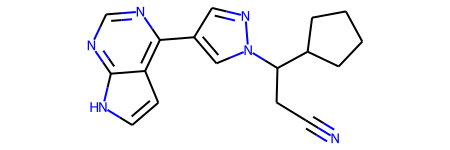

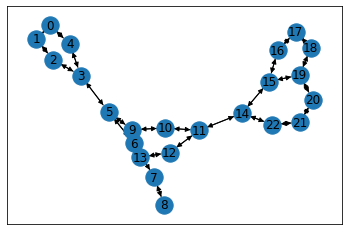

In [ ]:
this_smile_index = 53
this_smile = drug_smile_X[this_smile_index]
print(f"Drug = {this_smile}")
this_graph = smile_graph_X[this_smile]
nx.draw_networkx(this_graph[-1])
Chem.MolFromSmiles(this_smile)

In [ ]:
class ECFP6:
    def __init__(self, smiles):
        self.mols = [Chem.MolFromSmiles(i) for i in smiles]
        self.smiles = smiles

    def mol2fp(self, mol, radius = 3):
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius = radius)
        array = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, array)
        return array

    def compute_ECFP6(self, name = None):
        bit_headers = ['bit' + str(i) for i in range(2048)]
        arr = np.empty((0,2048), int).astype(int)
        for i in self.mols:
            fp = self.mol2fp(i)
            arr = np.vstack((arr, fp))
        df_ecfp6 = pd.DataFrame(np.asarray(arr).astype(int),columns=bit_headers)
        df_ecfp6.insert(loc=0, column='smiles', value=self.smiles)
        if name != None:
            df_ecfp6.to_csv(name[:-4]+'_ECFP6.csv', index=False)
        return df_ecfp6


# filename = 'data/macrolides_smiles.csv'  # path to your csv file
# df = pd.read_csv(filename)               # read the csv file as pandas data frame
# smiles = [standardize_smiles(i) for i in df3['SMILES'].values]  
smiles = [standardize_smiles(i) for i in unique_smiles_list] 
convert_to_nonstd = dict(zip(smiles, unique_smiles_list)) 

## Compute ECFP6 Fingerprints and export a csv file.
ecfp6_descriptor = ECFP6(smiles)        # create your ECFP6 object and provide smiles
ecfp_df = ecfp6_descriptor.compute_ECFP6() # compute ECFP6 and provide the name of your desired output file. you can use the same name as the input file because the ECFP6 class will ensure to add "_ECFP6.csv" as part of the output file.

In [ ]:
def atom_features_X(atom):
    return np.array(one_of_k_encoding_unk_X(atom.GetSymbol(),['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na','Ca', 'Fe', 'As', 'Al', 'I', 'B', 'V', 'K', 'Tl', 'Yb','Sb', 'Sn', 'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn', 'H','Li', 'Ge', 'Cu', 'Au', 'Ni', 'Cd', 'In', 'Mn', 'Zr','Cr', 'Pt', 'Hg', 'Pb', 'Unknown']) +
                    one_of_k_encoding_X(atom.GetDegree(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    one_of_k_encoding_unk_X(atom.GetTotalNumHs(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    one_of_k_encoding_unk_X(atom.GetImplicitValence(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    [atom.GetIsAromatic()])
    

def one_of_k_encoding_X(x, allowable_set):
    if x not in allowable_set:
        raise Exception("input {0} not in allowable set{1}:".format(x, allowable_set))
    return list(map(lambda s: x == s, allowable_set))

def one_of_k_encoding_unk_X(x, allowable_set):
    """Maps inputs not in the allowable set to the last element."""
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))

def smile_to_graph_X(smile):
    mol = Chem.MolFromSmiles(smile)
    
    c_size = mol.GetNumAtoms()
                     
    features = []
    for atom in mol.GetAtoms():
        feature = atom_features_X(atom)
        # feature = atom_features_X(atom) + np.array(ecfp_df.loc[ecfp_df["smiles"] == standardize_smiles(smile)].values.tolist()[0][1:])

        this_ecfp = np.array(ecfp_df.loc[ecfp_df["smiles"] == standardize_smiles(smile)].values.tolist()[0][1:])

        feature = np.append(feature, this_ecfp, 0)
        features.append( feature / sum(feature) )

    edges = []
    for bond in mol.GetBonds():
        edges.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])
    g = nx.Graph(edges).to_directed()
    edge_index = []
    for e1, e2 in g.edges:
        edge_index.append([e1, e2])
        
    return c_size, features, edge_index

In [ ]:
ecfp_df.loc[ecfp_df["smiles"] == standardize_smiles(test_smile)]

smiles  bit0  ...  bit2046  bit2047
0  CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3ccccc3nc2-1     0  ...        0        0

[1 rows x 2049 columns]

In [ ]:
print(np.array(ecfp_df.loc[ecfp_df["smiles"] == standardize_smiles(test_smile)].values.tolist()[0][0]))
sum(np.array(ecfp_df.loc[ecfp_df["smiles"] == standardize_smiles(test_smile)].values.tolist()[0][1:]))

CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3ccccc3nc2-1


73

In [ ]:
ecfp_df.loc[ecfp_df["smiles"] == test_smile] 

Empty DataFrame
Columns: [smiles, bit0, bit1, bit2, bit3, bit4, bit5, bit6, bit7, bit8, bit9, bit10, bit11, bit12, bit13, bit14, bit15, bit16, bit17, bit18, bit19, bit20, bit21, bit22, bit23, bit24, bit25, bit26, bit27, bit28, bit29, bit30, bit31, bit32, bit33, bit34, bit35, bit36, bit37, bit38, bit39, bit40, bit41, bit42, bit43, bit44, bit45, bit46, bit47, bit48, bit49, bit50, bit51, bit52, bit53, bit54, bit55, bit56, bit57, bit58, bit59, bit60, bit61, bit62, bit63, bit64, bit65, bit66, bit67, bit68, bit69, bit70, bit71, bit72, bit73, bit74, bit75, bit76, bit77, bit78, bit79, bit80, bit81, bit82, bit83, bit84, bit85, bit86, bit87, bit88, bit89, bit90, bit91, bit92, bit93, bit94, bit95, bit96, bit97, bit98, ...]
Index: []

[0 rows x 2049 columns]

In [ ]:
test_smile = unique_smiles_list[0]   ## zara sa    np.array(ecfp_df.loc[ecfp_df["smiles"] == standardize_smiles(test_smile)].values.tolist()[0][1:])
std_smile_X = "CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3ccccc3nc2-1"
temp = smile_to_graph_X(std_smile_X)

In [ ]:
np.append(temp[1][0], sample_ecfp, 0).shape[0]

2126

In [ ]:
convert_to_nonstd[std_smile_X]

'CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3=C2)O'

In [ ]:
sample_ecfp = np.array(ecfp_df.loc[ecfp_df["smiles"] == standardize_smiles(test_smile)].values.tolist()[0][1:])
sample_ecfp

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
sample_ecfp.shape

(2048,)

In [ ]:
for c, i in enumerate(range(temp[0])):
    print(c, temp[1][i].shape)

0 (2126,)
1 (2126,)
2 (2126,)
3 (2126,)
4 (2126,)
5 (2126,)
6 (2126,)
7 (2126,)
8 (2126,)
9 (2126,)
10 (2126,)
11 (2126,)
12 (2126,)
13 (2126,)
14 (2126,)
15 (2126,)
16 (2126,)
17 (2126,)
18 (2126,)
19 (2126,)
20 (2126,)
21 (2126,)
22 (2126,)
23 (2126,)
24 (2126,)
25 (2126,)


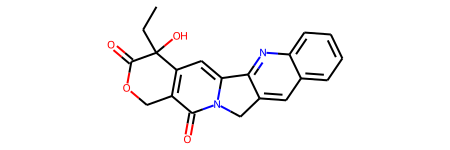

In [ ]:
Chem.MolFromSmiles(test_smile)

In [ ]:
test_smile = "CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3=C2)O"
drug_graph_X = smile_to_graph_X(test_smile)
len(drug_graph_X)

3

In [ ]:
atom_X = Chem.MolFromSmiles(test_smile).GetAtoms()[-1]
atom_X.GetIsAromatic()

False

In [ ]:
allowable_set_X = ['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na','Ca', 'Fe', 'As', 'Al', 'I', 'B', 'V', 'K', 'Tl', 'Yb','Sb', 'Sn', 'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn', 'H','Li', 'Ge', 'Cu', 'Au', 'Ni', 'Cd', 'In', 'Mn', 'Zr','Cr', 'Pt', 'Hg', 'Pb', 'Unknown']
this_sym = "C"
outlist = list(map(lambda s: this_sym == s, allowable_set_X))
print(f"outlist = {outlist}")
print(f"atom.GetDegree() = {atom_X.GetSymbol()}")

outlist = [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
atom.GetDegree() = C


In [ ]:
len(allowable_set_X)+11*3+1

78

In [ ]:
mol = Chem.MolFromSmiles(test_smile)
c_size = mol.GetNumAtoms()  ## 26

features = []
count = 0
for atom in mol.GetAtoms():
  print(f"atom.GetSymbol() = {atom.GetSymbol()}")
  print(f"type(atom.GetSymbol()) = {type(atom.GetSymbol())}")
  feature = atom_features_X(atom)
  features.append( feature / sum(feature) )
  print(f"sum(feature) = {sum(feature)}")
  print(f"feature = {feature}")
  print(f"len(feature) = {len(feature)}")
  print()
print(f"features = {features}")
print(f"len(features)= {len(features)}")

atom.GetSymbol() = C
type(atom.GetSymbol()) = <class 'str'>
sum(feature) = 4
feature = [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False  True False
 False False False False False False False False False  True False False
 False False False False False False]
len(feature) = 78

atom.GetSymbol() = C
type(atom.GetSymbol()) = <class 'str'>
sum(feature) = 4
feature = [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False Fa

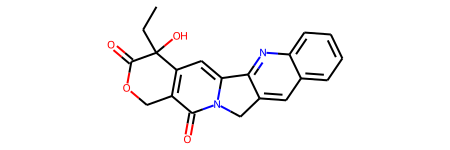

In [ ]:
mol

In [ ]:
mol = Chem.MolFromSmiles(test_smile)
c_size = mol.GetNumAtoms()  ## 26
edges = []
for bond in mol.GetBonds():
  edges.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])
g = nx.Graph(edges).to_directed()
edge_index = []
for e1, e2 in g.edges:
    edge_index.append([e1, e2])
print(f"len(mol.GetBonds()) = {len(mol.GetBonds())} ")
print(f"edges = {edges}")
print(f"edge_index = {edge_index}")
print(f"type(g) = {type(g)}") 

len(mol.GetBonds()) = 30 
edges = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [4, 9], [9, 10], [9, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [23, 24], [2, 25], [7, 2], [24, 3], [23, 11], [22, 13], [20, 15]]
edge_index = [[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [2, 25], [2, 7], [3, 2], [3, 4], [3, 24], [4, 3], [4, 5], [4, 9], [5, 4], [5, 6], [6, 5], [6, 7], [7, 6], [7, 8], [7, 2], [8, 7], [9, 4], [9, 10], [9, 11], [10, 9], [11, 9], [11, 12], [11, 23], [12, 11], [12, 13], [13, 12], [13, 14], [13, 22], [14, 13], [14, 15], [15, 14], [15, 16], [15, 20], [16, 15], [16, 17], [17, 16], [17, 18], [18, 17], [18, 19], [19, 18], [19, 20], [20, 19], [20, 21], [20, 15], [21, 20], [21, 22], [22, 21], [22, 23], [22, 13], [23, 22], [23, 24], [23, 11], [24, 23], [24, 3], [25, 2]]
type(g) = <class 'networkx.classes.digraph.DiGraph'>


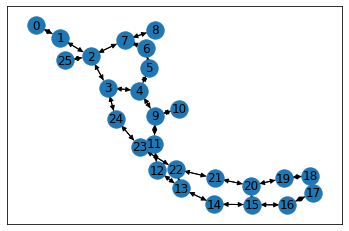

In [ ]:
nx.draw_networkx(g)

In [ ]:
# Print the Graph info
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of features per node (Length of feature vector): {data.num_node_features}")
print(f"Number of weights per edge (edge-features): {data.num_edge_features}")

# Plot the graph
# Need to convert the data from graph geometric to a network x. 
# The converter we use is torch_geometric.utils.convert import to_networkx
# G = to_networkx(data)
nx.draw_networkx(g)

In [ ]:
temp = 23
mol.GetBonds()[temp].GetBeginAtomIdx(), mol.GetBonds()[temp].GetEndAtomIdx()

(23, 24)

In [ ]:
drug_graph_X

(26, [array([0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  ]),
  array([0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
    

In [ ]:
def cid_from_other_source_X(): ## GAK
    """
    some drug can not be found in pychem, so I try to find some cid manually.
    the small_molecule.csv is downloaded from http://lincs.hms.harvard.edu/db/sm/
    """
    # f = open(folder + "small_molecule.csv", 'r')
    # reader = csv.reader(f)
    reader = csv.reader(open(folder + "small_molecule.csv",'r'),delimiter=' ')


    # reader.next()
    # reader = next(reader)

    cid_dict = {}
    for item in reader:
        print("____")
        print(f"len(item) = {len(item)}")
        print(f"item = {item}")
        name = item[1]
        cid = item[4]
        if not name in cid_dict: 
            cid_dict[name] = str(cid)

    unknow_drug = open(folder + "unknow_drug_by_pychem.csv").readline().split(",")
    drug_cid_dict = {k:v for k,v in cid_dict.iteritems() if k in unknow_drug and not is_not_float([v])}
    return drug_cid_dict

In [ ]:
drugs_X = cid_from_other_source_X() ## GAK

____
len(item) = 15
item = ['HMS', 'LINCS', 'ID,Name,Alternative', 'Names,LINCS', 'ID,PubChem', 'CID,ChEBI', 'ID,ChEMBL', 'ID,Molecular', 'Mass,InChi,InChi', 'Key,SMILES,Relevant', 'Citations,Date', 'Publicly', 'Available,Most', 'Recent', 'Update']
____
len(item) = 2
item = ['10001-101,Seliciclib,(R)-Roscovitine;', 'CYC202,LSM-1001,160355,,14762,354.22,"InChI=1S/C19H26N6O/c1-4-15(11-26)22-19-23-17(20-10-14-8-6-5-7-9-14)16-18(24-19)25(12-21-16)13(2)3/h5-9,12-13,15,26H,4,10-11H2,1-3H3,(H2,20,22,23,24)/t15-/m1/s1",BTIHMVBBUGXLCJ-OAHLLOKOSA-N,CC[C@H](CO)NC1=NC2=C(C(=N1)NCC3=CC=CC=C3)N=CN2C(C)C,,,2016-07-12']


IndexError: ignored

In [ ]:
drugs_X

['BIX02189',
 'PLX-4720',
 'PHA-665752',
 'SNX-2112',
 'PHA-793887',
 'THZ-2-49',
 'XMD8-92',
 'Bosutinib',
 'CI-1040',
 'KIN001-266',
 'Cytarabine',
 'TAK-715',
 'OSU-03012',
 'Obatoclax Mesylate',
 'Vinblastine',
 'Navitoclax',
 'Tubastatin A',
 'PF-4708671',
 'Zibotentan',
 'Doramapimod',
 'RO-3306',
 'WH-4-023',
 'Cetuximab',
 'WZ-1-84',
 'Gemcitabine',
 'Olaparib',
 'Avagacestat',
 'KIN001-236',
 'Methotrexate',
 'Seliciclib',
 'ZSTK474',
 'SGC0946',
 'FTI-277',
 'Dabrafenib',
 'GSK690693',
 'IOX2',
 'Genentech Cpd 10',
 'Rucaparib',
 'SN-38',
 'Masitinib',
 'AKT inhibitor VIII',
 'Lestauritinib',
 'Bexarotene',
 'CCT-018159',
 'MG-132',
 'AT-7519',
 'Phenformin',
 'SB52334',
 'CHIR-99021',
 'S-Trityl-L-cysteine',
 'Midostaurin',
 'AS601245',
 'GSK1904529A',
 'Camptothecin',
 'Bleomycin',
 'STF-62247',
 'Pictilisib',
 'Bortezomib',
 'Dactolisib',
 'Salubrinal',
 'CCT007093',
 'Entinostat',
 'CX-5461',
 'Erlotinib',
 'NVP-TAE684',
 'Saracatinib',
 'NSC-207895',
 'HG-5-88-01',
 'Ele

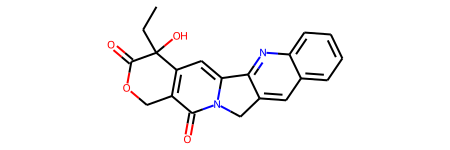

In [ ]:
show_structure(this_smiles)

In [ ]:
df3.iloc[[0]]

Drug name  ...                                             SMILES
0  Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...

[1 rows x 14 columns]

In [ ]:
list(df3.iloc[[0]].SMILES)[0]

'CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3=C2)O'

In [ ]:
df2

drug_id                                             SMILES
0       1559  CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...
1       1058  CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...
2       1088  CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
3       1549  CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4...
4       1073                               C1=C(C(=O)NC(=O)N1)F
..       ...                                                ...
164     1629  CC1=CN=C(N=C1NCC2=CC=C(C=C2)N3C=CN=N3)C4=CC=CC...
165     1799  C=CC(=O)N1CCCC(C1)N2C3=NC=NC(=C3C(=N2)C4=CC=C(...
166     1835  CC(=CC(=O)OC1CC2=CC(CC3(C(O3)C4C1C(=C)C(=O)O4)...
167     1908  CC(C)NC1=NC=C(C(=C1)C2=CNC(=C2)C(=O)NC(CO)C3=C...
168     1915  CC1CN(CCN1C(=O)OC2=C(C=C3C(=C2)C(=NC=N3)NC4=C(...

[169 rows x 2 columns]

In [ ]:
list(df2.loc[df2["drug_id"] == 1004].SMILES)

['CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9C7C(C=CC9)(C(C(C8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O']

In [ ]:
temp = drugnameToSmiles("Vinblastine")
temp

'CC[C@@]1(C[C@H]2C[C@@](C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)[C@]78CCN9[C@H]7[C@@](C=CC9)([C@H]([C@@]([C@@H]8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O'

In [ ]:
temp = "CC[C@@]1(C[C@H]2C[C@@](C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)[C@]78CCN9[C@H]7[C@@](C=CC9)([C@H]([C@@]([C@@H]8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O"
temp = temp.replace('@', '')
temp = temp.replace('[', '')
temp = temp.replace(']', '')
temp

'CCC1(CCH2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9CH7C(C=CC9)(CH(C(CH8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O'

In [ ]:
df1 = pd.read_csv('gdrive/MyDrive/FYP/Data/pancancer.csv')

In [ ]:
df1[940:960]

Drug name  Drug Id Cell line name  ...      RMSE   Z score Dataset version
940  Vinblastine     1004          HT-29  ...  0.175117 -0.284870           GDSC2
941  Vinblastine     1004          K-562  ...  0.100661 -0.803101           GDSC2
942  Vinblastine     1004       NCI-H226  ...  0.055085  0.671564           GDSC2
943  Vinblastine     1004        NCI-H23  ...  0.108347 -0.601201           GDSC2
944  Vinblastine     1004       NCI-H522  ...  0.137286 -0.387819           GDSC2
945  Vinblastine     1004           T47D  ...  0.160123  1.020591           GDSC2
946  Vinblastine     1004           MCF7  ...  0.065148  0.729174           GDSC2
947  Vinblastine     1004          786-0  ...  0.138668 -0.280562           GDSC2
948  Vinblastine     1004           A498  ...  0.030785  1.669220           GDSC2
949  Vinblastine     1004           A549  ...  0.108352 -0.421099           GDSC2
950  Vinblastine     1004           ACHN  ...  0.077279  0.258135           GDSC2
951  Vinblastine     1004         BT-549  ...  0.121183  0.650221           GDSC2
952  Vinblastine     1004       CCRF-CEM  ...  0.108264 -1.203509           GDSC2
953  Vinblastine     1004       SK-MEL-2  ...  0.113960 -0.384723           GDSC2
954  Vinblastine     1004       Hs-578-T  ...  0.159345 -0.637169           GDSC2
955  Vinblastine     1004         MOLT-4  ...  0.108956 -1.086510           GDSC2
956  Vinblastine     1004        SK-OV-3  ...  0.109102  0.687114           GDSC2
957  Vinblastine     1004     MDA-MB-231  ...  0.137980 -0.078617           GDSC2
958  Vinblastine     1004       COLO-205  ...  0.182505 -0.872099           GDSC2
959  Vinblastine     1004          SW620  ...  0.174388 -0.181973           GDSC2

[20 rows x 13 columns]

In [ ]:
temp = df1.rename(columns = {'Drug Id':'drug_id'}, inplace = True)

In [ ]:
df3 = pd.merge(df1, df2, how ='inner', on =['drug_id'])

In [ ]:
print(len(df1))
len(df3)

135242


113995

In [ ]:
df3

Drug name  ...                                             SMILES
0       Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
1       Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
2       Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
3       Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
4       Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
...              ...  ...                                                ...
113990           JQ1  ...  CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...
113991           JQ1  ...  CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...
113992           JQ1  ...  CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...
113993           JQ1  ...  CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...
113994           JQ1  ...  CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...

[113995 rows x 14 columns]

In [ ]:
temp1 = df1['drug_id'].tolist()
temp2 = df2['drug_id'].tolist()
temp3 = df3['drug_id'].tolist()

In [ ]:
no_formula_list = list(set(temp1) - set(temp3))
no_formula_list

[1034,
 1806,
 1808,
 1428,
 1441,
 1830,
 1449,
 1706,
 1708,
 1709,
 1712,
 1713,
 1714,
 1716,
 1718,
 1463,
 1720,
 1730,
 1732,
 1733,
 1734,
 1862,
 1736,
 1738,
 1739,
 1866,
 1998,
 1401,
 2170]

In [ ]:
# df1.loc[df1["drug_id"] == no_formula_list[0]]["Drug name"].tolist()[0]
df1.loc[df1["drug_id"] == 1034]["Drug name"].tolist()[0]

'Staurosporine'

In [ ]:
print(f"len(no_formula_list) = {len(no_formula_list)}")
for idi in no_formula_list:
  this_dn = df1.loc[df1["drug_id"] == idi]["Drug name"].tolist()[0]
  results = pcp.get_compounds(this_dn, 'name')
  print(f"idi = {idi} <> this_dn = {this_dn} <> results = {results}")

len(no_formula_list) = 29
idi = 1034 <> this_dn = Staurosporine <> results = [Compound(44259), Compound(5311103), Compound(451705), Compound(5279), Compound(42610657), Compound(9956178), Compound(5459111), Compound(6419748), Compound(9937179), Compound(44299148), Compound(49831000), Compound(6711321), Compound(44120114)]
idi = 1806 <> this_dn = Oxaliplatin <> results = [Compound(9887053)]
idi = 1808 <> this_dn = Topotecan <> results = [Compound(60700)]
idi = 1428 <> this_dn = IAP_5620 <> results = []
idi = 1441 <> this_dn = AZD2014 <> results = [Compound(25262792)]
idi = 1830 <> this_dn = Gallibiscoquinazole <> results = [Compound(353472)]
idi = 1449 <> this_dn = AZD1208 <> results = [Compound(58423153)]
idi = 1706 <> this_dn = AZD5153 <> results = [Compound(118693659)]
idi = 1708 <> this_dn = CDK9_5576 <> results = []
idi = 1709 <> this_dn = CDK9_5038 <> results = []
idi = 1712 <> this_dn = Eg5_9814 <> results = []
idi = 1713 <> this_dn = ERK_2440 <> results = []
idi = 1714 <> this_dn

In [ ]:
this_dn = df1.loc[df1["drug_id"] == no_formula_list[0]]["Drug name"].tolist()[0]
results = pcp.get_compounds(this_dn, 'name')
for compound in results:
  print(compound.isomeric_smiles)

C[C@@]12[C@@H]([C@@H](C[C@@H](O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC
C[C@@]12[C@H]([C@H](C[C@@H](O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC
C[C@]12[C@H]([C@H](C[C@H](O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC
CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC
C[C@@]12[C@H]([C@H](C[C@H](O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC
C[C@]12[C@H]([C@H](C[C@@H](O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC
CC12[C@H]([C@H](C[C@@H](O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC
CC12[C@@H]([C@@H](C[C@@H](O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC
C[C@@]12[C@@H]([C@@H](C[C@H](O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC
C[C@@]12[C@@H]([C@@H](CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC
C[C@@]12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC
CC12[C@H]([C@H](C[C@H](O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC
C

In [ ]:
drugnameToSmiles

<function __main__.drugnameToSmiles>

In [ ]:
df1.loc[df1["Drug Id"] == 1629]

KeyError: ignored

In [ ]:
df1.loc[df1["Drug name"] == "CDK9_5576"]

In [ ]:
# df1.loc[df1["Drug name"] == "Camptothecin"]
temp = df1['Drug name'].tolist()
drug_names = list(set(temp))

In [ ]:
results = pcp.get_compounds("Cisplatin", 'name')
results

In [ ]:
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

def ctoint(_c):
  return int(str(_c)[9:-1])

def drugnameToSmiles(dn):
  return pcp.get_compounds(dn, 'name')[0].isomeric_smiles

In [ ]:
drug_names[:7]

In [ ]:
for dn in drug_names:
  results = pcp.get_compounds(dn, 'name')
  if len(results) == 2:
    print(len(results))
    print(results)
    break
  else:
    print(results)

In [ ]:
results = pcp.get_compounds('CDK9_5576', 'name')
results

for compound in results:
  print(compound.isomeric_smiles)
print()

c = pcp.Compound.from_cid(ctoint(results[0]))
print(f"c.molecular_formula : {c.molecular_formula}")
print(f"c.molecular_weight :  {c.molecular_weight}")
print(f"c.isomeric_smiles : {c.isomeric_smiles}")
print(f"c.iupac_name :  {c.iupac_name}")
print(f"c.synonyms :  {c.synonyms}")

In [ ]:
# Test in a kinase inhibitor
this_smiles = c.isomeric_smiles
mol = Chem.MolFromSmiles("CC1=C(SC2=C1C(=N[C@H](C3=NN=C(N32)C)CC(=O)OC(C)(C)C)C4=CC=C(C=C4)Cl)C")
# Default
mol

## Dataframes

In [ ]:
get_ecfp_sparsity(unique_smiles_union, fpl=250)

26.72

In [ ]:
qwe = ecfp6_descriptor.compute_ECFP6(fp_length = 1024*2, generate_df=False)

In [ ]:
qwe

In [ ]:
asd = qwe[:,:1]
print(np.sum(asd))
# print(asd)

In [ ]:
print(sum(ecfp6_descriptor.compute_ECFP6(fp_length = 2048, generate_df=False)))
print(len(ecfp6_descriptor.compute_ECFP6(fp_length = 2048, generate_df=False)))

In [ ]:
np.sum(qwe)

In [ ]:
qwe.shape[0]*qwe.shape[1]

In [ ]:
def get_ecfp_sparsity(sml, fpl):       
    tmp = ECFP6(sml).compute_ECFP6(fp_length = fpl, generate_df=False) 
    return round(100*np.sum(tmp)/(tmp.shape[0]*tmp.shape[1]) , 2)

In [ ]:
for i in range(10, 101, 10):
    print(i, get_ecfp_sparsity(unique_smiles_union[:int(len(unique_smiles_union)*i/100)], 2048))

In [ ]:
for i in range(100, 3000, 100):
    print(i, get_ecfp_sparsity(unique_smiles_union, i))

In [ ]:
for i in range(10, 101, 10):
    print(i, get_ecfp_sparsity(unique_smiles_union[:int(len(unique_smiles_union)*i/100)], 2048//8))

In [ ]:
sum(ecfp6_descriptor.compute_ECFP6(fp_length = 2048, generate_df=False)[0])

In [ ]:
print(f"length unique_name_df0 {len(unique_name_df0)}")
print(f"length unique_name_df3 {len(unique_drug_name)}")

name_not_in_df3 = []
for dg in unique_name_df0:
    if dg not in unique_drug_name:
        name_not_in_df3.append(dg)

name_not_in_df0 = []
for dg in unique_drug_name:
    if dg not in unique_name_df0:
        name_not_in_df0.append(dg)
print(f"len name_not_in_df3 = {len(name_not_in_df3)}")
print(f"len name_not_in_df0 = {len(name_not_in_df0)}")

unique_name_diff = list(set(unique_name_df0) - set(unique_drug_name)) + list(set(unique_drug_name) - set(unique_name_df0))  
print(len(unique_name_diff))
print(unique_name_diff.index("SNX-2112"))

In [ ]:
unique_name_union = unique_name_df0 + unique_drug_name
unique_smiles_union = unique_smiles_df0 + unique_smiles
print(len(unique_name_union ))
print(len(unique_smiles_union ))

In [ ]:
smiles = [standardize_smiles(i) for i in unique_smiles_union] 
convert_to_nonstd_union = dict(zip(smiles, unique_smiles_union)) 

## Compute ECFP6 Fingerprints and export a csv file.
ecfp6_descriptor = ECFP6(smiles)        # create your ECFP6 object and provide smiles
df6 = ecfp6_descriptor.compute_ECFP6() # compute ECFP6

In [ ]:
# not_len = []
# for csi in list(dict.fromkeys(list(df4.cosmic_sample_id))):
#   this_len = len(df4.loc[df4["cosmic_sample_id"] == csi])
#   if (this_len != 735):
#     not_len.append(csi)
# #   print(f"length = {this_len}")

# for csi in not_len:
#   this_len = len(df4.loc[df4["cosmic_sample_id"] == csi])
# #   print(f"csi = {csi} <> length = {this_len}")

In [ ]:
df3

Drug name  ...                                             SMILES
0       Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
1       Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
2       Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
3       Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
4       Camptothecin  ...  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
...              ...  ...                                                ...
113990           JQ1  ...  CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...
113991           JQ1  ...  CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...
113992           JQ1  ...  CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...
113993           JQ1  ...  CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...
113994           JQ1  ...  CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...

[113995 rows x 14 columns]

In [ ]:
unique_drug_name = list(Counter(df3["Drug name"].tolist()).keys())
print(f"unique_drug_name = {len(unique_drug_name)}")
unique_drug_id = list(Counter(df3["drug_id"].tolist()).keys())
print(f"unique_drug_id = {len(unique_drug_id)}")
unique_cell_line_name = list(Counter(df3["Cell line name"].tolist()).keys())
print(f"unique_cell_line_name = {len(unique_cell_line_name)}")
unique_cosmic_sample_id = list(Counter(df3["cosmic_sample_id"].tolist()).keys())
print(f"unique_cosmic_sample_id = {len(unique_cosmic_sample_id)}")
unique_tcga_classification= list(Counter(df3["TCGA classification"].tolist()).keys())
print(f"unique_tcga_classification = {len(unique_tcga_classification)}")
unique_tissue= list(Counter(df3["Tissue"].tolist()).keys())
print(f"unique_tissue = {len(unique_tissue)}")

unique_drug_name = 164
unique_drug_id = 169
unique_cell_line_name = 809
unique_cosmic_sample_id = 809
unique_tcga_classification = 32
unique_tissue = 13


In [ ]:
tissue_count = {}
for tis in unique_tissue:
  tissue_count[tis] = len(df3.loc[df3["Tissue"] == tis])

In [ ]:
data = {'Tissue': list(tissue_count.keys()),
        'Data_Count': list(tissue_count.values())} 
tissue_countdf = pd.DataFrame.from_dict(data)
tissue_countdf

Tissue  Data_Count
0                  blood       19969
1         nervous_system        8714
2            soft_tissue        2605
3                   bone        5056
4                   skin        4705
5      urogenital_system       12846
6                   lung       21060
7               pancreas        4380
8   aero_digestive_tract        8647
9                 breast        7596
10                kidney        2870
11      digestive_system       13553
12               thyroid        1994

In [ ]:
# df3.loc[(df3["drug_id"] == unique_drug_id[0])]
pandasql.sqldf(f"SELECT * FROM df3 WHERE drug_id == {unique_drug_id[100]} ;", globals())

Drug name  ...                                             SMILES
0   Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
1   Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
2   Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
3   Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
4   Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
5   Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
6   Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
7   Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
8   Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
9   Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
10  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
11  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
12  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
13  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
14  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
15  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
16  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
17  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
18  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
19  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
20  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
21  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
22  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
23  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
24  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
25  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
26  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
27  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
28  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
29  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
30  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
31  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
32  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
33  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
34  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
35  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
36  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
37  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
38  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
39  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
40  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
41  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
42  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
43  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
44  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
45  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...
46  Ribociclib  ...  CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...

[47 rows x 14 columns]

In [ ]:
drug_name_id_dict = {}
for dg in unique_drug_name:
  # if ( 1 <= len(list(Counter(df3.loc[df3["Drug name"] == "Camptothecin"]["drug_id"].tolist()).keys())) ):
  drug_name_id_dict[dg] = list(Counter(df3.loc[df3["Drug name"] == dg]["drug_id"].tolist()).keys())

In [ ]:
print(drug_name_id_dict)

{'Camptothecin': [1003], 'Vinblastine': [1004], 'Cisplatin': [1005], 'Cytarabine': [1006], 'Docetaxel': [1007, 1819], 'Gefitinib': [1010], 'Navitoclax': [1011], 'Vorinostat': [1012], 'Nilotinib': [1013], 'Olaparib': [1017], 'Axitinib': [1021], 'AZD7762': [1022], 'SB216763': [1025], 'KU-55933': [1030], 'Afatinib': [1032], 'PLX-4720': [1036], 'NU7441': [1038], 'Doramapimod': [1042], 'Wee1 Inhibitor': [1046], 'Nutlin-3a (-)': [1047], 'Mirin': [1048], 'PD173074': [1049], 'ZM447439': [1050], 'Alisertib': [1051], 'RO-3306': [1052], 'MK-2206': [1053], 'Palbociclib': [1054], 'Dactolisib': [1057], 'Pictilisib': [1058], 'AZD8055': [1059], 'PD0325901': [1060], 'Obatoclax Mesylate': [1068], '5-Fluorouracil': [1073], 'Dasatinib': [1079], 'Paclitaxel': [1080], 'Crizotinib': [1083], 'Rapamycin': [1084], 'Sorafenib': [1085], 'BI-2536': [1086], 'Irinotecan': [1088], 'Oxaliplatin': [1089], 'BMS-536924': [1091], 'GSK1904529A': [1093], 'Tozasertib': [1096], 'PF-4708671': [1129], 'PRIMA-1MET': [1131], 'Erl

In [ ]:
mul_drug_id_dict = {}
for dg, id in drug_name_id_dict.items():
  if (len(id) > 1):
    mul_drug_id_dict[dg] = id  

In [ ]:
mul_drug_id_dict

{'Dactinomycin': [1811, 1911],
 'Docetaxel': [1007, 1819],
 'Fulvestrant': [1200, 1816],
 'Ulixertinib': [1908, 2047],
 'Uprosertib': [1553, 2106]}

In [ ]:
len(list(Counter(df3.loc[df3["drug_id"] == unique_drug_id[42]]["Cosmic sample Id"].tolist()).keys()))

KeyError: ignored

In [ ]:
print(unique_drug_name)

In [ ]:
unique_drug_id = list(Counter(df3["drug_id"].tolist()).keys())
print(len(unique_drug_id))

In [ ]:
unique_cell_line_name = list(Counter(df3["Cell line name"].tolist()).keys())
print(len(unique_cell_line_name))

In [ ]:
unique_cosmic_sample_id = list(Counter(df3["Cosmic sample Id"].tolist()).keys())
print(len(unique_cosmic_sample_id))

In [ ]:
unique_tcga_classification= list(Counter(df3["TCGA classification"].tolist()).keys())
print(len(unique_tcga_classification))

In [ ]:
unique_tissue= list(Counter(df3["Tissue"].tolist()).keys())
print(len(unique_tissue))

In [ ]:
unique_Tissue_subtype	= list(Counter(df3["Tissue sub-type"].tolist()).keys())
print(len(unique_Tissue_subtype))

52


In [ ]:
df4

cell_line_name  cosmic_sample_id  ... genetic_feature is_mutated
0              CAL-29           1290730  ...       CDC27_mut          0
1              CAL-29           1290730  ...       CDC73_mut          0
2              CAL-29           1290730  ...        CDH1_mut          0
3              CAL-29           1290730  ...       CDK12_mut          0
4              CAL-29           1290730  ...      CDKN1A_mut          0
...               ...               ...  ...             ...        ...
714050       UWB1.289           1480374  ...       HLA-B_mut          0
714051       UWB1.289           1480374  ...       HNF1A_mut          0
714052       UWB1.289           1480374  ...        HRAS_mut          0
714053       UWB1.289           1480374  ...       HSPA8_mut          0
714054       UWB1.289           1480374  ...        IDH1_mut          0

[714055 rows x 7 columns]

In [ ]:
unique_cell_line_name_df4	= list(Counter(df4["cell_line_name"].tolist()).keys())
print(f"unique_cell_line_name_df4 = {len(unique_cell_line_name_df4)}")
unique_cosmic_sample_id_df4 = list(Counter(df4["cosmic_sample_id"].tolist()).keys())
print(f"unique_cosmic_sample_id_df4 = {len(unique_cosmic_sample_id_df4)}")
unique_gdsc_desc1 = list(Counter(df4["gdsc_desc1"].tolist()).keys())
print(f"unique_gdsc_desc1 = {len(unique_gdsc_desc1)}")
unique_gdsc_desc2 = list(Counter(df4["gdsc_desc2"].tolist()).keys())
print(f"unique_gdsc_desc2 = {len(unique_gdsc_desc2)}")
unique_tcga_desc= list(Counter(df4["tcga_desc"].tolist()).keys())
print(f"unique_tcga_desc = {len(unique_tcga_desc)}")
unique_genetic_feature= list(Counter(df4["genetic_feature"].tolist()).keys())
print(f"unique_genetic_feature = {len(unique_genetic_feature)}")
unique_is_mutated	= list(Counter(df4["is_mutated"].tolist()).keys())
print(f"unique_is_mutated = {len(unique_is_mutated)}")

unique_cell_line_name_df4 = 990
unique_cosmic_sample_id_df4 = 990
unique_gdsc_desc1 = 13
unique_gdsc_desc2 = 55
unique_tcga_desc = 31
unique_genetic_feature = 735
unique_is_mutated = 2


In [ ]:
unique_cell_line_name.index("NCI60")

ValueError: ignored

In [ ]:
temp = df4.loc[df4["genetic_feature"] == "ACACA_mut"]
qwe = temp.loc[temp["cell_line_name"] == "MC-CAR"]
qwe

cell_line_name  cosmic_sample_id  ... genetic_feature is_mutated
581764         MC-CAR            683665  ...       ACACA_mut          0

[1 rows x 7 columns]

In [ ]:
df3[df3["Drug name"] == "MK-2206"]

Drug name  ...                                             SMILES
14121   MK-2206  ...  C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...
14122   MK-2206  ...  C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...
14123   MK-2206  ...  C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...
14124   MK-2206  ...  C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...
14125   MK-2206  ...  C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...
...         ...  ...                                                ...
14887   MK-2206  ...  C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...
14888   MK-2206  ...  C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...
14889   MK-2206  ...  C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...
14890   MK-2206  ...  C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...
14891   MK-2206  ...  C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...

[771 rows x 14 columns]

### GCN print

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_max_pool as gmp


# GCN based model
class GCNNet(torch.nn.Module):
    def __init__(self, n_output=1, n_filters=32, embed_dim=128,num_features_xd=78, num_features_xt=25, output_dim=128, dropout=0.5):  ## qwe

        super(GCNNet, self).__init__()

        # SMILES graph branch
        self.n_output = n_output
        self.conv1 = GCNConv(num_features_xd, num_features_xd)
        self.conv2 = GCNConv(num_features_xd, num_features_xd*2)
        self.conv3 = GCNConv(num_features_xd*2, num_features_xd * 4)
        self.fc_g1 = torch.nn.Linear(num_features_xd*4, 1024)
        self.fc_g2 = torch.nn.Linear(1024, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

        # cell line feature
        self.conv_xt_1 = nn.Conv1d(in_channels=1, out_channels=n_filters, kernel_size=8)
        self.pool_xt_1 = nn.MaxPool1d(3)
        self.conv_xt_2 = nn.Conv1d(in_channels=n_filters, out_channels=n_filters*2, kernel_size=8)
        self.pool_xt_2 = nn.MaxPool1d(3)
        self.conv_xt_3 = nn.Conv1d(in_channels=n_filters*2, out_channels=n_filters*4, kernel_size=8)
        self.pool_xt_3 = nn.MaxPool1d(3)
        self.fc1_xt = nn.Linear(2944, output_dim)

        # combined layers
        self.fc1 = nn.Linear(2*output_dim, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.out = nn.Linear(128, self.n_output)

    def forward(self, data):
        # get graph input
        x, edge_index, batch = data.x, data.edge_index, data.batch
        # get protein input
        target = data.target
        target = target[:,None,:]
        
        print("_____________________________________________________")
        print(f"x.shape : {x.shape}")
        print(f"edge_index.shape : {edge_index.shape}")
        print(f"edge_index : {edge_index}")
        print(f"batch : {batch}")
        print(f"batch.shape : {batch.shape}")
        print(f"data.target.shape : {data.target.shape}")
        print(f"data.target: {data.target}")
        print(f"target.shape : {target.shape}")
        print(f"target: {target}")
        print()
        print("FEATURES NN____________________________________")
        print(f"start x.shape : {x.shape}")
        x = self.conv1(x, edge_index)
        print(f"@@ conv1 x.shape : {x.shape}")
        x = self.relu(x)
        print(f"@@ relu x.shape : {x.shape}")

        x = self.conv2(x, edge_index)
        print(f"@@ conv2 x.shape : {x.shape}")
        x = self.relu(x)
        print(f"@@ relu x.shape : {x.shape}")

        x = self.conv3(x, edge_index)
        print(f"@@ conv3 x.shape : {x.shape}")
        x = self.relu(x)
        print(f"@@ relu x.shape : {x.shape}")
        x = gmp(x, batch)       # global max pooling
        print(f"@@ gmp  x.shape : {x.shape}")

        # flatten
        x = self.relu(self.fc_g1(x))
        print(f"@@ self.relu(self.fc_g1(x)) x.shape : {x.shape}")
        x = self.dropout(x)
        print(f"@@ drop out x.shape : {x.shape}")
        x = self.fc_g2(x)
        print(f"@@ fc_g2  x.shape : {x.shape}")
        x = self.dropout(x)
        print(f"@@ dropout  x.shape : {x.shape}")
        print("FEATURES COMPLETE")

        print()
        print(f"TARGETS NN____________________________________")
        # 1d conv layers
        print(f"Start target.shape : {target.shape}")
        conv_xt = self.conv_xt_1(target)
        print(f"@@ conv_xt_1 conv_xt.shape : {conv_xt.shape}")

        conv_xt = F.relu(conv_xt)
        print(f"@@ relu conv_xt.shape : {conv_xt.shape}")


        conv_xt = self.pool_xt_1(conv_xt)
        print(f"@@ pool_xt_1 conv_xt.shape : {conv_xt.shape}")

        conv_xt = self.conv_xt_2(conv_xt)
        print(f"@@ conv_xt_2 conv_xt.shape : {conv_xt.shape}")

        conv_xt = F.relu(conv_xt)
        print(f"@@ relu conv_xt.shape : {conv_xt.shape}")


        conv_xt = self.pool_xt_2(conv_xt)
        print(f"@@ pool_xt_2 conv_xt.shape : {conv_xt.shape}")


        conv_xt = self.conv_xt_3(conv_xt)
        print(f"@@ conv_xt_3 conv_xt.shape : {conv_xt.shape}")


        conv_xt = F.relu(conv_xt)
        print(f"@@ relu conv_xt.shape : {conv_xt.shape}")


        conv_xt = self.pool_xt_3(conv_xt)
        print(f"@@ pool_xt_3 conv_xt.shape : {conv_xt.shape}")
        print("TARGETS COMPLETE")
        print()

        # print('conv_xt', conv_xt.size())

        # flatten
        xt = conv_xt.view(-1, conv_xt.shape[1] * conv_xt.shape[2])
        print(f"@@ conv_xt.view(-1, conv_xt.shape[1] * conv_xt.shape[2]) xt.shape : {xt.shape}")
        xt = self.fc1_xt(xt)
        print(f"@@ fc1_xt xt.shape : {xt.shape}")
        print()

        # concat
        print("CONCAT")
        print(f"START x.shape: {x.shape} <> xt.shape: {xt.shape}")
        xc = torch.cat((x, xt), 1)
        print(f"@@ xc = torch.cat((x, xt), 1).shape : {xc.shape}")
        # add some dense layers
        xc = self.fc1(xc)
        print(f"@@ fc1 xc.shape : {xc.shape}")


        xc = self.relu(xc)
        print(f"@@ relu xc.shape : {xc.shape}")

        xc = self.dropout(xc)
        print(f"@@ dropout xc.shape : {xc.shape}")


        xc = self.fc2(xc)
        print(f"@@ fc2 xc.shape : {xc.shape}")


        xc = self.relu(xc)
        print(f"@@ relu xc.shape : {xc.shape}")


        xc = self.dropout(xc)
        print(f"@@ dropout xc.shape : {xc.shape}")


        out = self.out(xc)
        print(f"@@ self.out(xc) out.shape : {out.shape}")


        out = nn.Sigmoid()(out)
        print(f"@@ out = nn.Sigmoid()(out) : {out}")
        print(f"@@ out.shape : {out.shape}")

        return out, x

### GaphSage 02

In [ ]:
! ls gdrive/MyDrive/FYP/Data/SAGEData/squirrel/

sq_edges.csv  sq_features.json	sq_targets.csv


In [ ]:
sage_folder


'gdrive/MyDrive/FYP/Data/SAGEData/'

In [ ]:
edges_path = sage_folder + "squirrel/sq_edges.csv"         ## 'datasets-master/git_web_ml/git_edges.csv'
targets_path = sage_folder + "squirrel/sq_targets.csv"       ## 'datasets-master/git_web_ml/git_target.csv'
features_path = sage_folder + "squirrel/sq_features.json"      ## 'datasets-master/git_web_ml/git_features.json'

# Read in edges
edges = pd.read_csv(edges_path)
edges

version https://git-lfs.github.com/spec/v1
0  oid sha256:574b9d083635377c368e9431a2912177350...
1                                       size 2115909

In [ ]:
edges.columns = ['source', 'target'] # renaming for StellarGraph compatibility

with open(features_path) as json_data:
    features = json.load(json_data)
    
max_feature = np.max([v for v_list in features.values() for v in v_list])
features_matrix = np.zeros(shape = (len(list(features.keys())), max_feature+1))

i = 0
for k, vs in tqdm(features.items()):
    for v in vs:
        features_matrix[i, v] = 1
    i+=1
    
node_features = pd.DataFrame(features_matrix, index = features.keys())

# Read in targets
targets = pd.read_csv(targets_path)
targets.index = targets.id.astype(str)
targets = targets.loc[features.keys(), :]

# Put the nodes, edges, and features into stellargraph structure
G = sg.StellarGraph(node_features, edges.astype(str))

### GraphSAGE 01 Original

#### Main

In [ ]:
import sys
import os
import torch
import argparse
import numpy as np
# import pyhocon
import random

# from src.dataCenter import *
# from src.utils import *
# from src.models import *

# parser = argparse.ArgumentParser(description='pytorch version of GraphSAGE')

# parser.add_argument('--dataSet', type=str, default='cora')
# parser.add_argument('--agg_func', type=str, default='MEAN')
# parser.add_argument('--epochs', type=int, default=50)
# parser.add_argument('--b_sz', type=int, default=20)
# parser.add_argument('--seed', type=int, default=824)
# parser.add_argument('--cuda', action='store_true',
# 					help='use CUDA')
# parser.add_argument('--gcn', action='store_true')
# parser.add_argument('--learn_method', type=str, default='sup')
# parser.add_argument('--unsup_loss', type=str, default='normal')
# parser.add_argument('--max_vali_f1', type=float, default=0)
# parser.add_argument('--name', type=str, default='debug')
# parser.add_argument('--config', type=str, default='./src/experiments.conf')
# args = parser.parse_args()

# confgs = {
#     "file_path": 
#     {
#         "workdir": "./",
#         "cora_content": "${file_path.workdir}cora/cora.content",
#         "cora_cite": "${file_path.workdir}cora/cora.cites",
#         "pubmed_paper": "${file_path.workdir}pubmed-data/Pubmed-Diabetes.NODE.paper.tab",
#         "pubmed_cites": "${file_path.workdir}pubmed-data/Pubmed-Diabetes.DIRECTED.cites.tab"
#     },
#     "setting":
#     {
#         "num_layers": 2,
#         "hidden_emb_size": 128
#     }
# }

confgs = {
    "file_path":   
    {
        "workdir": "./",
        "cora_content": sage_folder+"cora/cora.content",
        "cora_cite": sage_folder+"cora/cora.cites",
        "pubmed_paper": "${file_path.workdir}pubmed-data/Pubmed-Diabetes.NODE.paper.tab",
        "pubmed_cites": "${file_path.workdir}pubmed-data/Pubmed-Diabetes.DIRECTED.cites.tab"
    },
    "setting":
    {
        "num_layers": 2,
        "hidden_emb_size": 128
    }
}

argsD = {
    "dataSet": "cora",
    "agg_func": "MEAN",
     "epochs": 2,  ## 50
    "b_sz": 20,
    "seed": 824,
    "cuda": False, 
    "gcn": True,
    "learn_method": "sup",
    "unsup_loss": "normal",
    "max_vali_f1": 0,  
    "name": "debug",   
    "config": confgs
}

if torch.cuda.is_available():
    # if not args.cuda:
    if (not argsD["cuda"]):
        print("WARNING: You have a CUDA device, so you should probably run with --cuda")
    else:
        device_id = torch.cuda.current_device()
        print('using device', device_id, torch.cuda.get_device_name(device_id))

# device = torch.device("cuda" if args.cuda else "cpu")
device = torch.device("cuda" if False else "cpu")
print('DEVICE:', device)

if __name__ == '__main__':
    random.seed(argsD["seed"])
    np.random.seed(argsD["seed"])
    torch.manual_seed(argsD["seed"])
    torch.cuda.manual_seed_all(argsD["seed"])
    config = confgs
    ds = argsD["dataSet"]
    dataCenter = DataCenter(config)
    dataCenter.load_dataSet(ds)
    features = torch.FloatTensor(getattr(dataCenter, ds+'_feats')).to(device)

    # graphSage = GraphSage(config['setting.num_layers'], features.size(1), config['setting.hidden_emb_size'], features, getattr(dataCenter, ds+'_adj_lists'), device, gcn=args.gcn, agg_func=args.agg_func)
    graphSage = GraphSage(config['setting']['num_layers'], features.size(1), config['setting']['hidden_emb_size'], features, getattr(dataCenter, ds+'_adj_lists'), device, gcn=argsD["gcn"], agg_func=argsD["agg_func"])


    graphSage.to(device)
    num_labels = len(set(getattr(dataCenter, ds+'_labels')))

    # classification = Classification(config['setting.hidden_emb_size'], num_labels)
    classification = Classification(config['setting']['hidden_emb_size'], num_labels)


    classification.to(device)
    unsupervised_loss = UnsupervisedLoss(getattr(dataCenter, ds+'_adj_lists'), getattr(dataCenter, ds+'_train'), device)

    # if args.learn_method == 'sup':
    if argsD["learn_method"] == 'sup':
        print('GraphSage with Supervised Learning')

    # elif args.learn_method == 'plus_unsup':
    elif argsD["learn_method"] == 'plus_unsup':
        print('GraphSage with Supervised Learning plus Net Unsupervised Learning')
    else:
        print('GraphSage with Net Unsupervised Learning')

    # for epoch in range(args.epochs):
    for epoch in range(argsD["epochs"]):
        print('----------------------EPOCH %d-----------------------' % epoch)

        # graphSage, classification = apply_model(dataCenter, ds, graphSage, classification, unsupervised_loss, args.b_sz, args.unsup_loss, device, args.learn_method)
        graphSage, classification = apply_model(dataCenter, ds, graphSage, classification, unsupervised_loss, argsD["b_sz"], argsD["unsup_loss"], device, argsD["learn_method"])        
        
        if (epoch+1) % 2 == 0 and args.learn_method == 'unsup':
            classification, args.max_vali_f1 = train_classification(dataCenter, graphSage, classification, ds, device, args.max_vali_f1, args.name)
        
        # if args.learn_method != 'unsup':
        if argsD["learn_method"] != 'unsup':
            # args.max_vali_f1 = evaluate(dataCenter, ds, graphSage, classification, device, args.max_vali_f1, args.name, epoch)
            argsD["max_vali_f1"] = evaluate(dataCenter, ds, graphSage, classification, device, argsD["max_vali_f1"], argsD["name"], epoch)

DEVICE: cpu
GraphSage with Supervised Learning
----------------------EPOCH 0-----------------------
Step [1/68], Loss: 1.9716, Dealed Nodes [1024/1355] 
Step [2/68], Loss: 1.9204, Dealed Nodes [1239/1355] 
Step [3/68], Loss: 1.8838, Dealed Nodes [1313/1355] 
Step [4/68], Loss: 1.8502, Dealed Nodes [1337/1355] 
Step [5/68], Loss: 1.8198, Dealed Nodes [1346/1355] 
Step [6/68], Loss: 1.7911, Dealed Nodes [1351/1355] 
Step [7/68], Loss: 1.7631, Dealed Nodes [1353/1355] 
Step [8/68], Loss: 1.7411, Dealed Nodes [1355/1355] 
Step [9/68], Loss: 1.7117, Dealed Nodes [1355/1355] 
Step [10/68], Loss: 1.6698, Dealed Nodes [1355/1355] 
Step [11/68], Loss: 1.6256, Dealed Nodes [1355/1355] 
Step [12/68], Loss: 1.6001, Dealed Nodes [1355/1355] 
Step [13/68], Loss: 1.5375, Dealed Nodes [1355/1355] 
Step [14/68], Loss: 1.4944, Dealed Nodes [1355/1355] 
Step [15/68], Loss: 1.4234, Dealed Nodes [1355/1355] 
Step [16/68], Loss: 1.3320, Dealed Nodes [1355/1355] 
Step [17/68], Loss: 1.2407, Dealed Nodes [135

FileNotFoundError: ignored

#### Models

In [ ]:
import sys, os
import torch
import random

import torch.nn as nn
import torch.nn.functional as F

class Classification(nn.Module):

	def __init__(self, emb_size, num_classes):
		super(Classification, self).__init__()

		#self.weight = nn.Parameter(torch.FloatTensor(emb_size, num_classes))
		self.layer = nn.Sequential(
								nn.Linear(emb_size, num_classes)	  
								#nn.ReLU()
							)
		self.init_params()

	def init_params(self):
		for param in self.parameters():
			if len(param.size()) == 2:
				nn.init.xavier_uniform_(param)

	def forward(self, embeds):
		logists = torch.log_softmax(self.layer(embeds), 1)
		return logists

# class Classification(nn.Module):

# 	def __init__(self, emb_size, num_classes):
# 		super(Classification, self).__init__()

# 		self.weight = nn.Parameter(torch.FloatTensor(emb_size, num_classes))
# 		self.init_params()

# 	def init_params(self):
# 		for param in self.parameters():
# 			nn.init.xavier_uniform_(param)

# 	def forward(self, embeds):
# 		logists = torch.log_softmax(torch.mm(embeds,self.weight), 1)
# 		return logists       

class UnsupervisedLoss(object):
	"""docstring for UnsupervisedLoss"""
	def __init__(self, adj_lists, train_nodes, device):
		super(UnsupervisedLoss, self).__init__()
		self.Q = 10
		self.N_WALKS = 6
		self.WALK_LEN = 1
		self.N_WALK_LEN = 5
		self.MARGIN = 3
		self.adj_lists = adj_lists
		self.train_nodes = train_nodes
		self.device = device

		self.target_nodes = None
		self.positive_pairs = []
		self.negtive_pairs = []
		self.node_positive_pairs = {}
		self.node_negtive_pairs = {}
		self.unique_nodes_batch = []

	def get_loss_sage(self, embeddings, nodes):
		assert len(embeddings) == len(self.unique_nodes_batch)
		assert False not in [nodes[i]==self.unique_nodes_batch[i] for i in range(len(nodes))]
		node2index = {n:i for i,n in enumerate(self.unique_nodes_batch)}

		nodes_score = []
		assert len(self.node_positive_pairs) == len(self.node_negtive_pairs)
		for node in self.node_positive_pairs:
			pps = self.node_positive_pairs[node]
			nps = self.node_negtive_pairs[node]
			if len(pps) == 0 or len(nps) == 0:
				continue

			# Q * Exception(negative score)
			indexs = [list(x) for x in zip(*nps)]
			node_indexs = [node2index[x] for x in indexs[0]]
			neighb_indexs = [node2index[x] for x in indexs[1]]
			neg_score = F.cosine_similarity(embeddings[node_indexs], embeddings[neighb_indexs])
			neg_score = self.Q*torch.mean(torch.log(torch.sigmoid(-neg_score)), 0)
			#print(neg_score)

			# multiple positive score
			indexs = [list(x) for x in zip(*pps)]
			node_indexs = [node2index[x] for x in indexs[0]]
			neighb_indexs = [node2index[x] for x in indexs[1]]
			pos_score = F.cosine_similarity(embeddings[node_indexs], embeddings[neighb_indexs])
			pos_score = torch.log(torch.sigmoid(pos_score))
			#print(pos_score)

			nodes_score.append(torch.mean(- pos_score - neg_score).view(1,-1))
				
		loss = torch.mean(torch.cat(nodes_score, 0))
		
		return loss

	def get_loss_margin(self, embeddings, nodes):
		assert len(embeddings) == len(self.unique_nodes_batch)
		assert False not in [nodes[i]==self.unique_nodes_batch[i] for i in range(len(nodes))]
		node2index = {n:i for i,n in enumerate(self.unique_nodes_batch)}

		nodes_score = []
		assert len(self.node_positive_pairs) == len(self.node_negtive_pairs)
		for node in self.node_positive_pairs:
			pps = self.node_positive_pairs[node]
			nps = self.node_negtive_pairs[node]
			if len(pps) == 0 or len(nps) == 0:
				continue

			indexs = [list(x) for x in zip(*pps)]
			node_indexs = [node2index[x] for x in indexs[0]]
			neighb_indexs = [node2index[x] for x in indexs[1]]
			pos_score = F.cosine_similarity(embeddings[node_indexs], embeddings[neighb_indexs])
			pos_score, _ = torch.min(torch.log(torch.sigmoid(pos_score)), 0)

			indexs = [list(x) for x in zip(*nps)]
			node_indexs = [node2index[x] for x in indexs[0]]
			neighb_indexs = [node2index[x] for x in indexs[1]]
			neg_score = F.cosine_similarity(embeddings[node_indexs], embeddings[neighb_indexs])
			neg_score, _ = torch.max(torch.log(torch.sigmoid(neg_score)), 0)

			nodes_score.append(torch.max(torch.tensor(0.0).to(self.device), neg_score-pos_score+self.MARGIN).view(1,-1))
			# nodes_score.append((-pos_score - neg_score).view(1,-1))

		loss = torch.mean(torch.cat(nodes_score, 0),0)

		# loss = -torch.log(torch.sigmoid(pos_score))-4*torch.log(torch.sigmoid(-neg_score))
		
		return loss


	def extend_nodes(self, nodes, num_neg=6):
		self.positive_pairs = []
		self.node_positive_pairs = {}
		self.negtive_pairs = []
		self.node_negtive_pairs = {}

		self.target_nodes = nodes
		self.get_positive_nodes(nodes)
		# print(self.positive_pairs)
		self.get_negtive_nodes(nodes, num_neg)
		# print(self.negtive_pairs)
		self.unique_nodes_batch = list(set([i for x in self.positive_pairs for i in x]) | set([i for x in self.negtive_pairs for i in x]))
		assert set(self.target_nodes) < set(self.unique_nodes_batch)
		return self.unique_nodes_batch

	def get_positive_nodes(self, nodes):
		return self._run_random_walks(nodes)

	def get_negtive_nodes(self, nodes, num_neg):
		for node in nodes:
			neighbors = set([node])
			frontier = set([node])
			for i in range(self.N_WALK_LEN):
				current = set()
				for outer in frontier:
					current |= self.adj_lists[int(outer)]
				frontier = current - neighbors
				neighbors |= current
			far_nodes = set(self.train_nodes) - neighbors
			neg_samples = random.sample(far_nodes, num_neg) if num_neg < len(far_nodes) else far_nodes
			self.negtive_pairs.extend([(node, neg_node) for neg_node in neg_samples])
			self.node_negtive_pairs[node] = [(node, neg_node) for neg_node in neg_samples]
		return self.negtive_pairs

	def _run_random_walks(self, nodes):
		for node in nodes:
			if len(self.adj_lists[int(node)]) == 0:
				continue
			cur_pairs = []
			for i in range(self.N_WALKS):
				curr_node = node
				for j in range(self.WALK_LEN):
					neighs = self.adj_lists[int(curr_node)]
					next_node = random.choice(list(neighs))
					# self co-occurrences are useless
					if next_node != node and next_node in self.train_nodes:
						self.positive_pairs.append((node,next_node))
						cur_pairs.append((node,next_node))
					curr_node = next_node

			self.node_positive_pairs[node] = cur_pairs
		return self.positive_pairs
		

class SageLayer(nn.Module):
	"""
	Encodes a node's using 'convolutional' GraphSage approach
	"""
	def __init__(self, input_size, out_size, gcn=False): 
		super(SageLayer, self).__init__()

		self.input_size = input_size
		self.out_size = out_size


		self.gcn = gcn
		self.weight = nn.Parameter(torch.FloatTensor(out_size, self.input_size if self.gcn else 2 * self.input_size))

		self.init_params()

	def init_params(self):
		for param in self.parameters():
			nn.init.xavier_uniform_(param)

	def forward(self, self_feats, aggregate_feats, neighs=None):
		"""
		Generates embeddings for a batch of nodes.

		nodes	 -- list of nodes
		"""
		if not self.gcn:
			combined = torch.cat([self_feats, aggregate_feats], dim=1)
		else:
			combined = aggregate_feats
		combined = F.relu(self.weight.mm(combined.t())).t()
		return combined

class GraphSage(nn.Module):
	"""docstring for GraphSage"""
	def __init__(self, num_layers, input_size, out_size, raw_features, adj_lists, device, gcn=False, agg_func='MEAN'):
		super(GraphSage, self).__init__()

		self.input_size = input_size
		self.out_size = out_size
		self.num_layers = num_layers
		self.gcn = gcn
		self.device = device
		self.agg_func = agg_func

		self.raw_features = raw_features
		self.adj_lists = adj_lists

		for index in range(1, num_layers+1):
			layer_size = out_size if index != 1 else input_size
			setattr(self, 'sage_layer'+str(index), SageLayer(layer_size, out_size, gcn=self.gcn))

	def forward(self, nodes_batch):
		"""
		Generates embeddings for a batch of nodes.
		nodes_batch	-- batch of nodes to learn the embeddings
		"""
		lower_layer_nodes = list(nodes_batch)
		nodes_batch_layers = [(lower_layer_nodes,)]
		# self.dc.logger.info('get_unique_neighs.')
		for i in range(self.num_layers):
			lower_samp_neighs, lower_layer_nodes_dict, lower_layer_nodes= self._get_unique_neighs_list(lower_layer_nodes)
			nodes_batch_layers.insert(0, (lower_layer_nodes, lower_samp_neighs, lower_layer_nodes_dict))

		assert len(nodes_batch_layers) == self.num_layers + 1

		pre_hidden_embs = self.raw_features
		for index in range(1, self.num_layers+1):
			nb = nodes_batch_layers[index][0]
			pre_neighs = nodes_batch_layers[index-1]
			# self.dc.logger.info('aggregate_feats.')
			aggregate_feats = self.aggregate(nb, pre_hidden_embs, pre_neighs)
			sage_layer = getattr(self, 'sage_layer'+str(index))
			if index > 1:
				nb = self._nodes_map(nb, pre_hidden_embs, pre_neighs)
			# self.dc.logger.info('sage_layer.')
			cur_hidden_embs = sage_layer(self_feats=pre_hidden_embs[nb],
										aggregate_feats=aggregate_feats)
			pre_hidden_embs = cur_hidden_embs

		return pre_hidden_embs

	def _nodes_map(self, nodes, hidden_embs, neighs):
		layer_nodes, samp_neighs, layer_nodes_dict = neighs
		assert len(samp_neighs) == len(nodes)
		index = [layer_nodes_dict[x] for x in nodes]
		return index

	def _get_unique_neighs_list(self, nodes, num_sample=10):
		_set = set
		to_neighs = [self.adj_lists[int(node)] for node in nodes]
		if not num_sample is None:
			_sample = random.sample
			samp_neighs = [_set(_sample(to_neigh, num_sample)) if len(to_neigh) >= num_sample else to_neigh for to_neigh in to_neighs]
		else:
			samp_neighs = to_neighs
		samp_neighs = [samp_neigh | set([nodes[i]]) for i, samp_neigh in enumerate(samp_neighs)]
		_unique_nodes_list = list(set.union(*samp_neighs))
		i = list(range(len(_unique_nodes_list)))
		unique_nodes = dict(list(zip(_unique_nodes_list, i)))
		return samp_neighs, unique_nodes, _unique_nodes_list

	def aggregate(self, nodes, pre_hidden_embs, pre_neighs, num_sample=10):
		unique_nodes_list, samp_neighs, unique_nodes = pre_neighs

		assert len(nodes) == len(samp_neighs)
		indicator = [(nodes[i] in samp_neighs[i]) for i in range(len(samp_neighs))]
		assert (False not in indicator)
		if not self.gcn:
			samp_neighs = [(samp_neighs[i]-set([nodes[i]])) for i in range(len(samp_neighs))]
		# self.dc.logger.info('2')
		if len(pre_hidden_embs) == len(unique_nodes):
			embed_matrix = pre_hidden_embs
		else:
			embed_matrix = pre_hidden_embs[torch.LongTensor(unique_nodes_list)]
		# self.dc.logger.info('3')
		mask = torch.zeros(len(samp_neighs), len(unique_nodes))
		column_indices = [unique_nodes[n] for samp_neigh in samp_neighs for n in samp_neigh]
		row_indices = [i for i in range(len(samp_neighs)) for j in range(len(samp_neighs[i]))]
		mask[row_indices, column_indices] = 1
		# self.dc.logger.info('4')

		if self.agg_func == 'MEAN':
			num_neigh = mask.sum(1, keepdim=True)
			mask = mask.div(num_neigh).to(embed_matrix.device)
			aggregate_feats = mask.mm(embed_matrix)

		elif self.agg_func == 'MAX':
			# print(mask)
			indexs = [x.nonzero() for x in mask==1]
			aggregate_feats = []
			# self.dc.logger.info('5')
			for feat in [embed_matrix[x.squeeze()] for x in indexs]:
				if len(feat.size()) == 1:
					aggregate_feats.append(feat.view(1, -1))
				else:
					aggregate_feats.append(torch.max(feat,0)[0].view(1, -1))
			aggregate_feats = torch.cat(aggregate_feats, 0)

		# self.dc.logger.info('6')
		
		return aggregate_feats


#### Utils

In [ ]:
import sys
import os
import torch
import random
import math

from sklearn.utils import shuffle
from sklearn.metrics import f1_score

import torch.nn as nn
import numpy as np

def evaluate(dataCenter, ds, graphSage, classification, device, max_vali_f1, name, cur_epoch):
	test_nodes = getattr(dataCenter, ds+'_test')
	val_nodes = getattr(dataCenter, ds+'_val')
	labels = getattr(dataCenter, ds+'_labels')

	models = [graphSage, classification]

	params = []
	for model in models:
		for param in model.parameters():
			if param.requires_grad:
				param.requires_grad = False
				params.append(param)

	embs = graphSage(val_nodes)
	logists = classification(embs)
	_, predicts = torch.max(logists, 1)
	labels_val = labels[val_nodes]
	assert len(labels_val) == len(predicts)
	comps = zip(labels_val, predicts.data)

	vali_f1 = f1_score(labels_val, predicts.cpu().data, average="micro")
	print("Validation F1:", vali_f1)

	if vali_f1 > max_vali_f1:
		max_vali_f1 = vali_f1
		embs = graphSage(test_nodes)
		logists = classification(embs)
		_, predicts = torch.max(logists, 1)
		labels_test = labels[test_nodes]
		assert len(labels_test) == len(predicts)
		comps = zip(labels_test, predicts.data)

		test_f1 = f1_score(labels_test, predicts.cpu().data, average="micro")
		print("Test F1:", test_f1)

		for param in params:
			param.requires_grad = True

		torch.save(models, 'models/model_best_{}_ep{}_{:.4f}.torch'.format(name, cur_epoch, test_f1))

	for param in params:
		param.requires_grad = True

	return max_vali_f1

def get_gnn_embeddings(gnn_model, dataCenter, ds):
    print('Loading embeddings from trained GraphSAGE model.')
    features = np.zeros((len(getattr(dataCenter, ds+'_labels')), gnn_model.out_size))
    nodes = np.arange(len(getattr(dataCenter, ds+'_labels'))).tolist()
    b_sz = 500
    batches = math.ceil(len(nodes) / b_sz)
    embs = []
    for index in range(batches):
        nodes_batch = nodes[index*b_sz:(index+1)*b_sz]
        embs_batch = gnn_model(nodes_batch)
        assert len(embs_batch) == len(nodes_batch)
        embs.append(embs_batch)
        # if ((index+1)*b_sz) % 10000 == 0:
        #     print(f'Dealed Nodes [{(index+1)*b_sz}/{len(nodes)}]')

    assert len(embs) == batches
    embs = torch.cat(embs, 0)
    assert len(embs) == len(nodes)
    print('Embeddings loaded.')
    return embs.detach()

def train_classification(dataCenter, graphSage, classification, ds, device, max_vali_f1, name, epochs=800):
	print('Training Classification ...')
	c_optimizer = torch.optim.SGD(classification.parameters(), lr=0.5)
	# train classification, detached from the current graph
	#classification.init_params()
	b_sz = 50
	train_nodes = getattr(dataCenter, ds+'_train')
	labels = getattr(dataCenter, ds+'_labels')
	features = get_gnn_embeddings(graphSage, dataCenter, ds)
	for epoch in range(epochs):
		train_nodes = shuffle(train_nodes)
		batches = math.ceil(len(train_nodes) / b_sz)
		visited_nodes = set()
		for index in range(batches):
			nodes_batch = train_nodes[index*b_sz:(index+1)*b_sz]
			visited_nodes |= set(nodes_batch)
			labels_batch = labels[nodes_batch]
			embs_batch = features[nodes_batch]

			logists = classification(embs_batch)
			loss = -torch.sum(logists[range(logists.size(0)), labels_batch], 0)
			loss /= len(nodes_batch)
			# print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Dealed Nodes [{}/{}] '.format(epoch+1, epochs, index, batches, loss.item(), len(visited_nodes), len(train_nodes)))

			loss.backward()
			
			nn.utils.clip_grad_norm_(classification.parameters(), 5)
			c_optimizer.step()
			c_optimizer.zero_grad()

		max_vali_f1 = evaluate(dataCenter, ds, graphSage, classification, device, max_vali_f1, name, epoch)
	return classification, max_vali_f1

def apply_model(dataCenter, ds, graphSage, classification, unsupervised_loss, b_sz, unsup_loss, device, learn_method):
	test_nodes = getattr(dataCenter, ds+'_test')
	val_nodes = getattr(dataCenter, ds+'_val')
	train_nodes = getattr(dataCenter, ds+'_train')
	labels = getattr(dataCenter, ds+'_labels')

	if unsup_loss == 'margin':
		num_neg = 6
	elif unsup_loss == 'normal':
		num_neg = 100
	else:
		print("unsup_loss can be only 'margin' or 'normal'.")
		sys.exit(1)

	train_nodes = shuffle(train_nodes)

	models = [graphSage, classification]
	params = []
	for model in models:
		for param in model.parameters():
			if param.requires_grad:
				params.append(param)

	optimizer = torch.optim.SGD(params, lr=0.7)
	optimizer.zero_grad()
	for model in models:
		model.zero_grad()

	batches = math.ceil(len(train_nodes) / b_sz)

	visited_nodes = set()
	for index in range(batches):
		nodes_batch = train_nodes[index*b_sz:(index+1)*b_sz]

		# extend nodes batch for unspervised learning
		# no conflicts with supervised learning
		nodes_batch = np.asarray(list(unsupervised_loss.extend_nodes(nodes_batch, num_neg=num_neg)))
		visited_nodes |= set(nodes_batch)

		# get ground-truth for the nodes batch
		labels_batch = labels[nodes_batch]

		# feed nodes batch to the graphSAGE
		# returning the nodes embeddings
		embs_batch = graphSage(nodes_batch)

		if learn_method == 'sup':
			# superivsed learning
			logists = classification(embs_batch)
			loss_sup = -torch.sum(logists[range(logists.size(0)), labels_batch], 0)
			loss_sup /= len(nodes_batch)
			loss = loss_sup
		elif learn_method == 'plus_unsup':
			# superivsed learning
			logists = classification(embs_batch)
			loss_sup = -torch.sum(logists[range(logists.size(0)), labels_batch], 0)
			loss_sup /= len(nodes_batch)
			# unsuperivsed learning
			if unsup_loss == 'margin':
				loss_net = unsupervised_loss.get_loss_margin(embs_batch, nodes_batch)
			elif unsup_loss == 'normal':
				loss_net = unsupervised_loss.get_loss_sage(embs_batch, nodes_batch)
			loss = loss_sup + loss_net
		else:
			if unsup_loss == 'margin':
				loss_net = unsupervised_loss.get_loss_margin(embs_batch, nodes_batch)
			elif unsup_loss == 'normal':
				loss_net = unsupervised_loss.get_loss_sage(embs_batch, nodes_batch)
			loss = loss_net

		print('Step [{}/{}], Loss: {:.4f}, Dealed Nodes [{}/{}] '.format(index+1, batches, loss.item(), len(visited_nodes), len(train_nodes)))
		loss.backward()
		for model in models:
			nn.utils.clip_grad_norm_(model.parameters(), 5)
		optimizer.step()

		optimizer.zero_grad()
		for model in models:
			model.zero_grad()

	return graphSage, classification

#### DataCenter

In [ ]:
import sys
import os

from collections import defaultdict
import numpy as np

class DataCenter(object):
	"""docstring for DataCenter"""
	def __init__(self, config):
		super(DataCenter, self).__init__()
		self.config = config
		
	def load_dataSet(self, dataSet='cora'):
		if dataSet == 'cora':
			# cora_content_file = self.config['file_path.cora_content']
			cora_content_file = self.config['file_path']['cora_content']

			# cora_cite_file = self.config['file_path.cora_cite']
			cora_cite_file = self.config['file_path']['cora_cite']

			feat_data = []
			labels = [] # label sequence of node
			node_map = {} # map node to Node_ID
			label_map = {} # map label to Label_ID
			with open(cora_content_file) as fp:
				for i,line in enumerate(fp):
					info = line.strip().split()
					feat_data.append([float(x) for x in info[1:-1]])
					node_map[info[0]] = i
					if not info[-1] in label_map:
						label_map[info[-1]] = len(label_map)
					labels.append(label_map[info[-1]])
			feat_data = np.asarray(feat_data)
			labels = np.asarray(labels, dtype=np.int64)
			
			adj_lists = defaultdict(set)
			with open(cora_cite_file) as fp:
				for i,line in enumerate(fp):
					info = line.strip().split()
					assert len(info) == 2
					paper1 = node_map[info[0]]
					paper2 = node_map[info[1]]
					adj_lists[paper1].add(paper2)
					adj_lists[paper2].add(paper1)

			assert len(feat_data) == len(labels) == len(adj_lists)
			test_indexs, val_indexs, train_indexs = self._split_data(feat_data.shape[0])

			setattr(self, dataSet+'_test', test_indexs)
			setattr(self, dataSet+'_val', val_indexs)
			setattr(self, dataSet+'_train', train_indexs)

			setattr(self, dataSet+'_feats', feat_data)
			setattr(self, dataSet+'_labels', labels)
			setattr(self, dataSet+'_adj_lists', adj_lists)

		elif dataSet == 'pubmed':
			pubmed_content_file = self.config['file_path.pubmed_paper']
			pubmed_cite_file = self.config['file_path.pubmed_cites']

			feat_data = []
			labels = [] # label sequence of node
			node_map = {} # map node to Node_ID
			with open(pubmed_content_file) as fp:
				fp.readline()
				feat_map = {entry.split(":")[1]:i-1 for i,entry in enumerate(fp.readline().split("\t"))}
				for i, line in enumerate(fp):
					info = line.split("\t")
					node_map[info[0]] = i
					labels.append(int(info[1].split("=")[1])-1)
					tmp_list = np.zeros(len(feat_map)-2)
					for word_info in info[2:-1]:
						word_info = word_info.split("=")
						tmp_list[feat_map[word_info[0]]] = float(word_info[1])
					feat_data.append(tmp_list)
			
			feat_data = np.asarray(feat_data)
			labels = np.asarray(labels, dtype=np.int64)
			
			adj_lists = defaultdict(set)
			with open(pubmed_cite_file) as fp:
				fp.readline()
				fp.readline()
				for line in fp:
					info = line.strip().split("\t")
					paper1 = node_map[info[1].split(":")[1]]
					paper2 = node_map[info[-1].split(":")[1]]
					adj_lists[paper1].add(paper2)
					adj_lists[paper2].add(paper1)
			
			assert len(feat_data) == len(labels) == len(adj_lists)
			test_indexs, val_indexs, train_indexs = self._split_data(feat_data.shape[0])

			setattr(self, dataSet+'_test', test_indexs)
			setattr(self, dataSet+'_val', val_indexs)
			setattr(self, dataSet+'_train', train_indexs)

			setattr(self, dataSet+'_feats', feat_data)
			setattr(self, dataSet+'_labels', labels)
			setattr(self, dataSet+'_adj_lists', adj_lists)


	def _split_data(self, num_nodes, test_split = 3, val_split = 6):
		rand_indices = np.random.permutation(num_nodes)

		test_size = num_nodes // test_split
		val_size = num_nodes // val_split
		train_size = num_nodes - (test_size + val_size)

		test_indexs = rand_indices[:test_size]
		val_indexs = rand_indices[test_size:(test_size+val_size)]
		train_indexs = rand_indices[(test_size+val_size):]
		
		return test_indexs, val_indexs, train_indexs




### GraphSAGE 01 My edit

#### Main

In [ ]:
import sys
import os
import torch
import argparse
import numpy as np
# import pyhocon
import random

# from src.dataCenter import *
# from src.utils import *
# from src.models import *

# parser = argparse.ArgumentParser(description='pytorch version of GraphSAGE')

# parser.add_argument('--dataSet', type=str, default='cora')
# parser.add_argument('--agg_func', type=str, default='MEAN')
# parser.add_argument('--epochs', type=int, default=50)
# parser.add_argument('--b_sz', type=int, default=20)
# parser.add_argument('--seed', type=int, default=824)
# parser.add_argument('--cuda', action='store_true',
# 					help='use CUDA')
# parser.add_argument('--gcn', action='store_true')
# parser.add_argument('--learn_method', type=str, default='sup')
# parser.add_argument('--unsup_loss', type=str, default='normal')
# parser.add_argument('--max_vali_f1', type=float, default=0)
# parser.add_argument('--name', type=str, default='debug')
# parser.add_argument('--config', type=str, default='./src/experiments.conf')
# args = parser.parse_args()

# confgs = {
#     "file_path": 
#     {
#         "workdir": "./",
#         "cora_content": "${file_path.workdir}cora/cora.content",
#         "cora_cite": "${file_path.workdir}cora/cora.cites",
#         "pubmed_paper": "${file_path.workdir}pubmed-data/Pubmed-Diabetes.NODE.paper.tab",
#         "pubmed_cites": "${file_path.workdir}pubmed-data/Pubmed-Diabetes.DIRECTED.cites.tab"
#     },
#     "setting":
#     {
#         "num_layers": 2,
#         "hidden_emb_size": 128
#     }
# }

confgs = {
    "file_path":   
    {
        "workdir": "./",
        "cora_content": sage_folder+"cora/cora.content",
        "cora_cite": sage_folder+"cora/cora.cites",
        "pubmed_paper": "${file_path.workdir}pubmed-data/Pubmed-Diabetes.NODE.paper.tab",
        "pubmed_cites": "${file_path.workdir}pubmed-data/Pubmed-Diabetes.DIRECTED.cites.tab"
    },
    "setting":
    {
        "num_layers": 2,
        "hidden_emb_size": 128
    }
}

argsD = {
    "dataSet": "cora",
    "agg_func": "MEAN",
     "epochs": 2,  ## 50
    "b_sz": 20,
    "seed": 824,
    "cuda": False, 
    "gcn": True,
    "learn_method": "sup",
    "unsup_loss": "normal",
    "max_vali_f1": 0,  
    "name": "debug",   
    "config": confgs
}

if torch.cuda.is_available():
    # if not args.cuda:
    if (not argsD["cuda"]):
        print("WARNING: You have a CUDA device, so you should probably run with --cuda")
    else:
        device_id = torch.cuda.current_device()
        print('using device', device_id, torch.cuda.get_device_name(device_id))

# device = torch.device("cuda" if args.cuda else "cpu")
device = torch.device("cuda" if False else "cpu")
print('DEVICE:', device)

if __name__ == '__main__':
    random.seed(argsD["seed"])
    np.random.seed(argsD["seed"])
    torch.manual_seed(argsD["seed"])
    torch.cuda.manual_seed_all(argsD["seed"])
    config = confgs
    ds = argsD["dataSet"]
    dataCenter = DataCenter(config)
    dataCenter.load_dataSet(ds)
    features = torch.FloatTensor(getattr(dataCenter, ds+'_feats')).to(device)


    # graphSage = GraphSage(config['setting.num_layers'], features.size(1), config['setting.hidden_emb_size'], features, getattr(dataCenter, ds+'_adj_lists'), device, gcn=args.gcn, agg_func=args.agg_func)
    graphSage = GraphSage(config['setting']['num_layers'], features.size(1), config['setting']['hidden_emb_size'], features, getattr(dataCenter, ds+'_adj_lists'), device, gcn=argsD["gcn"], agg_func=argsD["agg_func"])


    graphSage.to(device)
    num_labels = len(set(getattr(dataCenter, ds+'_labels')))   ## 7

    # classification = Classification(config['setting.hidden_emb_size'], num_labels)
    classification = Classification(config['setting']['hidden_emb_size'], num_labels)

    import pdb; pdb.set_trace()


    classification.to(device)
    unsupervised_loss = UnsupervisedLoss(getattr(dataCenter, ds+'_adj_lists'), getattr(dataCenter, ds+'_train'), device)

    # if args.learn_method == 'sup':
    if argsD["learn_method"] == 'sup':
        print('GraphSage with Supervised Learning')

    # elif args.learn_method == 'plus_unsup':
    elif argsD["learn_method"] == 'plus_unsup':
        print('GraphSage with Supervised Learning plus Net Unsupervised Learning')
    else:
        print('GraphSage with Net Unsupervised Learning')

    # for epoch in range(args.epochs):
    for epoch in range(argsD["epochs"]):
        print('----------------------EPOCH %d-----------------------' % epoch)

        # graphSage, classification = apply_model(dataCenter, ds, graphSage, classification, unsupervised_loss, args.b_sz, args.unsup_loss, device, args.learn_method)
        graphSage, classification = apply_model(dataCenter, ds, graphSage, classification, unsupervised_loss, argsD["b_sz"], argsD["unsup_loss"], device, argsD["learn_method"])        
        
        if (epoch+1) % 2 == 0 and args.learn_method == 'unsup':
            classification, args.max_vali_f1 = train_classification(dataCenter, graphSage, classification, ds, device, args.max_vali_f1, args.name)
        
        # if args.learn_method != 'unsup':
        if argsD["learn_method"] != 'unsup':
            # args.max_vali_f1 = evaluate(dataCenter, ds, graphSage, classification, device, args.max_vali_f1, args.name, epoch)
            argsD["max_vali_f1"] = evaluate(dataCenter, ds, graphSage, classification, device, argsD["max_vali_f1"], argsD["name"], epoch)

DEVICE: cpu
--Return--
> <ipython-input-34-bdb67f5791e9>(60)load_dataSet()->None
-> import pdb; pdb.set_trace()
*** NameError: name 'features' is not defined
> <ipython-input-43-eb875c62b2e8>(113)<module>()
-> classification.to(device)
<class 'torch.Tensor'>
*** NameError: name 'fetures' is not defined
torch.Size([2708, 1433])
torch.Size([1433])
tensor([0., 0., 0.,  ..., 0., 0., 0.])
(Pdb) exit()



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 357, in set_quit
    sys.settrace(None)



BdbQuit: ignored

#### Models

In [ ]:
import sys, os
import torch
import random

import torch.nn as nn
import torch.nn.functional as F


class Classification(nn.Module):

	def __init__(self, emb_size, num_classes):
		super(Classification, self).__init__()

		#self.weight = nn.Parameter(torch.FloatTensor(emb_size, num_classes))
		self.layer = nn.Sequential(
								nn.Linear(emb_size, num_classes)	  
								#nn.ReLU()
							)
		self.init_params()

	def init_params(self):
		for param in self.parameters():
			if len(param.size()) == 2:
				nn.init.xavier_uniform_(param)

	def forward(self, embeds):
		logists = torch.log_softmax(self.layer(embeds), 1)
		return logists

# class Classification(nn.Module):

# 	def __init__(self, emb_size, num_classes):
# 		super(Classification, self).__init__()

# 		self.weight = nn.Parameter(torch.FloatTensor(emb_size, num_classes))
# 		self.init_params()

# 	def init_params(self):
# 		for param in self.parameters():
# 			nn.init.xavier_uniform_(param)

# 	def forward(self, embeds):
# 		logists = torch.log_softmax(torch.mm(embeds,self.weight), 1)
# 		return logists       

class UnsupervisedLoss(object):
	"""docstring for UnsupervisedLoss"""
	def __init__(self, adj_lists, train_nodes, device):
		super(UnsupervisedLoss, self).__init__()
		self.Q = 10
		self.N_WALKS = 6
		self.WALK_LEN = 1
		self.N_WALK_LEN = 5
		self.MARGIN = 3
		self.adj_lists = adj_lists
		self.train_nodes = train_nodes
		self.device = device

		self.target_nodes = None
		self.positive_pairs = []
		self.negtive_pairs = []
		self.node_positive_pairs = {}
		self.node_negtive_pairs = {}
		self.unique_nodes_batch = []

	def get_loss_sage(self, embeddings, nodes):
		assert len(embeddings) == len(self.unique_nodes_batch)
		assert False not in [nodes[i]==self.unique_nodes_batch[i] for i in range(len(nodes))]
		node2index = {n:i for i,n in enumerate(self.unique_nodes_batch)}

		nodes_score = []
		assert len(self.node_positive_pairs) == len(self.node_negtive_pairs)
		for node in self.node_positive_pairs:
			pps = self.node_positive_pairs[node]
			nps = self.node_negtive_pairs[node]
			if len(pps) == 0 or len(nps) == 0:
				continue

			# Q * Exception(negative score)
			indexs = [list(x) for x in zip(*nps)]
			node_indexs = [node2index[x] for x in indexs[0]]
			neighb_indexs = [node2index[x] for x in indexs[1]]
			neg_score = F.cosine_similarity(embeddings[node_indexs], embeddings[neighb_indexs])
			neg_score = self.Q*torch.mean(torch.log(torch.sigmoid(-neg_score)), 0)
			#print(neg_score)

			# multiple positive score
			indexs = [list(x) for x in zip(*pps)]
			node_indexs = [node2index[x] for x in indexs[0]]
			neighb_indexs = [node2index[x] for x in indexs[1]]
			pos_score = F.cosine_similarity(embeddings[node_indexs], embeddings[neighb_indexs])
			pos_score = torch.log(torch.sigmoid(pos_score))
			#print(pos_score)

			nodes_score.append(torch.mean(- pos_score - neg_score).view(1,-1))
				
		loss = torch.mean(torch.cat(nodes_score, 0))
		
		return loss

	def get_loss_margin(self, embeddings, nodes):
		assert len(embeddings) == len(self.unique_nodes_batch)
		assert False not in [nodes[i]==self.unique_nodes_batch[i] for i in range(len(nodes))]
		node2index = {n:i for i,n in enumerate(self.unique_nodes_batch)}

		nodes_score = []
		assert len(self.node_positive_pairs) == len(self.node_negtive_pairs)
		for node in self.node_positive_pairs:
			pps = self.node_positive_pairs[node]
			nps = self.node_negtive_pairs[node]
			if len(pps) == 0 or len(nps) == 0:
				continue

			indexs = [list(x) for x in zip(*pps)]
			node_indexs = [node2index[x] for x in indexs[0]]
			neighb_indexs = [node2index[x] for x in indexs[1]]
			pos_score = F.cosine_similarity(embeddings[node_indexs], embeddings[neighb_indexs])
			pos_score, _ = torch.min(torch.log(torch.sigmoid(pos_score)), 0)

			indexs = [list(x) for x in zip(*nps)]
			node_indexs = [node2index[x] for x in indexs[0]]
			neighb_indexs = [node2index[x] for x in indexs[1]]
			neg_score = F.cosine_similarity(embeddings[node_indexs], embeddings[neighb_indexs])
			neg_score, _ = torch.max(torch.log(torch.sigmoid(neg_score)), 0)

			nodes_score.append(torch.max(torch.tensor(0.0).to(self.device), neg_score-pos_score+self.MARGIN).view(1,-1))
			# nodes_score.append((-pos_score - neg_score).view(1,-1))

		loss = torch.mean(torch.cat(nodes_score, 0),0)

		# loss = -torch.log(torch.sigmoid(pos_score))-4*torch.log(torch.sigmoid(-neg_score))
		
		return loss


	def extend_nodes(self, nodes, num_neg=6):
		self.positive_pairs = []
		self.node_positive_pairs = {}
		self.negtive_pairs = []
		self.node_negtive_pairs = {}

		self.target_nodes = nodes
		self.get_positive_nodes(nodes)
		# print(self.positive_pairs)
		self.get_negtive_nodes(nodes, num_neg)
		# print(self.negtive_pairs)
		self.unique_nodes_batch = list(set([i for x in self.positive_pairs for i in x]) | set([i for x in self.negtive_pairs for i in x]))
		assert set(self.target_nodes) < set(self.unique_nodes_batch)
		return self.unique_nodes_batch

	def get_positive_nodes(self, nodes):
		return self._run_random_walks(nodes)

	def get_negtive_nodes(self, nodes, num_neg):
		for node in nodes:
			neighbors = set([node])
			frontier = set([node])
			for i in range(self.N_WALK_LEN):
				current = set()
				for outer in frontier:
					current |= self.adj_lists[int(outer)]
				frontier = current - neighbors
				neighbors |= current
			far_nodes = set(self.train_nodes) - neighbors
			neg_samples = random.sample(far_nodes, num_neg) if num_neg < len(far_nodes) else far_nodes
			self.negtive_pairs.extend([(node, neg_node) for neg_node in neg_samples])
			self.node_negtive_pairs[node] = [(node, neg_node) for neg_node in neg_samples]
		return self.negtive_pairs

	def _run_random_walks(self, nodes):
		for node in nodes:
			if len(self.adj_lists[int(node)]) == 0:
				continue
			cur_pairs = []
			for i in range(self.N_WALKS):
				curr_node = node
				for j in range(self.WALK_LEN):
					neighs = self.adj_lists[int(curr_node)]
					next_node = random.choice(list(neighs))
					# self co-occurrences are useless
					if next_node != node and next_node in self.train_nodes:
						self.positive_pairs.append((node,next_node))
						cur_pairs.append((node,next_node))
					curr_node = next_node

			self.node_positive_pairs[node] = cur_pairs
		return self.positive_pairs
		

class SageLayer(nn.Module):
	"""
	Encodes a node's using 'convolutional' GraphSage approach
	"""
	def __init__(self, input_size, out_size, gcn=False): 
		super(SageLayer, self).__init__()

		self.input_size = input_size
		self.out_size = out_size


		self.gcn = gcn
		self.weight = nn.Parameter(torch.FloatTensor(out_size, self.input_size if self.gcn else 2 * self.input_size))

		self.init_params()

	def init_params(self):
		for param in self.parameters():
			nn.init.xavier_uniform_(param)

	def forward(self, self_feats, aggregate_feats, neighs=None):
		"""
		Generates embeddings for a batch of nodes.

		nodes	 -- list of nodes
		"""
		if not self.gcn:
			combined = torch.cat([self_feats, aggregate_feats], dim=1)
		else:
			combined = aggregate_feats
		combined = F.relu(self.weight.mm(combined.t())).t()
		return combined

## graphSage = GraphSage(config['setting.num_layers'], features.size(1), config['setting.hidden_emb_size'], features, getattr(dataCenter, ds+'_adj_lists'), device, gcn=args.gcn, agg_func=args.agg_func)

class GraphSage(nn.Module):
	"""docstring for GraphSage"""
	def __init__(self, num_layers, input_size, out_size, raw_features, adj_lists, device, gcn=False, agg_func='MEAN'):
		super(GraphSage, self).__init__()

		self.input_size = input_size
		self.out_size = out_size
		self.num_layers = num_layers
		self.gcn = gcn
		self.device = device
		self.agg_func = agg_func

		self.raw_features = raw_features
		self.adj_lists = adj_lists

		for index in range(1, num_layers+1):
			layer_size = out_size if index != 1 else input_size
			setattr(self, 'sage_layer'+str(index), SageLayer(layer_size, out_size, gcn=self.gcn))

	def forward(self, nodes_batch):
		"""
		Generates embeddings for a batch of nodes.
		nodes_batch	-- batch of nodes to learn the embeddings
		"""
		lower_layer_nodes = list(nodes_batch)
		nodes_batch_layers = [(lower_layer_nodes,)]
		# self.dc.logger.info('get_unique_neighs.')
		for i in range(self.num_layers):
			lower_samp_neighs, lower_layer_nodes_dict, lower_layer_nodes= self._get_unique_neighs_list(lower_layer_nodes)
			nodes_batch_layers.insert(0, (lower_layer_nodes, lower_samp_neighs, lower_layer_nodes_dict))

		assert len(nodes_batch_layers) == self.num_layers + 1

		pre_hidden_embs = self.raw_features
		for index in range(1, self.num_layers+1):
			nb = nodes_batch_layers[index][0]
			pre_neighs = nodes_batch_layers[index-1]
			# self.dc.logger.info('aggregate_feats.')
			aggregate_feats = self.aggregate(nb, pre_hidden_embs, pre_neighs)
			sage_layer = getattr(self, 'sage_layer'+str(index))
			if index > 1:
				nb = self._nodes_map(nb, pre_hidden_embs, pre_neighs)
			# self.dc.logger.info('sage_layer.')
			cur_hidden_embs = sage_layer(self_feats=pre_hidden_embs[nb],
										aggregate_feats=aggregate_feats)
			pre_hidden_embs = cur_hidden_embs

		return pre_hidden_embs

	def _nodes_map(self, nodes, hidden_embs, neighs):
		layer_nodes, samp_neighs, layer_nodes_dict = neighs
		assert len(samp_neighs) == len(nodes)
		index = [layer_nodes_dict[x] for x in nodes]
		return index

	def _get_unique_neighs_list(self, nodes, num_sample=10):
		_set = set
		to_neighs = [self.adj_lists[int(node)] for node in nodes]
		if not num_sample is None:
			_sample = random.sample
			samp_neighs = [_set(_sample(to_neigh, num_sample)) if len(to_neigh) >= num_sample else to_neigh for to_neigh in to_neighs]
		else:
			samp_neighs = to_neighs
		samp_neighs = [samp_neigh | set([nodes[i]]) for i, samp_neigh in enumerate(samp_neighs)]
		_unique_nodes_list = list(set.union(*samp_neighs))
		i = list(range(len(_unique_nodes_list)))
		unique_nodes = dict(list(zip(_unique_nodes_list, i)))
		return samp_neighs, unique_nodes, _unique_nodes_list

	def aggregate(self, nodes, pre_hidden_embs, pre_neighs, num_sample=10):
		unique_nodes_list, samp_neighs, unique_nodes = pre_neighs

		assert len(nodes) == len(samp_neighs)
		indicator = [(nodes[i] in samp_neighs[i]) for i in range(len(samp_neighs))]
		assert (False not in indicator)
		if not self.gcn:
			samp_neighs = [(samp_neighs[i]-set([nodes[i]])) for i in range(len(samp_neighs))]
		# self.dc.logger.info('2')
		if len(pre_hidden_embs) == len(unique_nodes):
			embed_matrix = pre_hidden_embs
		else:
			embed_matrix = pre_hidden_embs[torch.LongTensor(unique_nodes_list)]
		# self.dc.logger.info('3')
		mask = torch.zeros(len(samp_neighs), len(unique_nodes))
		column_indices = [unique_nodes[n] for samp_neigh in samp_neighs for n in samp_neigh]
		row_indices = [i for i in range(len(samp_neighs)) for j in range(len(samp_neighs[i]))]
		mask[row_indices, column_indices] = 1
		# self.dc.logger.info('4')

		if self.agg_func == 'MEAN':
			num_neigh = mask.sum(1, keepdim=True)
			mask = mask.div(num_neigh).to(embed_matrix.device)
			aggregate_feats = mask.mm(embed_matrix)

		elif self.agg_func == 'MAX':
			# print(mask)
			indexs = [x.nonzero() for x in mask==1]
			aggregate_feats = []
			# self.dc.logger.info('5')
			for feat in [embed_matrix[x.squeeze()] for x in indexs]:
				if len(feat.size()) == 1:
					aggregate_feats.append(feat.view(1, -1))
				else:
					aggregate_feats.append(torch.max(feat,0)[0].view(1, -1))
			aggregate_feats = torch.cat(aggregate_feats, 0)

		# self.dc.logger.info('6')
		
		return aggregate_feats


In [ ]:
graphSage_X = GraphSage(config['setting']['num_layers'], features.size(1), config['setting']['hidden_emb_size'], features, getattr(dataCenter, ds+'_adj_lists'), device, gcn=argsD["gcn"], agg_func=argsD["agg_func"])

In [ ]:
graphSage_X

GraphSage(
  (sage_layer1): SageLayer()
  (sage_layer2): SageLayer()
)

In [ ]:
print(config['setting']['hidden_emb_size'])

128


In [ ]:
classification = Classification(emb_size = config['setting']['hidden_emb_size'], num_classes = 7)   ## 128, 7

In [ ]:
classification

Classification(
  (layer): Sequential(
    (0): Linear(in_features=128, out_features=7, bias=True)
  )
)

##### Models Rough

In [ ]:
config

{'file_path': {'cora_cite': 'gdrive/MyDrive/FYP/Data/SAGEData/cora/cora.cites',
  'cora_content': 'gdrive/MyDrive/FYP/Data/SAGEData/cora/cora.content',
  'pubmed_cites': '${file_path.workdir}pubmed-data/Pubmed-Diabetes.DIRECTED.cites.tab',
  'pubmed_paper': '${file_path.workdir}pubmed-data/Pubmed-Diabetes.NODE.paper.tab',
  'workdir': './'},
 'setting': {'hidden_emb_size': 128, 'num_layers': 2}}

In [ ]:
random.seed(argsD["seed"])
np.random.seed(argsD["seed"])
torch.manual_seed(argsD["seed"])
torch.cuda.manual_seed_all(argsD["seed"])
config = confgs
ds = argsD["dataSet"]
dataCenter = DataCenter(config)
dataCenter.load_dataSet(ds)
features = torch.FloatTensor(getattr(dataCenter, ds+'_feats')).to(device)

--Return--
> <ipython-input-34-bdb67f5791e9>(60)load_dataSet()->None
-> import pdb; pdb.set_trace()
(Pdb) continue


In [ ]:
features.size(1)

1433

In [ ]:
features.shape

torch.Size([2708, 1433])

In [ ]:
type(getattr(dataCenter, ds+'_adj_lists'))

collections.defaultdict

In [ ]:
dd = getattr(dataCenter, ds+'_adj_lists')

In [ ]:
dd.keys()

dict_keys([163, 402, 659, 1696, 2295, 1274, 1286, 1544, 2600, 2363, 1905, 1611, 141, 1807, 1110, 174, 2521, 1792, 1675, 1334, 813, 1799, 1943, 2077, 765, 769, 781, 940, 942, 1590, 1734, 1872, 2286, 390, 1717, 1030, 2274, 2518, 606, 800, 1575, 546, 1070, 309, 935, 1205, 1571, 1971, 1127, 530, 856, 2604, 910, 2173, 191, 1253, 1728, 1729, 1206, 2177, 1136, 1457, 2265, 1225, 2563, 1689, 1498, 563, 2396, 717, 1890, 188, 982, 1130, 55, 346, 2673, 1379, 1380, 1207, 2451, 961, 42, 624, 1573, 2232, 145, 2361, 2659, 743, 744, 1139, 1572, 1303, 1305, 129, 415, 2204, 1224, 219, 2667, 727, 448, 237, 2557, 2200, 22, 1218, 2202, 1069, 1178, 2175, 966, 1219, 757, 1685, 1691, 1850, 1159, 1410, 380, 1536, 1650, 1558, 2564, 2298, 1362, 1784, 1831, 1065, 290, 1277, 395, 1098, 1404, 1099, 2196, 2554, 1715, 2248, 2251, 2280, 2296, 1113, 714, 2638, 602, 1530, 1257, 2259, 689, 1060, 2039, 1594, 2116, 1775, 422, 2316, 266, 658, 1333, 1153, 1515, 1114, 523, 1106, 1467, 168, 475, 1756, 552, 548, 374, 451, 472, 2

In [ ]:
ds

'cora'

In [ ]:
setattr(self, dataSet+'_test', test_indexs)
setattr(self, dataSet+'_val', val_indexs)
setattr(self, dataSet+'_train', train_indexs)

setattr(self, dataSet+'_feats', feat_data)
setattr(self, dataSet+'_labels', labels)
setattr(self, dataSet+'_adj_lists', adj_lists)

In [ ]:
# dataCenter.feat_data

torch.FloatTensor(getattr(dataCenter, ds+'_labels'))

tensor([0., 1., 2.,  ..., 5., 6., 0.])

In [ ]:
dd[2304]

{908, 2297}

In [ ]:
len(set(getattr(dataCenter, ds+'_labels')))

7

In [ ]:
getattr(dataCenter, ds+'_test')

array([2171, 2304, 2632,  739, 1872, 1419,  356, 1346, 1418, 2021, 1564,
       1709,  266, 1954, 1518, 1000, 2575, 2497,  853,  830, 1963, 1828,
        241, 2561, 2273,  365,  405, 1833, 1873, 1713, 1435,  974, 1465,
       1367, 1735, 2603,   20,  864, 1934, 2516,  259,  624, 1806, 1821,
       1424,  914, 1089, 2351,  354,  448, 1853,   80, 2327, 1120, 2475,
       1333, 2083,  540, 1442, 1364, 1693,  717, 1793, 2701, 1685, 1096,
       1851, 1116, 1723, 2319, 2199, 2004, 2546, 2313, 1398, 2678, 2240,
       1310,  554, 2312,   99, 2089,  824, 1760, 1906, 2153,  600,  605,
       2484,  704, 1961, 1235, 2504, 1052, 1844,  244,  119, 2182, 2345,
        271,  495, 2056,  765,  503, 1036, 1730, 1625, 1990, 1407, 1457,
       2070,   88,  280,  418, 1929, 1601, 1719, 1151,  420, 1301, 1019,
        724,  289,  460, 2468,  254,  578,  891, 1029, 2106, 1638, 1808,
       1216, 2652, 2376, 1743, 2432, 1318,   70, 1739, 1199,  113, 2685,
       2282,  917, 2693, 1174, 1581, 1767, 2044, 12

In [ ]:
print(f"_test.shape : {getattr(dataCenter, ds+'_test').shape}")
print(f"_val.shape : {getattr(dataCenter, ds+'_val').shape}")
print(f"_train.shape : {getattr(dataCenter, ds+'_train').shape}")
print()
print(f"_feats.shape : {getattr(dataCenter, ds+'_feats').shape}")
print(f"_labels.shape : {getattr(dataCenter, ds+'_labels').shape}")
print(f"len(_adj_lists) : {len(getattr(dataCenter, ds+'_adj_lists'))}")

_test.shape : (902,)
_val.shape : (451,)
_train.shape : (1355,)

_feats.shape : (2708, 1433)
_labels.shape : (2708,)
len(_adj_lists) : 2709


#### Utils

In [ ]:
import sys
import os
import torch
import random
import math

from sklearn.utils import shuffle
from sklearn.metrics import f1_score

import torch.nn as nn
import numpy as np

def evaluate(dataCenter, ds, graphSage, classification, device, max_vali_f1, name, cur_epoch):
	test_nodes = getattr(dataCenter, ds+'_test')
	val_nodes = getattr(dataCenter, ds+'_val')
	labels = getattr(dataCenter, ds+'_labels')

	models = [graphSage, classification]

	params = []
	for model in models:
		for param in model.parameters():
			if param.requires_grad:
				param.requires_grad = False
				params.append(param)

	embs = graphSage(val_nodes)
	logists = classification(embs)
	_, predicts = torch.max(logists, 1)
	labels_val = labels[val_nodes]
	assert len(labels_val) == len(predicts)
	comps = zip(labels_val, predicts.data)

	vali_f1 = f1_score(labels_val, predicts.cpu().data, average="micro")
	print("Validation F1:", vali_f1)

	if vali_f1 > max_vali_f1:
		max_vali_f1 = vali_f1
		embs = graphSage(test_nodes)
		logists = classification(embs)
		_, predicts = torch.max(logists, 1)
		labels_test = labels[test_nodes]
		assert len(labels_test) == len(predicts)
		comps = zip(labels_test, predicts.data)

		test_f1 = f1_score(labels_test, predicts.cpu().data, average="micro")
		print("Test F1:", test_f1)

		for param in params:
			param.requires_grad = True

		torch.save(models, 'models/model_best_{}_ep{}_{:.4f}.torch'.format(name, cur_epoch, test_f1))

	for param in params:
		param.requires_grad = True

	return max_vali_f1

def get_gnn_embeddings(gnn_model, dataCenter, ds):
    print('Loading embeddings from trained GraphSAGE model.')
    features = np.zeros((len(getattr(dataCenter, ds+'_labels')), gnn_model.out_size))
    nodes = np.arange(len(getattr(dataCenter, ds+'_labels'))).tolist()
    b_sz = 500
    batches = math.ceil(len(nodes) / b_sz)
    embs = []
    for index in range(batches):
        nodes_batch = nodes[index*b_sz:(index+1)*b_sz]
        embs_batch = gnn_model(nodes_batch)
        assert len(embs_batch) == len(nodes_batch)
        embs.append(embs_batch)
        # if ((index+1)*b_sz) % 10000 == 0:
        #     print(f'Dealed Nodes [{(index+1)*b_sz}/{len(nodes)}]')

    assert len(embs) == batches
    embs = torch.cat(embs, 0)
    assert len(embs) == len(nodes)
    print('Embeddings loaded.')
    return embs.detach()

def train_classification(dataCenter, graphSage, classification, ds, device, max_vali_f1, name, epochs=800):
	print('Training Classification ...')
	c_optimizer = torch.optim.SGD(classification.parameters(), lr=0.5)
	# train classification, detached from the current graph
	#classification.init_params()
	b_sz = 50
	train_nodes = getattr(dataCenter, ds+'_train')
	labels = getattr(dataCenter, ds+'_labels')
	features = get_gnn_embeddings(graphSage, dataCenter, ds)
	for epoch in range(epochs):
		train_nodes = shuffle(train_nodes)
		batches = math.ceil(len(train_nodes) / b_sz)
		visited_nodes = set()
		for index in range(batches):
			nodes_batch = train_nodes[index*b_sz:(index+1)*b_sz]
			visited_nodes |= set(nodes_batch)
			labels_batch = labels[nodes_batch]
			embs_batch = features[nodes_batch]

			logists = classification(embs_batch)
			loss = -torch.sum(logists[range(logists.size(0)), labels_batch], 0)
			loss /= len(nodes_batch)
			# print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Dealed Nodes [{}/{}] '.format(epoch+1, epochs, index, batches, loss.item(), len(visited_nodes), len(train_nodes)))

			loss.backward()
			
			nn.utils.clip_grad_norm_(classification.parameters(), 5)
			c_optimizer.step()
			c_optimizer.zero_grad()

		max_vali_f1 = evaluate(dataCenter, ds, graphSage, classification, device, max_vali_f1, name, epoch)
	return classification, max_vali_f1

def apply_model(dataCenter, ds, graphSage, classification, unsupervised_loss, b_sz, unsup_loss, device, learn_method):
	test_nodes = getattr(dataCenter, ds+'_test')
	val_nodes = getattr(dataCenter, ds+'_val')
	train_nodes = getattr(dataCenter, ds+'_train')
	labels = getattr(dataCenter, ds+'_labels')

	if unsup_loss == 'margin':
		num_neg = 6
	elif unsup_loss == 'normal':
		num_neg = 100
	else:
		print("unsup_loss can be only 'margin' or 'normal'.")
		sys.exit(1)

	train_nodes = shuffle(train_nodes)

	models = [graphSage, classification]
	params = []
	for model in models:
		for param in model.parameters():
			if param.requires_grad:
				params.append(param)

	optimizer = torch.optim.SGD(params, lr=0.7)
	optimizer.zero_grad()
	for model in models:
		model.zero_grad()

	batches = math.ceil(len(train_nodes) / b_sz)

	visited_nodes = set()
	for index in range(batches):
		nodes_batch = train_nodes[index*b_sz:(index+1)*b_sz]

		# extend nodes batch for unspervised learning
		# no conflicts with supervised learning
		nodes_batch = np.asarray(list(unsupervised_loss.extend_nodes(nodes_batch, num_neg=num_neg)))
		visited_nodes |= set(nodes_batch)

		# get ground-truth for the nodes batch
		labels_batch = labels[nodes_batch]

		# feed nodes batch to the graphSAGE
		# returning the nodes embeddings
		embs_batch = graphSage(nodes_batch)

		if learn_method == 'sup':
			# superivsed learning
			logists = classification(embs_batch)
			loss_sup = -torch.sum(logists[range(logists.size(0)), labels_batch], 0)
			loss_sup /= len(nodes_batch)
			loss = loss_sup
		elif learn_method == 'plus_unsup':
			# superivsed learning
			logists = classification(embs_batch)
			loss_sup = -torch.sum(logists[range(logists.size(0)), labels_batch], 0)
			loss_sup /= len(nodes_batch)
			# unsuperivsed learning
			if unsup_loss == 'margin':
				loss_net = unsupervised_loss.get_loss_margin(embs_batch, nodes_batch)
			elif unsup_loss == 'normal':
				loss_net = unsupervised_loss.get_loss_sage(embs_batch, nodes_batch)
			loss = loss_sup + loss_net
		else:
			if unsup_loss == 'margin':
				loss_net = unsupervised_loss.get_loss_margin(embs_batch, nodes_batch)
			elif unsup_loss == 'normal':
				loss_net = unsupervised_loss.get_loss_sage(embs_batch, nodes_batch)
			loss = loss_net

		print('Step [{}/{}], Loss: {:.4f}, Dealed Nodes [{}/{}] '.format(index+1, batches, loss.item(), len(visited_nodes), len(train_nodes)))
		loss.backward()
		for model in models:
			nn.utils.clip_grad_norm_(model.parameters(), 5)
		optimizer.step()

		optimizer.zero_grad()
		for model in models:
			model.zero_grad()

	return graphSage, classification

#### DataCenter

In [ ]:
import sys
import os

from collections import defaultdict
import numpy as np

class DataCenter(object):
	"""docstring for DataCenter"""
	def __init__(self, config):
		super(DataCenter, self).__init__()
		self.config = config                   
		## {'file_path': {'workdir': './', 'cora_content': 'gdrive/MyDrive/FYP/Data/SAGEData/cora/cora.content', 'cora_cite': 'gdrive/MyDrive/FYP/Data/SAGEData/cora/cora.cites', 'pubmed_paper': '${file_path.workdir}pubmed-data/Pubmed-Diabetes.NODE.paper.tab', 'pubmed_cites': '${file_path.workdir}pubmed-data/Pubmed-Diabetes.DIRECTED.cites.tab'}, 'setting': {'num_layers': 2, 'hidden_emb_size': 128}}
		
	def load_dataSet(self, dataSet='cora'):
		if dataSet == 'cora':
			# cora_content_file = self.config['file_path.cora_content']
			cora_content_file = self.config['file_path']['cora_content']  ## cora_content_file = 'gdrive/MyDrive/FYP/Data/SAGEData/cora/cora.content'

			# cora_cite_file = self.config['file_path.cora_cite']
			cora_cite_file = self.config['file_path']['cora_cite']  ## cora_cite_file = 'gdrive/MyDrive/FYP/Data/SAGEData/cora/cora.cites'


			

			feat_data = []   ## asd
			labels = [] # label sequence of node
			node_map = {} # map node to Node_ID
			label_map = {} # map label to Label_ID
			with open(cora_content_file) as fp:
				for i,line in enumerate(fp):
					info = line.strip().split()
					feat_data.append([float(x) for x in info[1:-1]])
					node_map[info[0]] = i
					if not info[-1] in label_map:
						label_map[info[-1]] = len(label_map)
					labels.append(label_map[info[-1]])
			feat_data = np.asarray(feat_data)
			labels = np.asarray(labels, dtype=np.int64)
			
			adj_lists = defaultdict(set)
			with open(cora_cite_file) as fp:
				for i,line in enumerate(fp):
					info = line.strip().split()
					assert len(info) == 2
					paper1 = node_map[info[0]]
					paper2 = node_map[info[1]]
					adj_lists[paper1].add(paper2)
					adj_lists[paper2].add(paper1)

			assert len(feat_data) == len(labels) == len(adj_lists)
			test_indexs, val_indexs, train_indexs = self._split_data(feat_data.shape[0])

			setattr(self, dataSet+'_test', test_indexs)
			setattr(self, dataSet+'_val', val_indexs)
			setattr(self, dataSet+'_train', train_indexs)

			setattr(self, dataSet+'_feats', feat_data)
			setattr(self, dataSet+'_labels', labels)
			setattr(self, dataSet+'_adj_lists', adj_lists)
			# import pdb; pdb.set_trace()

		elif dataSet == 'pubmed':
			pubmed_content_file = self.config['file_path.pubmed_paper']
			pubmed_cite_file = self.config['file_path.pubmed_cites']

			feat_data = []
			labels = [] # label sequence of node
			node_map = {} # map node to Node_ID
			with open(pubmed_content_file) as fp:
				fp.readline()
				feat_map = {entry.split(":")[1]:i-1 for i,entry in enumerate(fp.readline().split("\t"))}
				for i, line in enumerate(fp):
					info = line.split("\t")
					node_map[info[0]] = i
					labels.append(int(info[1].split("=")[1])-1)
					tmp_list = np.zeros(len(feat_map)-2)
					for word_info in info[2:-1]:
						word_info = word_info.split("=")
						tmp_list[feat_map[word_info[0]]] = float(word_info[1])
					feat_data.append(tmp_list)
			
			feat_data = np.asarray(feat_data)
			labels = np.asarray(labels, dtype=np.int64)
			
			adj_lists = defaultdict(set)
			with open(pubmed_cite_file) as fp:
				fp.readline()
				fp.readline()
				for line in fp:
					info = line.strip().split("\t")
					paper1 = node_map[info[1].split(":")[1]]
					paper2 = node_map[info[-1].split(":")[1]]
					adj_lists[paper1].add(paper2)
					adj_lists[paper2].add(paper1)
			
			assert len(feat_data) == len(labels) == len(adj_lists)
			test_indexs, val_indexs, train_indexs = self._split_data(feat_data.shape[0])

			setattr(self, dataSet+'_test', test_indexs)
			setattr(self, dataSet+'_val', val_indexs)
			setattr(self, dataSet+'_train', train_indexs)

			setattr(self, dataSet+'_feats', feat_data)
			setattr(self, dataSet+'_labels', labels)
			setattr(self, dataSet+'_adj_lists', adj_lists)


	def _split_data(self, num_nodes, test_split = 3, val_split = 6):
		rand_indices = np.random.permutation(num_nodes)

		test_size = num_nodes // test_split
		val_size = num_nodes // val_split
		train_size = num_nodes - (test_size + val_size)

		test_indexs = rand_indices[:test_size]
		val_indexs = rand_indices[test_size:(test_size+val_size)]
		train_indexs = rand_indices[(test_size+val_size):]
		
		return test_indexs, val_indexs, train_indexs




##### DataCenter Rough

In [ ]:
confgs

{'file_path': {'cora_cite': 'gdrive/MyDrive/FYP/Data/SAGEData/cora/cora.cites',
  'cora_content': 'gdrive/MyDrive/FYP/Data/SAGEData/cora/cora.content',
  'pubmed_cites': '${file_path.workdir}pubmed-data/Pubmed-Diabetes.DIRECTED.cites.tab',
  'pubmed_paper': '${file_path.workdir}pubmed-data/Pubmed-Diabetes.NODE.paper.tab',
  'workdir': './'},
 'setting': {'hidden_emb_size': 128, 'num_layers': 2}}

In [ ]:
ds_X = argsD["dataSet"]
dataCenter_X = DataCenter(confgs)   ## asd
dataCenter_X.load_dataSet(ds_X)

--Return--
> <ipython-input-34-bdb67f5791e9>(60)load_dataSet()->None
-> import pdb; pdb.set_trace()
(Pdb) exit()


BdbQuit: ignored

In [ ]:
feat_data = []   ## asd
			labels = [] # label sequence of node
			node_map = {} # map node to Node_ID
			label_map =

## Main

In [ ]:
import sys
import os
import torch
import argparse
import numpy as np
# import pyhocon
import random

# from src.dataCenter import *
# from src.utils import *
# from src.models import *

# parser = argparse.ArgumentParser(description='pytorch version of GraphSAGE')

# parser.add_argument('--dataSet', type=str, default='cora')
# parser.add_argument('--agg_func', type=str, default='MEAN')
# parser.add_argument('--epochs', type=int, default=50)
# parser.add_argument('--b_sz', type=int, default=20)
# parser.add_argument('--seed', type=int, default=824)
# parser.add_argument('--cuda', action='store_true',
# 					help='use CUDA')
# parser.add_argument('--gcn', action='store_true')
# parser.add_argument('--learn_method', type=str, default='sup')
# parser.add_argument('--unsup_loss', type=str, default='normal')
# parser.add_argument('--max_vali_f1', type=float, default=0)
# parser.add_argument('--name', type=str, default='debug')
# parser.add_argument('--config', type=str, default='./src/experiments.conf')
# args = parser.parse_args()

confgs = {
    "file_path":   
    {
        "workdir": "./",
        "cora_content": "${file_path.workdir}cora/cora.content",
        "cora_cite": "${file_path.workdir}cora/cora.cites",
        "pubmed_paper": "${file_path.workdir}pubmed-data/Pubmed-Diabetes.NODE.paper.tab",
        "pubmed_cites": "${file_path.workdir}pubmed-data/Pubmed-Diabetes.DIRECTED.cites.tab"
    },
    "setting":
    {
        "num_layers": 2,
        "hidden_emb_size": 128
    }
}

argsD = {
    "dataSet": "cora",
    "agg_func": "MEAN",
     "epochs": 50,
    "b_sz": 20,
    "seed": 824,
    "cuda": False, 
    "gcn": True,
    "learn_method": "sup",
    "unsup_loss": "normal",
    "name": "debug",   
    "config": confgs
}

if torch.cuda.is_available():
    # if not args.cuda:
    if (not argsD["cuda"]):
        print("WARNING: You have a CUDA device, so you should probably run with --cuda")
    else:
        device_id = torch.cuda.current_device()
        print('using device', device_id, torch.cuda.get_device_name(device_id))

# device = torch.device("cuda" if args.cuda else "cpu")
device = torch.device("cuda" if False else "cpu")
print('DEVICE:', device)

if __name__ == '__main__':
    random.seed(argsD["seed"])
    np.random.seed(argsD["seed"])
    torch.manual_seed(argsD["seed"])
    torch.cuda.manual_seed_all(argsD["seed"])
    config = confgs
    ds = args.dataSet
    dataCenter = DataCenter(config)
    dataCenter.load_dataSet(ds)
    features = torch.FloatTensor(getattr(dataCenter, ds+'_feats')).to(device)
    graphSage = GraphSage(config['setting.num_layers'], features.size(1), config['setting.hidden_emb_size'], features, getattr(dataCenter, ds+'_adj_lists'), device, gcn=args.gcn, agg_func=args.agg_func)
    graphSage.to(device)
    num_labels = len(set(getattr(dataCenter, ds+'_labels')))
    classification = Classification(config['setting.hidden_emb_size'], num_labels)
    classification.to(device)
    unsupervised_loss = UnsupervisedLoss(getattr(dataCenter, ds+'_adj_lists'), getattr(dataCenter, ds+'_train'), device)
    if args.learn_method == 'sup':
        print('GraphSage with Supervised Learning')
    elif args.learn_method == 'plus_unsup':
        print('GraphSage with Supervised Learning plus Net Unsupervised Learning')
    else:
        print('GraphSage with Net Unsupervised Learning')
    for epoch in range(args.epochs):
        print('----------------------EPOCH %d-----------------------' % epoch)
        graphSage, classification = apply_model(dataCenter, ds, graphSage, classification, unsupervised_loss, args.b_sz, args.unsup_loss, device, args.learn_method)
        if (epoch+1) % 2 == 0 and args.learn_method == 'unsup':
            classification, args.max_vali_f1 = train_classification(dataCenter, graphSage, classification, ds, device, args.max_vali_f1, args.name)
        if args.learn_method != 'unsup':
            args.max_vali_f1 = evaluate(dataCenter, ds, graphSage, classification, device, args.max_vali_f1, args.name, epoch)

DEVICE: cpu


NameError: ignored

#### Models

In [ ]:
import sys, os
import torch
import random

import torch.nn as nn
import torch.nn.functional as F

class Classification(nn.Module):

	def __init__(self, emb_size, num_classes):
		super(Classification, self).__init__()

		#self.weight = nn.Parameter(torch.FloatTensor(emb_size, num_classes))
		self.layer = nn.Sequential(
								nn.Linear(emb_size, num_classes)	  
								#nn.ReLU()
							)
		self.init_params()

	def init_params(self):
		for param in self.parameters():
			if len(param.size()) == 2:
				nn.init.xavier_uniform_(param)

	def forward(self, embeds):
		logists = torch.log_softmax(self.layer(embeds), 1)
		return logists

# class Classification(nn.Module):

# 	def __init__(self, emb_size, num_classes):
# 		super(Classification, self).__init__()

# 		self.weight = nn.Parameter(torch.FloatTensor(emb_size, num_classes))
# 		self.init_params()

# 	def init_params(self):
# 		for param in self.parameters():
# 			nn.init.xavier_uniform_(param)

# 	def forward(self, embeds):
# 		logists = torch.log_softmax(torch.mm(embeds,self.weight), 1)
# 		return logists

class UnsupervisedLoss(object):
	"""docstring for UnsupervisedLoss"""
	def __init__(self, adj_lists, train_nodes, device):
		super(UnsupervisedLoss, self).__init__()
		self.Q = 10
		self.N_WALKS = 6
		self.WALK_LEN = 1
		self.N_WALK_LEN = 5
		self.MARGIN = 3
		self.adj_lists = adj_lists
		self.train_nodes = train_nodes
		self.device = device

		self.target_nodes = None
		self.positive_pairs = []
		self.negtive_pairs = []
		self.node_positive_pairs = {}
		self.node_negtive_pairs = {}
		self.unique_nodes_batch = []

	def get_loss_sage(self, embeddings, nodes):
		assert len(embeddings) == len(self.unique_nodes_batch)
		assert False not in [nodes[i]==self.unique_nodes_batch[i] for i in range(len(nodes))]
		node2index = {n:i for i,n in enumerate(self.unique_nodes_batch)}

		nodes_score = []
		assert len(self.node_positive_pairs) == len(self.node_negtive_pairs)
		for node in self.node_positive_pairs:
			pps = self.node_positive_pairs[node]
			nps = self.node_negtive_pairs[node]
			if len(pps) == 0 or len(nps) == 0:
				continue

			# Q * Exception(negative score)
			indexs = [list(x) for x in zip(*nps)]
			node_indexs = [node2index[x] for x in indexs[0]]
			neighb_indexs = [node2index[x] for x in indexs[1]]
			neg_score = F.cosine_similarity(embeddings[node_indexs], embeddings[neighb_indexs])
			neg_score = self.Q*torch.mean(torch.log(torch.sigmoid(-neg_score)), 0)
			#print(neg_score)

			# multiple positive score
			indexs = [list(x) for x in zip(*pps)]
			node_indexs = [node2index[x] for x in indexs[0]]
			neighb_indexs = [node2index[x] for x in indexs[1]]
			pos_score = F.cosine_similarity(embeddings[node_indexs], embeddings[neighb_indexs])
			pos_score = torch.log(torch.sigmoid(pos_score))
			#print(pos_score)

			nodes_score.append(torch.mean(- pos_score - neg_score).view(1,-1))
				
		loss = torch.mean(torch.cat(nodes_score, 0))
		
		return loss

	def get_loss_margin(self, embeddings, nodes):
		assert len(embeddings) == len(self.unique_nodes_batch)
		assert False not in [nodes[i]==self.unique_nodes_batch[i] for i in range(len(nodes))]
		node2index = {n:i for i,n in enumerate(self.unique_nodes_batch)}

		nodes_score = []
		assert len(self.node_positive_pairs) == len(self.node_negtive_pairs)
		for node in self.node_positive_pairs:
			pps = self.node_positive_pairs[node]
			nps = self.node_negtive_pairs[node]
			if len(pps) == 0 or len(nps) == 0:
				continue

			indexs = [list(x) for x in zip(*pps)]
			node_indexs = [node2index[x] for x in indexs[0]]
			neighb_indexs = [node2index[x] for x in indexs[1]]
			pos_score = F.cosine_similarity(embeddings[node_indexs], embeddings[neighb_indexs])
			pos_score, _ = torch.min(torch.log(torch.sigmoid(pos_score)), 0)

			indexs = [list(x) for x in zip(*nps)]
			node_indexs = [node2index[x] for x in indexs[0]]
			neighb_indexs = [node2index[x] for x in indexs[1]]
			neg_score = F.cosine_similarity(embeddings[node_indexs], embeddings[neighb_indexs])
			neg_score, _ = torch.max(torch.log(torch.sigmoid(neg_score)), 0)

			nodes_score.append(torch.max(torch.tensor(0.0).to(self.device), neg_score-pos_score+self.MARGIN).view(1,-1))
			# nodes_score.append((-pos_score - neg_score).view(1,-1))

		loss = torch.mean(torch.cat(nodes_score, 0),0)

		# loss = -torch.log(torch.sigmoid(pos_score))-4*torch.log(torch.sigmoid(-neg_score))
		
		return loss


	def extend_nodes(self, nodes, num_neg=6):
		self.positive_pairs = []
		self.node_positive_pairs = {}
		self.negtive_pairs = []
		self.node_negtive_pairs = {}

		self.target_nodes = nodes
		self.get_positive_nodes(nodes)
		# print(self.positive_pairs)
		self.get_negtive_nodes(nodes, num_neg)
		# print(self.negtive_pairs)
		self.unique_nodes_batch = list(set([i for x in self.positive_pairs for i in x]) | set([i for x in self.negtive_pairs for i in x]))
		assert set(self.target_nodes) < set(self.unique_nodes_batch)
		return self.unique_nodes_batch

	def get_positive_nodes(self, nodes):
		return self._run_random_walks(nodes)

	def get_negtive_nodes(self, nodes, num_neg):
		for node in nodes:
			neighbors = set([node])
			frontier = set([node])
			for i in range(self.N_WALK_LEN):
				current = set()
				for outer in frontier:
					current |= self.adj_lists[int(outer)]
				frontier = current - neighbors
				neighbors |= current
			far_nodes = set(self.train_nodes) - neighbors
			neg_samples = random.sample(far_nodes, num_neg) if num_neg < len(far_nodes) else far_nodes
			self.negtive_pairs.extend([(node, neg_node) for neg_node in neg_samples])
			self.node_negtive_pairs[node] = [(node, neg_node) for neg_node in neg_samples]
		return self.negtive_pairs

	def _run_random_walks(self, nodes):
		for node in nodes:
			if len(self.adj_lists[int(node)]) == 0:
				continue
			cur_pairs = []
			for i in range(self.N_WALKS):
				curr_node = node
				for j in range(self.WALK_LEN):
					neighs = self.adj_lists[int(curr_node)]
					next_node = random.choice(list(neighs))
					# self co-occurrences are useless
					if next_node != node and next_node in self.train_nodes:
						self.positive_pairs.append((node,next_node))
						cur_pairs.append((node,next_node))
					curr_node = next_node

			self.node_positive_pairs[node] = cur_pairs
		return self.positive_pairs
		

class SageLayer(nn.Module):
	"""
	Encodes a node's using 'convolutional' GraphSage approach
	"""
	def __init__(self, input_size, out_size, gcn=False): 
		super(SageLayer, self).__init__()

		self.input_size = input_size
		self.out_size = out_size


		self.gcn = gcn
		self.weight = nn.Parameter(torch.FloatTensor(out_size, self.input_size if self.gcn else 2 * self.input_size))

		self.init_params()

	def init_params(self):
		for param in self.parameters():
			nn.init.xavier_uniform_(param)

	def forward(self, self_feats, aggregate_feats, neighs=None):
		"""
		Generates embeddings for a batch of nodes.

		nodes	 -- list of nodes
		"""
		if not self.gcn:
			combined = torch.cat([self_feats, aggregate_feats], dim=1)
		else:
			combined = aggregate_feats
		combined = F.relu(self.weight.mm(combined.t())).t()
		return combined

class GraphSage(nn.Module):
	"""docstring for GraphSage"""
	def __init__(self, num_layers, input_size, out_size, raw_features, adj_lists, device, gcn=False, agg_func='MEAN'):
		super(GraphSage, self).__init__()

		self.input_size = input_size
		self.out_size = out_size
		self.num_layers = num_layers
		self.gcn = gcn
		self.device = device
		self.agg_func = agg_func

		self.raw_features = raw_features
		self.adj_lists = adj_lists

		for index in range(1, num_layers+1):
			layer_size = out_size if index != 1 else input_size
			setattr(self, 'sage_layer'+str(index), SageLayer(layer_size, out_size, gcn=self.gcn))

	def forward(self, nodes_batch):
		"""
		Generates embeddings for a batch of nodes.
		nodes_batch	-- batch of nodes to learn the embeddings
		"""
		lower_layer_nodes = list(nodes_batch)
		nodes_batch_layers = [(lower_layer_nodes,)]
		# self.dc.logger.info('get_unique_neighs.')
		for i in range(self.num_layers):
			lower_samp_neighs, lower_layer_nodes_dict, lower_layer_nodes= self._get_unique_neighs_list(lower_layer_nodes)
			nodes_batch_layers.insert(0, (lower_layer_nodes, lower_samp_neighs, lower_layer_nodes_dict))

		assert len(nodes_batch_layers) == self.num_layers + 1

		pre_hidden_embs = self.raw_features
		for index in range(1, self.num_layers+1):
			nb = nodes_batch_layers[index][0]
			pre_neighs = nodes_batch_layers[index-1]
			# self.dc.logger.info('aggregate_feats.')
			aggregate_feats = self.aggregate(nb, pre_hidden_embs, pre_neighs)
			sage_layer = getattr(self, 'sage_layer'+str(index))
			if index > 1:
				nb = self._nodes_map(nb, pre_hidden_embs, pre_neighs)
			# self.dc.logger.info('sage_layer.')
			cur_hidden_embs = sage_layer(self_feats=pre_hidden_embs[nb],
										aggregate_feats=aggregate_feats)
			pre_hidden_embs = cur_hidden_embs

		return pre_hidden_embs

	def _nodes_map(self, nodes, hidden_embs, neighs):
		layer_nodes, samp_neighs, layer_nodes_dict = neighs
		assert len(samp_neighs) == len(nodes)
		index = [layer_nodes_dict[x] for x in nodes]
		return index

	def _get_unique_neighs_list(self, nodes, num_sample=10):
		_set = set
		to_neighs = [self.adj_lists[int(node)] for node in nodes]
		if not num_sample is None:
			_sample = random.sample
			samp_neighs = [_set(_sample(to_neigh, num_sample)) if len(to_neigh) >= num_sample else to_neigh for to_neigh in to_neighs]
		else:
			samp_neighs = to_neighs
		samp_neighs = [samp_neigh | set([nodes[i]]) for i, samp_neigh in enumerate(samp_neighs)]
		_unique_nodes_list = list(set.union(*samp_neighs))
		i = list(range(len(_unique_nodes_list)))
		unique_nodes = dict(list(zip(_unique_nodes_list, i)))
		return samp_neighs, unique_nodes, _unique_nodes_list

	def aggregate(self, nodes, pre_hidden_embs, pre_neighs, num_sample=10):
		unique_nodes_list, samp_neighs, unique_nodes = pre_neighs

		assert len(nodes) == len(samp_neighs)
		indicator = [(nodes[i] in samp_neighs[i]) for i in range(len(samp_neighs))]
		assert (False not in indicator)
		if not self.gcn:
			samp_neighs = [(samp_neighs[i]-set([nodes[i]])) for i in range(len(samp_neighs))]
		# self.dc.logger.info('2')
		if len(pre_hidden_embs) == len(unique_nodes):
			embed_matrix = pre_hidden_embs
		else:
			embed_matrix = pre_hidden_embs[torch.LongTensor(unique_nodes_list)]
		# self.dc.logger.info('3')
		mask = torch.zeros(len(samp_neighs), len(unique_nodes))
		column_indices = [unique_nodes[n] for samp_neigh in samp_neighs for n in samp_neigh]
		row_indices = [i for i in range(len(samp_neighs)) for j in range(len(samp_neighs[i]))]
		mask[row_indices, column_indices] = 1
		# self.dc.logger.info('4')

		if self.agg_func == 'MEAN':
			num_neigh = mask.sum(1, keepdim=True)
			mask = mask.div(num_neigh).to(embed_matrix.device)
			aggregate_feats = mask.mm(embed_matrix)

		elif self.agg_func == 'MAX':
			# print(mask)
			indexs = [x.nonzero() for x in mask==1]
			aggregate_feats = []
			# self.dc.logger.info('5')
			for feat in [embed_matrix[x.squeeze()] for x in indexs]:
				if len(feat.size()) == 1:
					aggregate_feats.append(feat.view(1, -1))
				else:
					aggregate_feats.append(torch.max(feat,0)[0].view(1, -1))
			aggregate_feats = torch.cat(aggregate_feats, 0)

		# self.dc.logger.info('6')
		
		return aggregate_feats


#### Utils

In [ ]:
import sys
import os
import torch
import random
import math

from sklearn.utils import shuffle
from sklearn.metrics import f1_score

import torch.nn as nn
import numpy as np

def evaluate(dataCenter, ds, graphSage, classification, device, max_vali_f1, name, cur_epoch):
	test_nodes = getattr(dataCenter, ds+'_test')
	val_nodes = getattr(dataCenter, ds+'_val')
	labels = getattr(dataCenter, ds+'_labels')

	models = [graphSage, classification]

	params = []
	for model in models:
		for param in model.parameters():
			if param.requires_grad:
				param.requires_grad = False
				params.append(param)

	embs = graphSage(val_nodes)
	logists = classification(embs)
	_, predicts = torch.max(logists, 1)
	labels_val = labels[val_nodes]
	assert len(labels_val) == len(predicts)
	comps = zip(labels_val, predicts.data)

	vali_f1 = f1_score(labels_val, predicts.cpu().data, average="micro")
	print("Validation F1:", vali_f1)

	if vali_f1 > max_vali_f1:
		max_vali_f1 = vali_f1
		embs = graphSage(test_nodes)
		logists = classification(embs)
		_, predicts = torch.max(logists, 1)
		labels_test = labels[test_nodes]
		assert len(labels_test) == len(predicts)
		comps = zip(labels_test, predicts.data)

		test_f1 = f1_score(labels_test, predicts.cpu().data, average="micro")
		print("Test F1:", test_f1)

		for param in params:
			param.requires_grad = True

		torch.save(models, 'models/model_best_{}_ep{}_{:.4f}.torch'.format(name, cur_epoch, test_f1))

	for param in params:
		param.requires_grad = True

	return max_vali_f1

def get_gnn_embeddings(gnn_model, dataCenter, ds):
    print('Loading embeddings from trained GraphSAGE model.')
    features = np.zeros((len(getattr(dataCenter, ds+'_labels')), gnn_model.out_size))
    nodes = np.arange(len(getattr(dataCenter, ds+'_labels'))).tolist()
    b_sz = 500
    batches = math.ceil(len(nodes) / b_sz)
    embs = []
    for index in range(batches):
        nodes_batch = nodes[index*b_sz:(index+1)*b_sz]
        embs_batch = gnn_model(nodes_batch)
        assert len(embs_batch) == len(nodes_batch)
        embs.append(embs_batch)
        # if ((index+1)*b_sz) % 10000 == 0:
        #     print(f'Dealed Nodes [{(index+1)*b_sz}/{len(nodes)}]')

    assert len(embs) == batches
    embs = torch.cat(embs, 0)
    assert len(embs) == len(nodes)
    print('Embeddings loaded.')
    return embs.detach()

def train_classification(dataCenter, graphSage, classification, ds, device, max_vali_f1, name, epochs=800):
	print('Training Classification ...')
	c_optimizer = torch.optim.SGD(classification.parameters(), lr=0.5)
	# train classification, detached from the current graph
	#classification.init_params()
	b_sz = 50
	train_nodes = getattr(dataCenter, ds+'_train')
	labels = getattr(dataCenter, ds+'_labels')
	features = get_gnn_embeddings(graphSage, dataCenter, ds)
	for epoch in range(epochs):
		train_nodes = shuffle(train_nodes)
		batches = math.ceil(len(train_nodes) / b_sz)
		visited_nodes = set()
		for index in range(batches):
			nodes_batch = train_nodes[index*b_sz:(index+1)*b_sz]
			visited_nodes |= set(nodes_batch)
			labels_batch = labels[nodes_batch]
			embs_batch = features[nodes_batch]

			logists = classification(embs_batch)
			loss = -torch.sum(logists[range(logists.size(0)), labels_batch], 0)
			loss /= len(nodes_batch)
			# print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Dealed Nodes [{}/{}] '.format(epoch+1, epochs, index, batches, loss.item(), len(visited_nodes), len(train_nodes)))

			loss.backward()
			
			nn.utils.clip_grad_norm_(classification.parameters(), 5)
			c_optimizer.step()
			c_optimizer.zero_grad()

		max_vali_f1 = evaluate(dataCenter, ds, graphSage, classification, device, max_vali_f1, name, epoch)
	return classification, max_vali_f1

def apply_model(dataCenter, ds, graphSage, classification, unsupervised_loss, b_sz, unsup_loss, device, learn_method):
	test_nodes = getattr(dataCenter, ds+'_test')
	val_nodes = getattr(dataCenter, ds+'_val')
	train_nodes = getattr(dataCenter, ds+'_train')
	labels = getattr(dataCenter, ds+'_labels')

	if unsup_loss == 'margin':
		num_neg = 6
	elif unsup_loss == 'normal':
		num_neg = 100
	else:
		print("unsup_loss can be only 'margin' or 'normal'.")
		sys.exit(1)

	train_nodes = shuffle(train_nodes)

	models = [graphSage, classification]
	params = []
	for model in models:
		for param in model.parameters():
			if param.requires_grad:
				params.append(param)

	optimizer = torch.optim.SGD(params, lr=0.7)
	optimizer.zero_grad()
	for model in models:
		model.zero_grad()

	batches = math.ceil(len(train_nodes) / b_sz)

	visited_nodes = set()
	for index in range(batches):
		nodes_batch = train_nodes[index*b_sz:(index+1)*b_sz]

		# extend nodes batch for unspervised learning
		# no conflicts with supervised learning
		nodes_batch = np.asarray(list(unsupervised_loss.extend_nodes(nodes_batch, num_neg=num_neg)))
		visited_nodes |= set(nodes_batch)

		# get ground-truth for the nodes batch
		labels_batch = labels[nodes_batch]

		# feed nodes batch to the graphSAGE
		# returning the nodes embeddings
		embs_batch = graphSage(nodes_batch)

		if learn_method == 'sup':
			# superivsed learning
			logists = classification(embs_batch)
			loss_sup = -torch.sum(logists[range(logists.size(0)), labels_batch], 0)
			loss_sup /= len(nodes_batch)
			loss = loss_sup
		elif learn_method == 'plus_unsup':
			# superivsed learning
			logists = classification(embs_batch)
			loss_sup = -torch.sum(logists[range(logists.size(0)), labels_batch], 0)
			loss_sup /= len(nodes_batch)
			# unsuperivsed learning
			if unsup_loss == 'margin':
				loss_net = unsupervised_loss.get_loss_margin(embs_batch, nodes_batch)
			elif unsup_loss == 'normal':
				loss_net = unsupervised_loss.get_loss_sage(embs_batch, nodes_batch)
			loss = loss_sup + loss_net
		else:
			if unsup_loss == 'margin':
				loss_net = unsupervised_loss.get_loss_margin(embs_batch, nodes_batch)
			elif unsup_loss == 'normal':
				loss_net = unsupervised_loss.get_loss_sage(embs_batch, nodes_batch)
			loss = loss_net

		print('Step [{}/{}], Loss: {:.4f}, Dealed Nodes [{}/{}] '.format(index+1, batches, loss.item(), len(visited_nodes), len(train_nodes)))
		loss.backward()
		for model in models:
			nn.utils.clip_grad_norm_(model.parameters(), 5)
		optimizer.step()

		optimizer.zero_grad()
		for model in models:
			model.zero_grad()

	return graphSage, classification

#### DataCenter

In [ ]:
import sys
import os

from collections import defaultdict
import numpy as np

class DataCenter(object):
	"""docstring for DataCenter"""
	def __init__(self, config):
		super(DataCenter, self).__init__()
		self.config = config
		
	def load_dataSet(self, dataSet='cora'):
		if dataSet == 'cora':
			cora_content_file = self.config['file_path.cora_content']
			cora_cite_file = self.config['file_path.cora_cite']

			print(f"cora_cite_file = {cora_cite_file}")
   			print(f"cora_cite_file = {cora_cite_file}")

			feat_data = []
			labels = [] # label sequence of node
			node_map = {} # map node to Node_ID
			label_map = {} # map label to Label_ID
			with open(cora_content_file) as fp:
				for i,line in enumerate(fp):
					info = line.strip().split()
					feat_data.append([float(x) for x in info[1:-1]])
					node_map[info[0]] = i
					if not info[-1] in label_map:
						label_map[info[-1]] = len(label_map)
					labels.append(label_map[info[-1]])
			feat_data = np.asarray(feat_data)
			labels = np.asarray(labels, dtype=np.int64)
			
			adj_lists = defaultdict(set)
			with open(cora_cite_file) as fp:
				for i,line in enumerate(fp):
					info = line.strip().split()
					assert len(info) == 2
					paper1 = node_map[info[0]]
					paper2 = node_map[info[1]]
					adj_lists[paper1].add(paper2)
					adj_lists[paper2].add(paper1)

			assert len(feat_data) == len(labels) == len(adj_lists)
			test_indexs, val_indexs, train_indexs = self._split_data(feat_data.shape[0])

			setattr(self, dataSet+'_test', test_indexs)
			setattr(self, dataSet+'_val', val_indexs)
			setattr(self, dataSet+'_train', train_indexs)

			setattr(self, dataSet+'_feats', feat_data)
			setattr(self, dataSet+'_labels', labels)
			setattr(self, dataSet+'_adj_lists', adj_lists)

		elif dataSet == 'pubmed':
			pubmed_content_file = self.config['file_path.pubmed_paper']
			pubmed_cite_file = self.config['file_path.pubmed_cites']

			feat_data = []
			labels = [] # label sequence of node
			node_map = {} # map node to Node_ID
			with open(pubmed_content_file) as fp:
				fp.readline()
				feat_map = {entry.split(":")[1]:i-1 for i,entry in enumerate(fp.readline().split("\t"))}
				for i, line in enumerate(fp):
					info = line.split("\t")
					node_map[info[0]] = i
					labels.append(int(info[1].split("=")[1])-1)
					tmp_list = np.zeros(len(feat_map)-2)
					for word_info in info[2:-1]:
						word_info = word_info.split("=")
						tmp_list[feat_map[word_info[0]]] = float(word_info[1])
					feat_data.append(tmp_list)
			
			feat_data = np.asarray(feat_data)
			labels = np.asarray(labels, dtype=np.int64)
			
			adj_lists = defaultdict(set)
			with open(pubmed_cite_file) as fp:
				fp.readline()
				fp.readline()
				for line in fp:
					info = line.strip().split("\t")
					paper1 = node_map[info[1].split(":")[1]]
					paper2 = node_map[info[-1].split(":")[1]]
					adj_lists[paper1].add(paper2)
					adj_lists[paper2].add(paper1)
			
			assert len(feat_data) == len(labels) == len(adj_lists)
			test_indexs, val_indexs, train_indexs = self._split_data(feat_data.shape[0])

			setattr(self, dataSet+'_test', test_indexs)
			setattr(self, dataSet+'_val', val_indexs)
			setattr(self, dataSet+'_train', train_indexs)

			setattr(self, dataSet+'_feats', feat_data)
			setattr(self, dataSet+'_labels', labels)
			setattr(self, dataSet+'_adj_lists', adj_lists)


	def _split_data(self, num_nodes, test_split = 3, val_split = 6):
		rand_indices = np.random.permutation(num_nodes)

		test_size = num_nodes // test_split
		val_size = num_nodes // val_split
		train_size = num_nodes - (test_size + val_size)

		test_indexs = rand_indices[:test_size]
		val_indexs = rand_indices[test_size:(test_size+val_size)]
		train_indexs = rand_indices[(test_size+val_size):]
		
		return test_indexs, val_indexs, train_indexs




## Pubchempy 
https://pubchempy.readthedocs.io/en/latest/guide/gettingstarted.html#retrieving-a-compound

In [ ]:
c = pcp.Compound.from_cid(5090)
print(f"c.molecular_formula : {c.molecular_formula}")
print(f"c.molecular_weight :  {c.molecular_weight}")
print(f"c.isomeric_smiles : {c.isomeric_smiles}")
print(f"c.iupac_name :  {c.iupac_name}")
print(f"c.synonyms :  {c.synonyms}")

In [ ]:
results = pcp.get_compounds('Glucose', 'name')
results

In [ ]:
for compound in results:
  print(compound.isomeric_smiles)

In [ ]:
pcp.get_compounds('C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1', 'smiles')

## Learning Graph Neural Networks and rdkit

## ECFP RDKIT
https://www.rdkit.org/docs/GettingStartedInPython.html?highlight=ecfp#morgan-fingerprints-circular-fingerprints

In [ ]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit import DataStructs

In [ ]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')

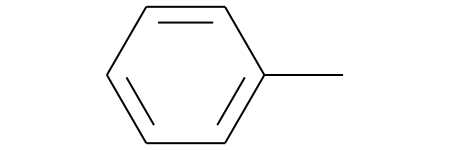

In [ ]:
>>> m = Chem.MolFromSmiles('Cc1ccccc1')
m

In [ ]:
m is None

False

In [ ]:
m is not None

True

In [ ]:
>>> m1 = Chem.MolFromSmiles('CO(C)C')

RDKit ERROR: [04:44:49] Explicit valence for atom # 1 O, 3, is greater than permitted


In [ ]:
>>> from rdkit import DataStructs
>>> ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'),
... Chem.MolFromSmiles('COC')]
>>> fps = [Chem.RDKFingerprint(x) for x in ms]
>>> print(DataStructs.FingerprintSimilarity(fps[0],fps[1]))
>>> print(DataStructs.FingerprintSimilarity(fps[0],fps[2]))
>>> DataStructs.FingerprintSimilarity(fps[1],fps[2])
0.25

0.6
0.4


0.25

In [ ]:
>>> from rdkit.Chem import AllChem
>>> m1 = Chem.MolFromSmiles('Cc1ccccc1')
>>> fp1 = AllChem.GetMorganFingerprint(m1,2)
>>> fp1

In [ ]:
<rdkit.DataStructs.cDataStructs.UIntSparseIntVect object at 0x...>
>>> m2 = Chem.MolFromSmiles('Cc1ncccc1')
>>> fp2 = AllChem.GetMorganFingerprint(m2,2)
>>> DataStructs.DiceSimilarity(fp1,fp2)
0.55...

In [ ]:
fp1 = AllChem.GetMorganFingerprint(m1,2)

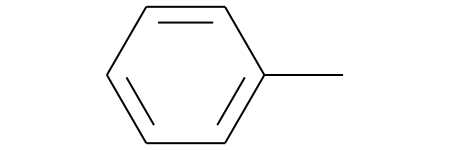

In [ ]:
m1

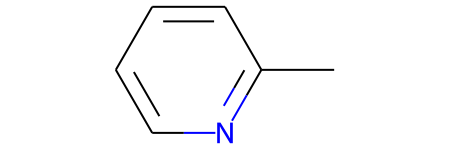

In [ ]:
m2 = Chem.MolFromSmiles('Cc1ncccc1')
fp2 = AllChem.GetMorganFingerprint(m2,2)
m2

In [ ]:
DataStructs.DiceSimilarity(fp1,fp2)

0.55

## ECFP6 Fingerprints in Python – Part 3

[ECFP6 using Python](https://drzinph.com/ecfp6-fingerprints-in-python-part-3/)

In [ ]:
# pip install molvs

In [ ]:
unique_smiles_list = list(dict.fromkeys(list(df3.SMILES)))

In [ ]:
len(unique_smiles_list)

164

In [ ]:
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs
from molvs import standardize_smiles

In [ ]:
class ECFP6:
    def __init__(self, smiles):
        self.mols = [Chem.MolFromSmiles(i) for i in smiles]
        self.smiles = smiles

    def mol2fp(self, mol, radius = 3):
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius = radius)
        array = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, array)
        return array

    def compute_ECFP6(self, name = None):
        bit_headers = ['bit' + str(i) for i in range(2048)]
        arr = np.empty((0,2048), int).astype(int)
        for i in self.mols:
            fp = self.mol2fp(i)
            arr = np.vstack((arr, fp))
        df_ecfp6 = pd.DataFrame(np.asarray(arr).astype(int),columns=bit_headers)
        df_ecfp6.insert(loc=0, column='smiles', value=self.smiles)
        if name != None:
            df_ecfp6.to_csv(name[:-4]+'_ECFP6.csv', index=False)
        return df_ecfp6


In [ ]:
# filename = 'data/macrolides_smiles.csv'  # path to your csv file
# df = pd.read_csv(filename)               # read the csv file as pandas data frame
# smiles = [standardize_smiles(i) for i in df3['SMILES'].values]  
smiles = [standardize_smiles(i) for i in unique_smiles_list] 
convert_to_nonstd = dict(zip(smiles, unique_smiles_list)) 

## Compute ECFP6 Fingerprints and export a csv file.
ecfp6_descriptor = ECFP6(smiles)        # create your ECFP6 object and provide smiles
ecfp_df = ecfp6_descriptor.compute_ECFP6() # compute ECFP6 and provide the name of your desired output file. you can use the same name as the input file because the ECFP6 class will ensure to add "_ECFP6.csv" as part of the output file.

In [ ]:
ecfp_df

smiles  bit0  ...  bit2046  bit2047
0        CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3ccccc3nc2-1     0  ...        0        0
1    CCC1(O)CC2CN(CCc3c([nH]c4ccccc34)C(C(=O)OC)(c3...     0  ...        0        0
2                               N.N.[Cl-].[Cl-].[Pt+2]     0  ...        0        0
3                       Nc1ccn(C2OC(CO)C(O)C2O)c(=O)n1     0  ...        0        0
4    CC(=O)OC12COC1CC(O)C1(C)C(=O)C(O)C3=C(C)C(OC(=...     0  ...        0        0
..                                                 ...   ...  ...      ...      ...
159        O=C(NCC(O)CN1CCc2ccccc2C1)c1ccnc(NC2CCC2)c1     0  ...        0        0
160   CS(=O)(=O)c1ccc(-c2cnc(N)c(C(=O)Nc3ccccc3)n2)cc1     0  ...        0        0
161  Cc1cc(C(C)Nc2ccccc2C(=O)O)c2nc(N3CCOCC3)cc(=O)...     0  ...        0        0
162  CC1(C(=O)Nc2ccc(F)nc2)CCCN1c1nc(Nc2cc(C3CC3)[n...     0  ...        0        0
163  Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=NC(CC(=O)OC(C)(C)C...     0  ...        0        0

[164 rows x 2049 columns]

In [ ]:
smiles_list[0]

'CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3=C2)O'

In [ ]:
standardize_smiles(smiles_list[0])

'CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3ccccc3nc2-1'

## Experimenting with rdkit

In [ ]:
from rdkit import Chem

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [ ]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

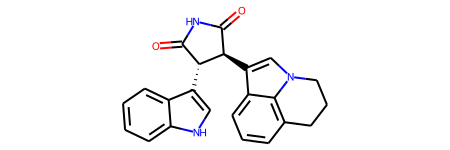

In [ ]:
# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol

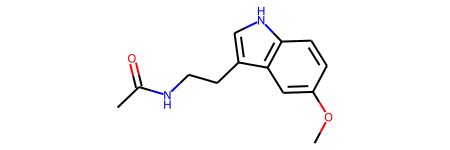

In [ ]:
#  m =  Chem.MolFromSmiles('CC(=O)NCCC1=CNc2c1cc(OC)cc2')
m = Chem.MolFromSmiles('CC(=O)NCCC1=CNc2c1cc(OC)cc2')
m

In [ ]:
import requests

morphine_url = "https://go.drugbank.com/structures/small_molecule_drugs/DB00295.mol"
morphine_mol = requests.get(morphine_url).text

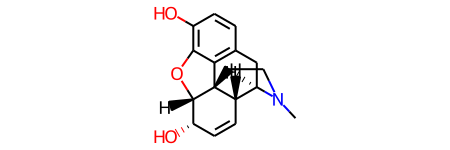

In [ ]:
morphine = Chem.MolFromMolBlock(morphine_mol)
morphine

In [ ]:
morphine.GetNumAtoms() ## Number of Non-Hydrogen Atoms  

21

In [ ]:
[atom.GetSymbol() for atom in morphine.GetAtoms() if not atom.IsInRing()] 

['O', 'O', 'C']

In [ ]:
[atom.GetSymbol() for atom in morphine.GetAtoms()] 

['O',
 'O',
 'O',
 'N',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C']

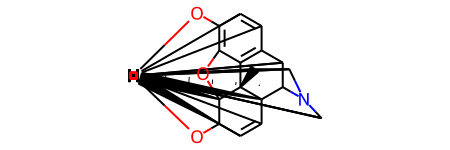

In [ ]:
morphine_with_hydrogens = Chem.AddHs(morphine)
morphine_with_hydrogens

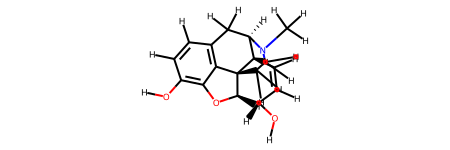

In [ ]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(morphine_with_hydrogens)
morphine_with_hydrogens

In [ ]:
from rdkit.Chem import Descriptors
Descriptors.MolWt(morphine)

285.34299999999996

In [ ]:
Descriptors.MolLogP(morphine)

1.1980999999999997

In [ ]:
Descriptors.NumRotatableBonds(morphine)

0

## GNN DeepWalk Work Shop

In [ ]:
import torch 
import torch_geometric.data as Data
from rdkit import Chem
from torch_geometric.utils.convert import to_networkx
import networkx as nx ## used for graph plotting

In [ ]:
# Define a graph with 4 nodes (undirected graph)
edge_list = torch.tensor([
                          [0, 0, 0, 1, 2, 2, 3, 3], # Source Nodes ## Node 0 has three connections, node 3 has two connections
                          [1, 2, 3, 0, 0, 3, 2, 0], # Target Nodes ## Node 0 is connection to nodes 1, 2, and 3
], dtype=torch.long)

In [ ]:
edge_list

tensor([[0, 0, 0, 1, 2, 2, 3, 3],
        [1, 2, 3, 0, 0, 3, 2, 0]])

6 Features for each of the node 4 nodes. (4x6 : number of nodes x Number of features)

In [ ]:
node_features = torch.tensor([
                              [-8, 1, 5, 8, 2, -3], # Features of node 0
                              [-1, 0, 2, -3, 0, 1], # Features of node 1
                              [1, -1, 0, -1, 2, 1], # Features of node 2
                              [0, 1, 3, -2, 3, 4], # Features of node 3
],  dtype=torch.long)  

In [ ]:
 # If we dont define any weights then it will assume all edges have same weights
edge_weight = torch.tensor([
                            [35.], # Weight for node (0, 1)
                            [48.], # Weight for node (0, 2)
                            [12.], # Weight for node (0, 3)
                            [10.], # Weight for node (1, 0)
                            [70.], # Weight for node (2, 0)
                            [5.], # Weight for node (2, 3)
                            [15.], # Weight for node (3, 2)
                            [8.], # Weight for node (3, 0)     
], dtype=torch.long) 

In [ ]:
# Make a data object to store graph information
data = Data.Data(x=node_features, edge_index=edge_list, edge_attr=edge_weight)

In [ ]:
# Print the Graph info
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of features per node (Length of feature vector): {data.num_node_features}")
print(f"Number of weights per edge (edge-features): {data.num_edge_features}") 

Number of nodes: 4
Number of edges: 8
Number of features per node (Length of feature vector): 6
Number of weights per edge (edge-features): 1


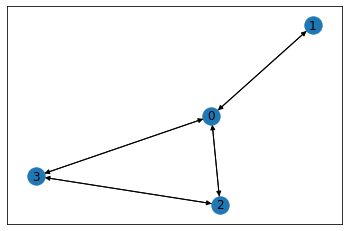

In [ ]:
# Plot the graph
# Need to convert the data from graph geometric to a network x. 
# The converter we use is torch_geometric.utils.convert import to_networkx
G = to_networkx(data)
nx.draw_networkx(G)

## Workshop on Deepwalk Algorthm using Karate Club

In [ ]:
import networkx as nx

Number of nodes (club-members) 34


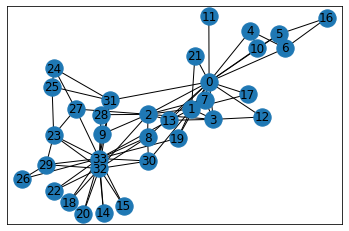

In [ ]:
G = nx.karate_club_graph() # Load the Zachary's karate club graph
print(f"Number of nodes (club-members) {len(G.nodes)}")
nx.draw_networkx(G)

Line connects two participants who talk to each other. 

2 different labels

Re-drawing the same graph, with colouring representing which class or node they are belonging to.  

In [ ]:
# Plot the graph with labels
labels = []
for i in G.nodes:
  club_names = G.nodes[i]["club"]
  labels.append(1 if club_names == "Officer" else 0) # Clubs: 'officer' or 'Mr. Hi'

In [ ]:
# for i in range(len(G.nodes)):
#   print(f"{i}. {G.nodes[i]['club']}")

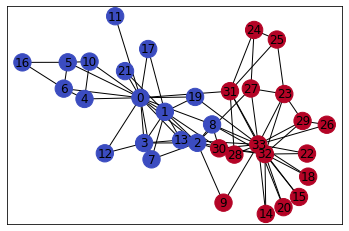

In [ ]:
 nx.draw_networkx(G, node_color =labels, cmap="coolwarm")

## Perform node embedding using Deepwalk

### karateclub installation 

In [ ]:
pip install karateclub

     |████████████████████████████████| 61kB 2.3MB/s 
     |████████████████████████████████| 1.8MB 4.5MB/s 
     |████████████████████████████████| 23.9MB 107kB/s 
  Created wheel for karateclub: filename=karateclub-1.2.0-cp37-none-any.whl size=94341 sha256=6b211e081b5e8e7db99f48f19ae6be3378cd3392a04c8a333f319a37baea64de
  Stored in directory: /root/.cache/pip/wheels/c4/9b/e1/915aa1f30d0e5035371276d700317db8eef32640356fb5fee3
Successfully built karateclub
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


### Code

In [ ]:
import networkx as nx
from karateclub import DeepWalk

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
Deepwalk_model = DeepWalk(walk_number = 10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)

In [ ]:
embedding = Deepwalk_model.get_embedding()

In [ ]:
print(f"Embedding array shape (nodes x features): {embedding.shape}") # (number of nodes, number of features)

Embedding array shape (nodes x features): (34, 124)


Low dimensional plot of the nodes x features

In [ ]:
import sklearn
import matplotlib.pyplot as plt

In [ ]:
PCA_model = sklearn.decomposition.PCA(n_components = 2)
lowdimension_embedding = PCA_model.fit_transform(embedding)
print(f"Low dimensional embedding representation (nodes x 2) {lowdimension_embedding.shape}")

Low dimensional embedding representation (nodes x 2) (34, 2)


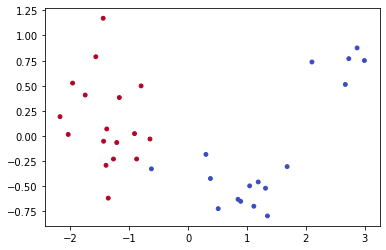

In [ ]:
plt.scatter(lowdimension_embedding[:,0], lowdimension_embedding[:,1], c=labels, s=15, cmap="coolwarm")

#### Node Classification using embedded model

In [ ]:
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LogisticRegression
 from sklearn.metrics import roc_auc_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(embedding, labels, test_size=0.3)

In [ ]:
ML_model = LogisticRegression(random_state=0).fit(x_train, y_train)
y_predict = ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test, y_predict)
print(f"AUC: {ML_acc}")

AUC: 0.9


## GNN DeepWalk Work Shop

### karateclub installation 


In [ ]:
!pip install karateclub

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 1.8MB 8.0MB/s 
     |████████████████████████████████| 23.9MB 118kB/s 
  Created wheel for karateclub: filename=karateclub-1.2.0-cp37-none-any.whl size=94341 sha256=44078b3cd1454193af0a7c1deb6267a22962b30034b2697abf14d50517e9005b
  Stored in directory: /root/.cache/pip/wheels/c4/9b/e1/915aa1f30d0e5035371276d700317db8eef32640356fb5fee3
Successfully built karateclub
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


## Code

In [ ]:
import torch 
import torch_geometric.data as Data
from rdkit import Chem
from torch_geometric.utils.convert import to_networkx
import networkx as nx ## used for graph plotting

import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import networkx as nx

import networkx as nx
from karateclub import DeepWalk
from karateclub import Node2Vec

Number of nodes (club-members) 34


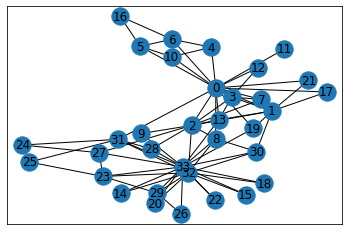

In [ ]:
G = nx.karate_club_graph() # Load the Zachary's karate club graph
print(f"Number of nodes (club-members) {len(G.nodes)}")
nx.draw_networkx(G)

In [ ]:
# Plot the graph with labels
labels = []
for i in G.nodes:
  club_names = G.nodes[i]["club"]
  labels.append(1 if club_names == "Officer" else 0) # Clubs: 'officer' or 'Mr. Hi'

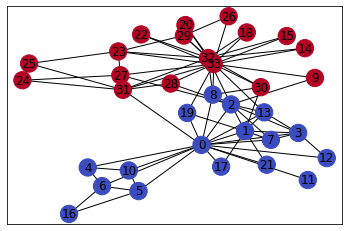

In [ ]:
nx.draw_networkx(G, node_color =labels, cmap="coolwarm")

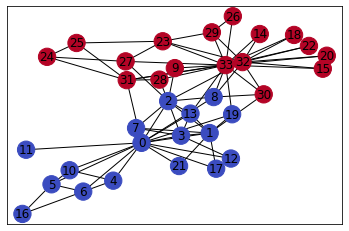

In [ ]:
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout_pos, node_color=labels, cmap='coolwarm')

In [ ]:
# Perform node embedding using DeepWalk
Deepwalk_model = DeepWalk(walk_number = 10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)

embedding = Deepwalk_model.get_embedding()

print(f"Embedding array shape (nodes x features): {embedding.shape}") # (number of nodes, number of features)

Embedding array shape (nodes x features): (34, 124)


In [ ]:
# Perform node embedding using Node2Vec
N2Vec_model = Node2Vec(walk_number = 10, walk_length=80, p=0.9, q=0.1, dimensions=124)
N2Vec_model.fit(G)

N2Vec_embedding = N2Vec_model.get_embedding()

print(f"Embedding array shape (nodes x features): {N2Vec_embedding.shape}") # (number of nodes, number of features)

Embedding array shape (nodes x features): (34, 124)


In [ ]:
####Low dimensional plot of the nodes x features
PCA_model = sklearn.decomposition.PCA(n_components = 2)
lowdimension_n2vembedding = PCA_model.fit_transform(N2Vec_embedding)
print(f"Low dimensional embedding representation (nodes x 2) {lowdimension_n2vembedding.shape}")

Low dimensional embedding representation (nodes x 2) (34, 2)


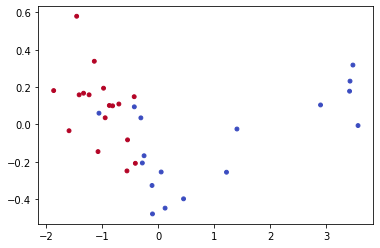

In [ ]:
plt.scatter(lowdimension_n2vembedding[:,0], lowdimension_n2vembedding[:,1], c=labels, s=15, cmap="coolwarm")

In [ ]:
#### Node Classification using embedded model
nx_train, nx_test, ny_train, ny_test = train_test_split(N2Vec_embedding, labels, test_size=0.3)

In [ ]:
nML_model = LogisticRegression(random_state=0).fit(nx_train, ny_train)
ny_predict = nML_model.predict(nx_test)
nML_acc = roc_auc_score(ny_test, ny_predict)
print(f"AUC: {nML_acc}")

AUC: 0.9


## Node to vec using Torch geometric 

In [ ]:
# " Node2Vec model using torch geometric with Cora"
import torch
from torch_geometric.datasets import Planetoid # The citation network datasets “Cora”, “CiteSeer” and “PubMed” 
from torch_geometric.nn import Node2Vec # Import Node2Vec Model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
# " **************** IMPORT DATA ********************"
path = "C:/Users/Younes/Desktop"  # Directory to download dataset # Put any location
dataset = Planetoid(path, "Cora") # Download the dataset
data = dataset[0] # Tensor representation of the Cora-Planetoid data
print('Coda: ', data)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

Processing...
Done!
Coda:  Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])


```Coda:  Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])```

Number of Nodes = 2708 
 
Number of features = 1433

Number of conncections between existing nodes  = 10556

In [ ]:
# " **************** CONSTRUCT THE MODEL  ********************"
Node2Vec_model = Node2Vec(data.edge_index, embedding_dim=128, walk_length=20,
                     context_size=10, walks_per_node=10,
                     num_negative_samples=1, p=1, q=1, sparse=True).to(device)

loader = Node2Vec_model.loader(batch_size=128, shuffle=True, num_workers=4) # For batch training
optimizer = torch.optim.SparseAdam(list(Node2Vec_model.parameters()), #List of parameters
                                   lr = 0.01 # Learning Rate
                                   )

In [ ]:
# " **************** TRAIN FUNCTION ********************"
def train():
    Node2Vec_model.train() # Set training as true for the model
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad() # reset of gradient of all variables
        loss = Node2Vec_model.loss(pos_rw , neg_rw)
        loss.backward()
        optimizer.step()
        total_loss =+ loss.item()
    return total_loss / len(loader)  

In [ ]:
# " **************** GET EMBEDDING  ********************"
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}')

Epoch: 01, Loss: 0.3150
Epoch: 02, Loss: 0.2533
Epoch: 03, Loss: 0.2171
Epoch: 04, Loss: 0.1662
Epoch: 05, Loss: 0.1455
Epoch: 06, Loss: 0.1252
Epoch: 07, Loss: 0.1105
Epoch: 08, Loss: 0.0938
Epoch: 09, Loss: 0.0827
Epoch: 10, Loss: 0.0749
Epoch: 11, Loss: 0.0657
Epoch: 12, Loss: 0.0612
Epoch: 13, Loss: 0.0573
Epoch: 14, Loss: 0.0551
Epoch: 15, Loss: 0.0523
Epoch: 16, Loss: 0.0489
Epoch: 17, Loss: 0.0473
Epoch: 18, Loss: 0.0461
Epoch: 19, Loss: 0.0443
Epoch: 20, Loss: 0.0430
Epoch: 21, Loss: 0.0435
Epoch: 22, Loss: 0.0433
Epoch: 23, Loss: 0.0420
Epoch: 24, Loss: 0.0405
Epoch: 25, Loss: 0.0411
Epoch: 26, Loss: 0.0407
Epoch: 27, Loss: 0.0400
Epoch: 28, Loss: 0.0400
Epoch: 29, Loss: 0.0405
Epoch: 30, Loss: 0.0395
Epoch: 31, Loss: 0.0405
Epoch: 32, Loss: 0.0384
Epoch: 33, Loss: 0.0389
Epoch: 34, Loss: 0.0380
Epoch: 35, Loss: 0.0388
Epoch: 36, Loss: 0.0391
Epoch: 37, Loss: 0.0386
Epoch: 38, Loss: 0.0391
Epoch: 39, Loss: 0.0377
Epoch: 40, Loss: 0.0388
Epoch: 41, Loss: 0.0386
Epoch: 42, Loss:

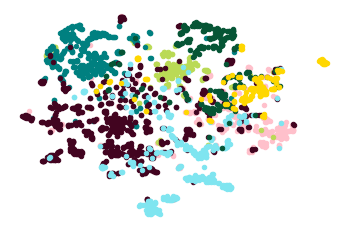

In [ ]:
# " **************** PLOT 2D OF EMBEDDED REP   ********************"
@torch.no_grad() # Deactivate autograd functionality
def plot_point(colors):
    Node2Vec_model.eval() # Evaluate the model based on the trained parameters
    z = Node2Vec_model(torch.arange(data.num_nodes, device=device)) # Embedding rep
    z = TSNE(n_components=2).fit_transform(z.cpu().numpy())
    y = data.y.cpu().numpy()
    plt.figure()
    for i in range(dataset.num_classes):
        plt.scatter(z[y==i,0],z[y==i,1],s=20,color=colors[i])
    plt.axis('off')
    plt.show()
colors = [
        '#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535',
        '#ffd700'
    ]
plot_point(colors)

In [ ]:
# " **************** NODE CLASSIFICATION ********************"
def test():
    Node2Vec_model.eval() # Evaluate the model based on the trained parameters
    z = Node2Vec_model() # Evaluate the model based on the trained parameters
    acc = Node2Vec_model.test(z[data.train_mask] ,data.y[data.train_mask],
                              z[data.test_mask],data.y[data.test_mask],
                              max_iter=150)
    return acc

print('Accuracy:', test())

Accuracy: 0.692


## Simplified Graph Convolutional Network

In [ ]:
" SGC model using torch geometric with Cora"
" Node2Vec model using torch geometric with Cora"
import torch
from torch_geometric.datasets import Planetoid # The citation network datasets “Cora”, “CiteSeer” and “PubMed” 
from torch_geometric.nn import SGConv # Import Node2Vec Model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
" **************** IMPORT DATA ********************"
path = "C:/Users/Younes/Desktop"  # Directory to download dataset
dataset = Planetoid(path, "Cora") # Download the dataset
data = dataset[0] # Tensor representation of the Cora-Planetoid data
print('Cora: ', data)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

Processing...
Done!
Cora:  Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])


In [ ]:
print(f"data.num_features = {data.num_features}")
print(f"dataset.num_classes = {dataset.num_classes}")

data.num_features = 1433
dataset.num_classes = 7


In [ ]:
" **************** CONSTRUCT THE MODEL  ********************"
SGC_model = SGConv(in_channels= data.num_features, # Number of features
                   out_channels= dataset.num_classes, # Dimension of embedding
                   K = 1, cached =True)

In [ ]:
" **************** GET EMBEDDING  ********************"
print(" Shape of the original data: ", data.x.shape)
print(" Shape of the embedding data: ", SGC_model(data.x,data.edge_index).shape)

 Shape of the original data:  torch.Size([2708, 1433])
 Shape of the embedding data:  torch.Size([2708, 7])


In [ ]:
# torch.Size([2708, 1433])
print(f"data.x.shape = {data.x.shape}")
print(f"Number of nodes = {data.x.shape[0]}")
print(f"Number of features = {data.x.shape[1]}")

data.x.shape = torch.Size([2708, 1433])
Number of nodes = 2708
Number of features = 1433


In [ ]:
" **************** CONSTRUCT THE MODEL FOR CLASSIFICATION  ********************"
class SGCNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = SGConv(in_channels= data.num_features, # Number of features
                   out_channels= dataset.num_classes, # Dimension of embedding
                   K = 1, cached =True)

    def forward(self):
        x = self.conv1(data.x,  data.edge_index) #Applying convolution to data
        
        # computation of log softmax
        return F.log_softmax(x, dim=1)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
SGC_model, data = SGCNet().to(device), data.to(device)
optimizer = torch.optim.Adam(SGC_model.parameters(), lr=0.2, weight_decay=0.005)

In [ ]:
# What are the learning parameters:
for i, parameter in SGC_model.named_parameters():
    print(" Parameter {}".format(i))
    print("Shape: ",parameter.shape)

 Parameter conv1.lin.weight
Shape:  torch.Size([7, 1433])
 Parameter conv1.lin.bias
Shape:  torch.Size([7])


In [ ]:
" **************** TRAIN FUNCTION ********************"
def train():
    SGC_model.train() # Set the model.training to be True
    optimizer.zero_grad() # Reset the gradient
    predicted_y = SGC_model() # predicted y in log softmax prob
    true_y = data.y # True labels
    losses = F.nll_loss(predicted_y[data.train_mask], true_y[data.train_mask])
    losses.backward()
    optimizer.step() # Update the parameters such that is minimized the losses

In [ ]:
" **************** TEST FUNCTION ********************"
def test():
    SGC_model.eval() # Set the model.training to be False
    logits = SGC_model() # Log prob of all data
    accs = []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        pred = logits[mask].max(1)[1] #Transforming log prob to actual labels
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs

In [ ]:
" **************** PUTTING IT ALL TOGETHER ********************"
best_val_acc = test_acc = 0
for epoch in range(1, 101):
    train()
    train_acc, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    log = 'Epoch: {:03d}, Train: {:.4f}, Val: {:.4f}, Test: {:.4f}'
    print(log.format(epoch, train_acc, best_val_acc, test_acc))

Epoch: 001, Train: 0.9643, Val: 0.5240, Test: 0.5650
Epoch: 002, Train: 0.9929, Val: 0.7300, Test: 0.7550
Epoch: 003, Train: 0.9929, Val: 0.7420, Test: 0.7810
Epoch: 004, Train: 1.0000, Val: 0.7500, Test: 0.7610
Epoch: 005, Train: 0.9857, Val: 0.7500, Test: 0.7610
Epoch: 006, Train: 0.9857, Val: 0.7500, Test: 0.7610
Epoch: 007, Train: 1.0000, Val: 0.7500, Test: 0.7610
Epoch: 008, Train: 1.0000, Val: 0.7500, Test: 0.7610
Epoch: 009, Train: 1.0000, Val: 0.7500, Test: 0.7610
Epoch: 010, Train: 0.9929, Val: 0.7500, Test: 0.7610
Epoch: 011, Train: 0.9929, Val: 0.7500, Test: 0.7610
Epoch: 012, Train: 1.0000, Val: 0.7500, Test: 0.7610
Epoch: 013, Train: 1.0000, Val: 0.7580, Test: 0.7790
Epoch: 014, Train: 1.0000, Val: 0.7580, Test: 0.7790
Epoch: 015, Train: 1.0000, Val: 0.7580, Test: 0.7790
Epoch: 016, Train: 1.0000, Val: 0.7580, Test: 0.7790
Epoch: 017, Train: 1.0000, Val: 0.7580, Test: 0.7790
Epoch: 018, Train: 1.0000, Val: 0.7580, Test: 0.7790
Epoch: 019, Train: 1.0000, Val: 0.7580, Test: 

 ## Inner Rough 

In [ ]:
## NTU

In [ ]:
total_psgp = float(14*4.11+17*3.25+18*2.67+18*4.58+18*4.17+15*4.2)
total_pau = 14+17+18+18+18+15
total_pgp = float(total_psgp/total_pau)
print(f"total_psgp = {total_psgp}")
print(f"total_pau = {total_pau}")
print(f"total_pgp = {total_pgp}")

total_psgp = 381.35
total_pau = 100
total_pgp = 3.8135000000000003


In [ ]:
float( (total_psgp+8*5+12*4.875)/(total_pau+20) )

3.9987500000000002

In [ ]:
float((3*(5+5+5+4.5))/12)

4.875

In [ ]:
# nx.draw_networkx(dataset, node_color =labels, cmap="coolwarm")    

In [ ]:
 for pos_rw, neg_rw in loader:
   print(f"pos_rw = {pos_rw.shape}")
   print(f"neg_rw = {neg_rw.shape}")
   break

NameError: ignored

In [ ]:
temp = []
for i in G.nodes:
  temp.append(i)
  # club_names = G.nodes[i]["club"]